In [1]:
# import
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import seaborn as sns
from scipy import signal
from importlib import reload

#import winsound as sd
import pickle
import sys
import os

from Tools.tools import *
from Plasticity.plasticity import *
from Neuron.neuron import *
from Model.model import *
from Analysis.analysis import *
import Operate_model_v3

In [3]:
# load
cd = os.getcwd()
path = os.path.dirname(cd)
    
with open(path+'//Data_final.pkl', 'rb') as file:
    # 453개의 data에 해당하는 input vector, DG vector, DG vector size, 
    Filt_idata = pickle.load(file)
    Filt_gdata = pickle.load(file)
    Filt_glen = pickle.load(file)
    F_DataLen = pickle.load(file)
    
    # CA3 vector index, CA3i vector index
    Af_py = pickle.load(file)
    Af_in = pickle.load(file)
    
    # 뭐였더라
    In_py_list = pickle.load(file)
    In_in_list = pickle.load(file)

In [5]:
class config:
    def __init__(self, pc):
        # The number of neurons
        self.N_I = 16
        self.N_O = self.N_I

        self.N_DG = 800
        self.N_DGH = self.N_I
        self.N_DGM = 100 
        self.N_DGB = 400 

        self.N_CA3 = pc[3] 
        self.N_CA1 = 200
        self.N_CA3i = pc[4] 
        
        # Weights of each connection
        # From EC
        self.w_EI = 3
        self.w_ppDG = 2 
        self.w_ppCA3 = 1 
        self.w_ppCA1 = 0.5 

        # DG
        self.w_IH = 3 
        self.w_IB = 4 
        self.w_IM = 3 
        self.w_HM = 4 
        self.w_MB = 4 
        self.w_BDG = 3 

        # CA3
        self.w_mf = 2 
        self.w_mfi = 2 
        self.w_Rc = 1

        self.w_CA33i = 1
        self.w_3iCA3 = 2 
        self.w_3i3i = 0.5 
        self.w_NoCA3 = 0.5

        # CA1
        self.w_Sc = 0.15
        self.w_CA1O = 2 

        # The number of connections 
        # From EC
        self.c_ppDG = 1
        self.c_ppCA3 = 8
        self.c_ppCA1 = 3

        # DG
        self.c_IH = 1
        self.c_IB = self.N_I
        self.c_IM = self.N_I*2//3
        self.c_HM = 1
        self.c_MB = self.N_I
        self.c_BDG = 1

        # CA3
        self.c_mf = pc[0]
        self.c_mfi = pc[1]
        self.c_Rc = self.N_CA3//4

        self.c_CA33i = self.N_CA3i//4
        self.c_3iCA3 = pc[2]
        self.c_3i3i = pc[5]
        self.c_NoCA3 = self.N_CA3
        self.c_Sc =  self.N_CA3//2

        # Parameters for delay
        self.d_I = 10
        self.d_O = 15
        self.d_DG = 3
        self.d_CA3 = 5
        self.d_CA3i = 1

In [6]:
# init
pc = [30,3,600,2400,120,20]
already_learned = False
learned_weights = [0,0,0,0]
params = config(pc)

In [11]:
# Neuron indices want to see the specific values
WTS_I = []
WTS_DGH = []
WTS_DGM = []
WTS_DGB = []
WTS_DG = []
WTS_CA3 = []
WTS_CA3i = []
WTS_CA1 = []
WTS = [WTS_I, WTS_DGH, WTS_DGM, WTS_DGB, WTS_DG, WTS_CA3, WTS_CA3i, WTS_CA1]

In [12]:
# Number of engram 조사
with open('Data_EngramNum\Cue_and_Target_Numcomp_Set3.pkl', 'rb') as file:
    Target_Data = pickle.load(file)
    Cue_Data = pickle.load(file)
    
learned_path = path+'//module//Weights_Numcomp'

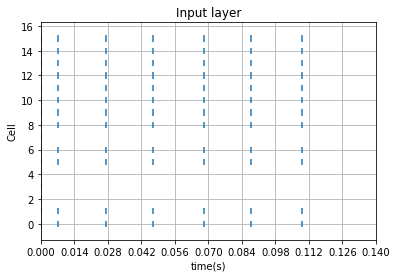

0 :  [ 0  1  5  6  8  9 10 11 12 13 14 15]
1 :  [ 2  6  9 11 12 13]
2 :  [ 2  3  4  5  6  7 11 12 13 14]
3 :  [ 2  6 10 12 13]


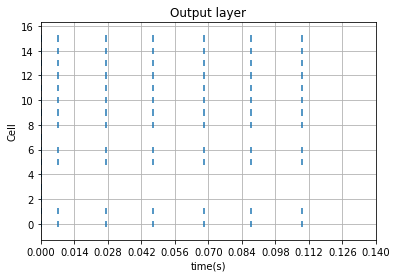

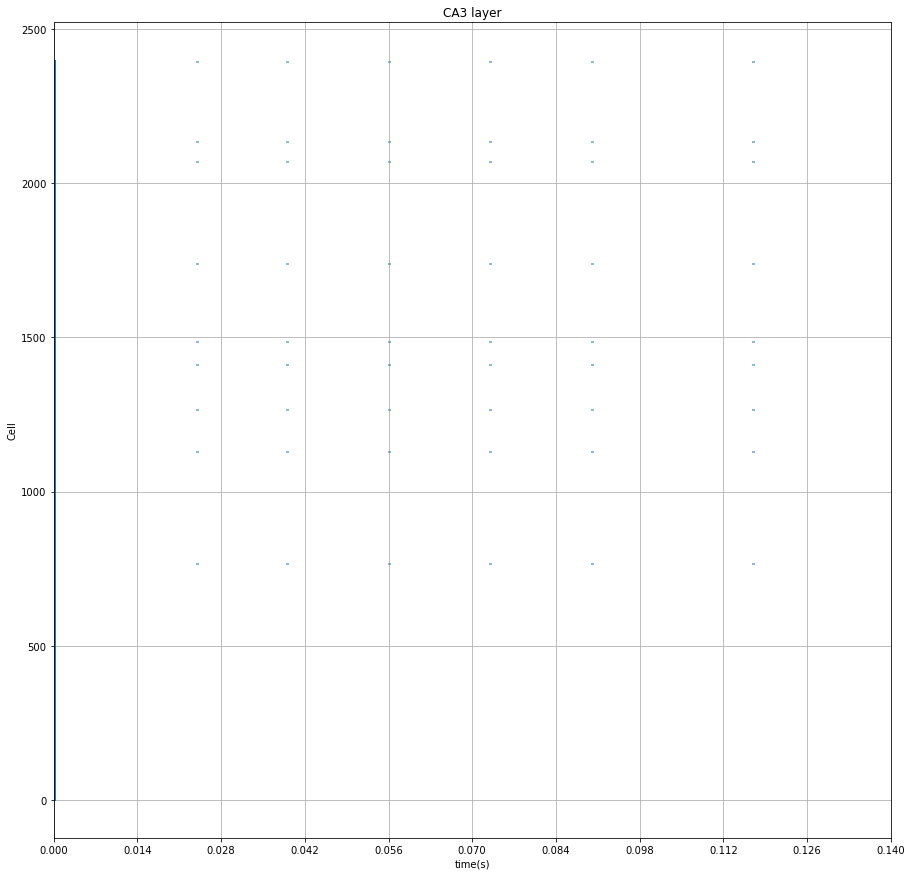

0 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
1 :  [509, 1991, 2376, 585, 1547, 1484, 2380, 1244, 1374, 1251, 357, 1192, 686]
2 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
3 :  [1681, 1560, 2203, 936, 1854, 577, 2264, 730, 2024, 1004, 1396, 1788, 1534]


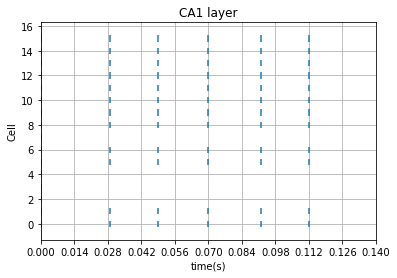

Ret1 :  {1412, 1130, 2026, 1740, 1487, 1265, 1266, 915, 2071, 2136, 2395, 2140, 1598, 767}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 277 [915]


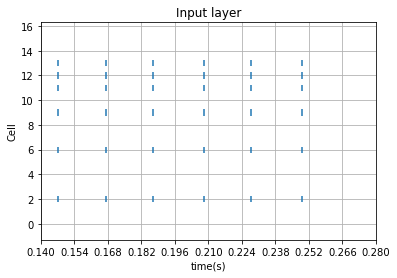

0 :  [ 0  1  5  6  8  9 10 11 12 13 14 15]
1 :  [ 2  6  9 11 12 13]
2 :  [ 2  3  4  5  6  7 11 12 13 14]
3 :  [ 2  6 10 12 13]


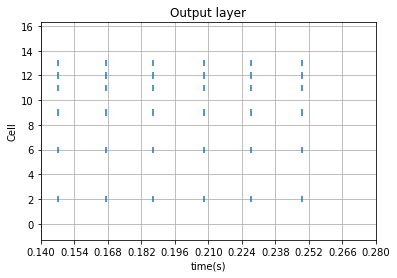

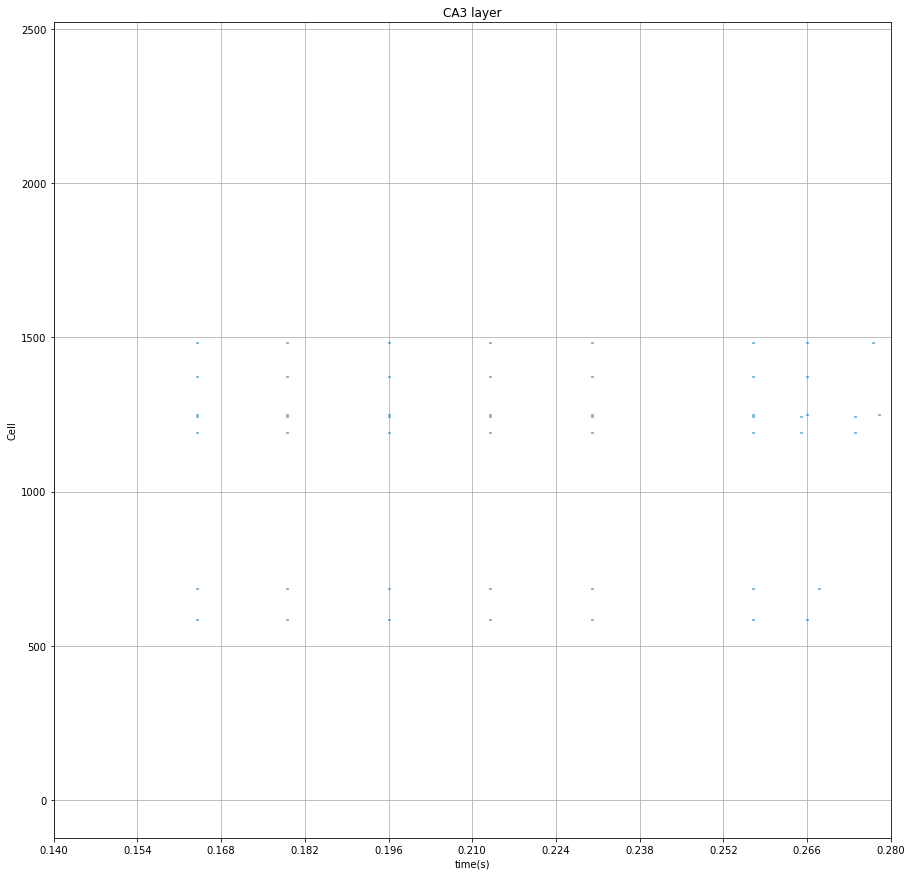

0 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
1 :  [509, 1991, 2376, 585, 1547, 1484, 2380, 1244, 1374, 1251, 357, 1192, 686]
2 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
3 :  [1681, 1560, 2203, 936, 1854, 577, 2264, 730, 2024, 1004, 1396, 1788, 1534]


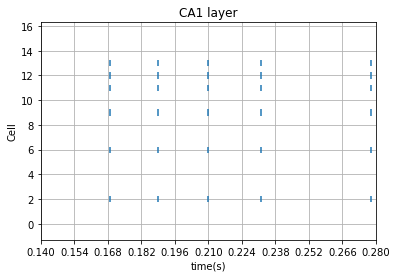

Ret1 :  {1251, 357, 1991, 1192, 585, 2376, 1547, 1484, 2380, 686, 1244, 509, 1374}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 407 [2136]


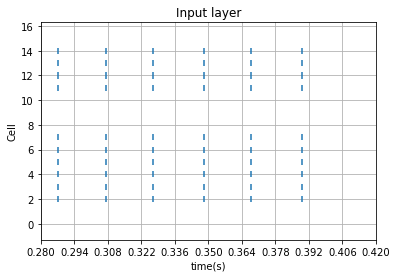

0 :  [ 0  1  5  6  8  9 10 11 12 13 14 15]
1 :  [ 2  6  9 11 12 13]
2 :  [ 2  3  4  5  6  7 11 12 13 14]
3 :  [ 2  6 10 12 13]


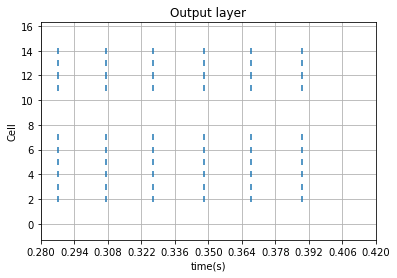

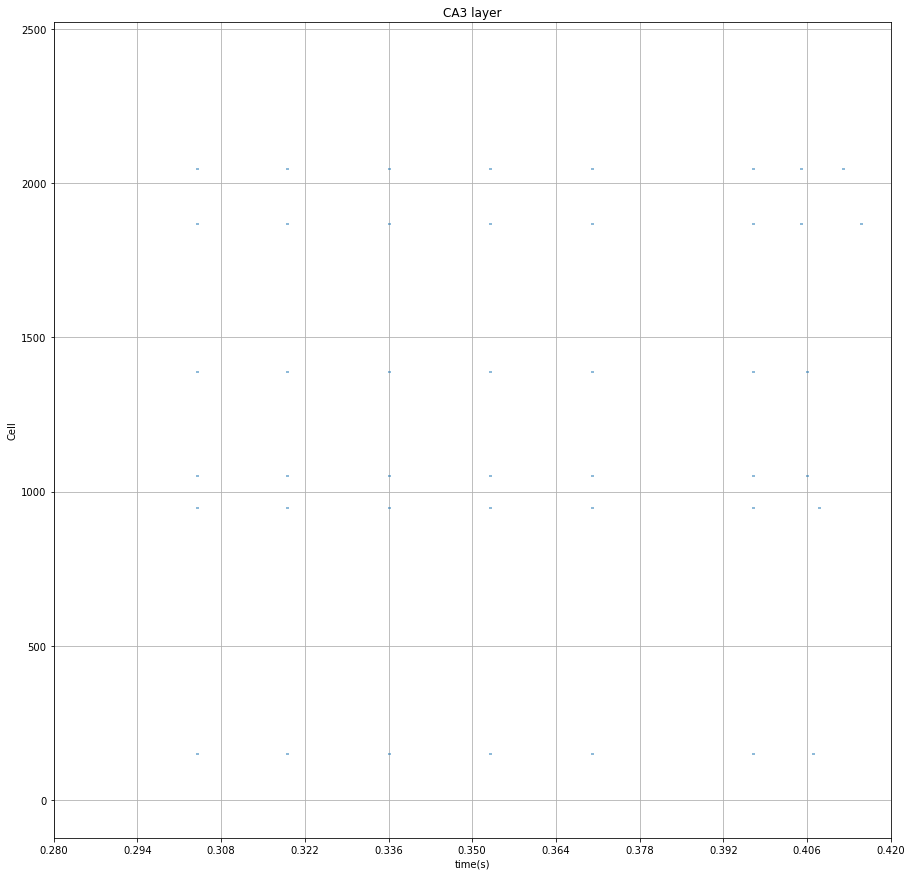

0 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
1 :  [509, 1991, 2376, 585, 1547, 1484, 2380, 1244, 1374, 1251, 357, 1192, 686]
2 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
3 :  [1681, 1560, 2203, 936, 1854, 577, 2264, 730, 2024, 1004, 1396, 1788, 1534]


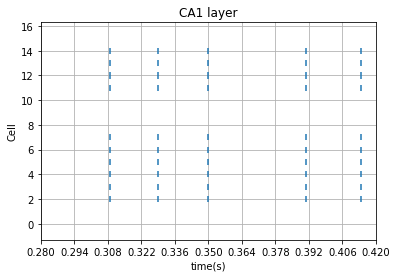

Ret1 :  {2048, 1988, 1637, 299, 2347, 1389, 1870, 2001, 2039, 948, 151, 1115, 1053}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 543 [1130]
0 551 [2136]


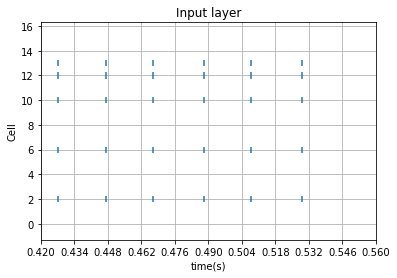

0 :  [ 0  1  5  6  8  9 10 11 12 13 14 15]
1 :  [ 2  6  9 11 12 13]
2 :  [ 2  3  4  5  6  7 11 12 13 14]
3 :  [ 2  6 10 12 13]


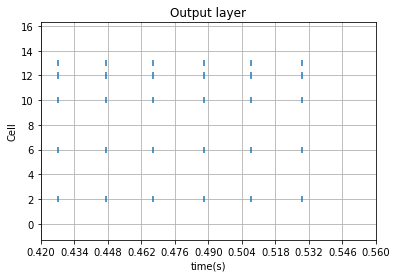

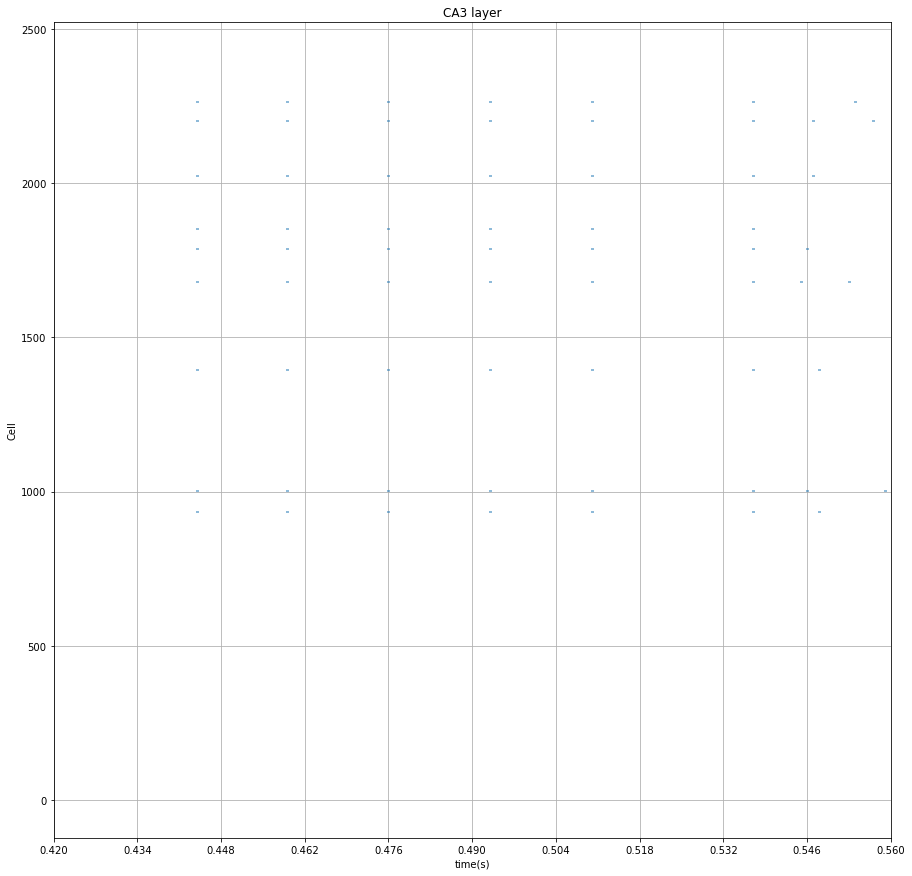

0 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
1 :  [509, 1991, 2376, 585, 1547, 1484, 2380, 1244, 1374, 1251, 357, 1192, 686]
2 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
3 :  [1681, 1560, 2203, 936, 1854, 577, 2264, 730, 2024, 1004, 1396, 1788, 1534]


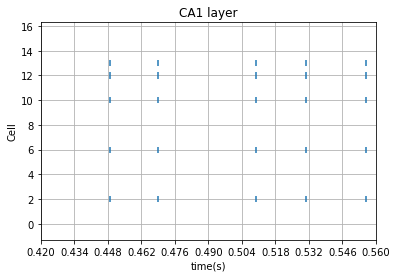

Ret1 :  {577, 936, 2024, 1004, 1854, 1681, 1396, 1560, 730, 2203, 1788, 1534, 2264}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
Success :  0
Fail :  4
If_fail :  0
Output bias (mean, std) :  0.0 0.0
0 126 [2031]
0 132 [134]


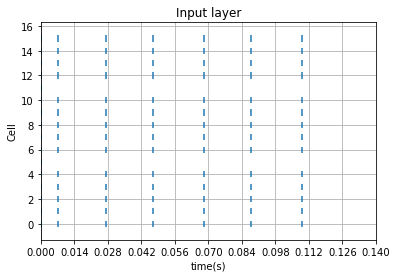

0 :  [ 0  1  2  3  4  6  7  8  9 10 12 13 14 15]
1 :  [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14]
2 :  [ 0  1  2  3  4  8  9 10 13 14]
3 :  [ 0  1  8 10 12 14]


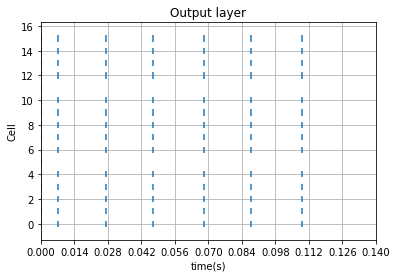

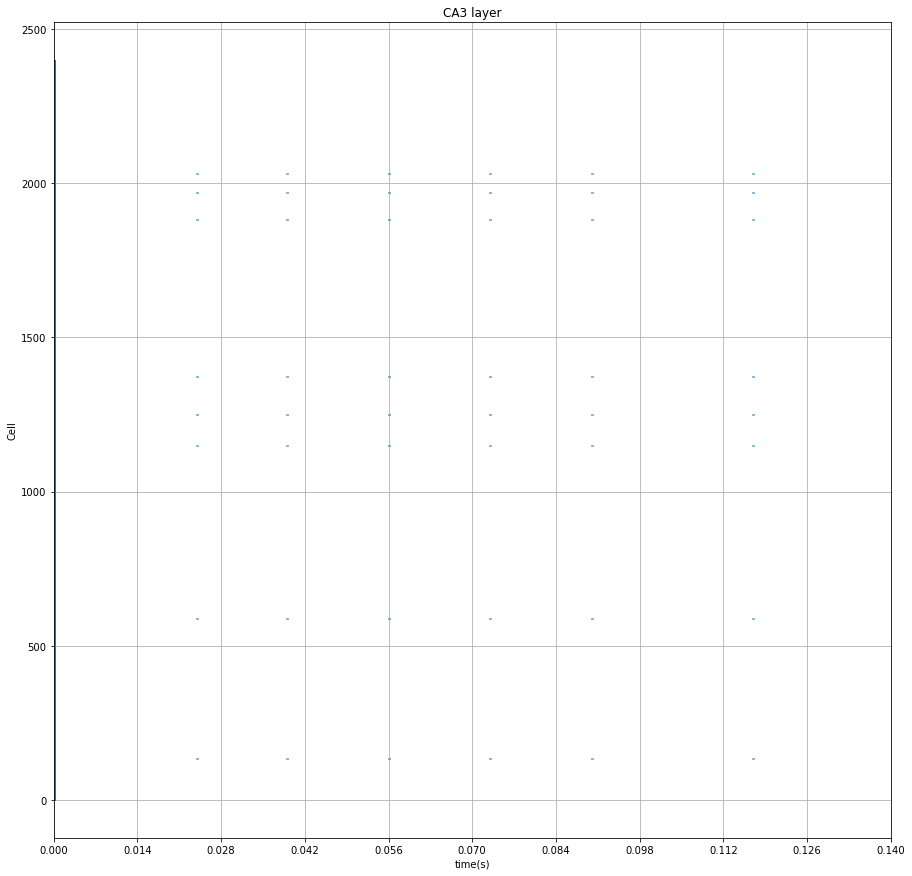

0 :  [1281, 134, 658, 425, 1969, 1991, 2380, 588, 1882, 1374, 2266, 1251, 2031, 1150]
1 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
2 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
3 :  [1857, 1605, 971, 1614, 918, 993, 1635, 292, 2221, 2108, 1727, 1270, 703]


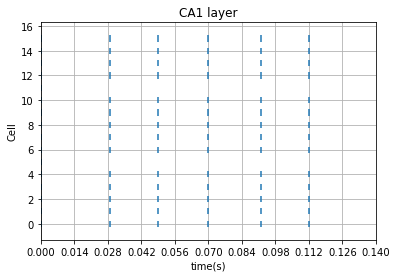

Ret1 :  {1281, 1374, 1251, 134, 1991, 425, 2266, 588, 2380, 2031, 1969, 658, 1882, 1150}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------


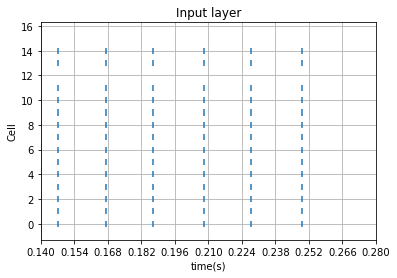

0 :  [ 0  1  2  3  4  6  7  8  9 10 12 13 14 15]
1 :  [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14]
2 :  [ 0  1  2  3  4  8  9 10 13 14]
3 :  [ 0  1  8 10 12 14]


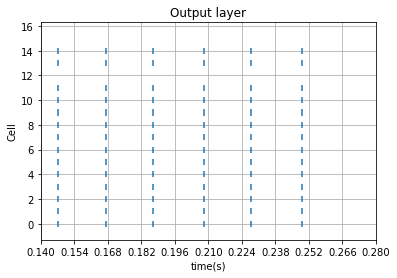

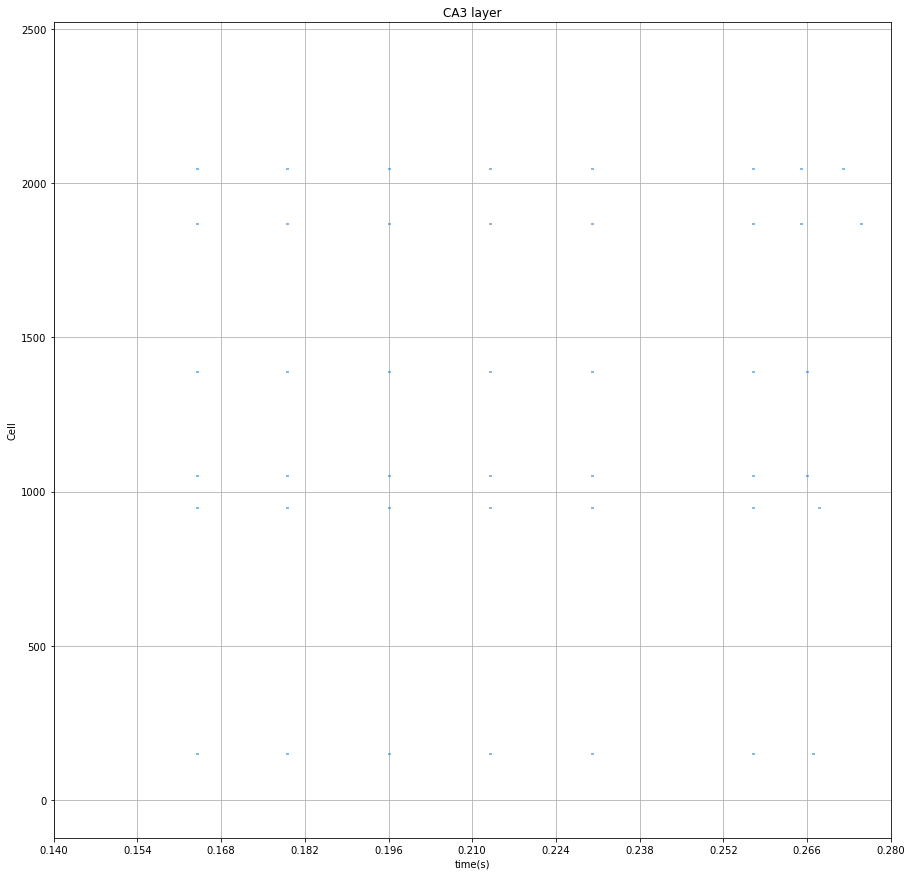

0 :  [1281, 134, 658, 425, 1969, 1991, 2380, 588, 1882, 1374, 2266, 1251, 2031, 1150]
1 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
2 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
3 :  [1857, 1605, 971, 1614, 918, 993, 1635, 292, 2221, 2108, 1727, 1270, 703]


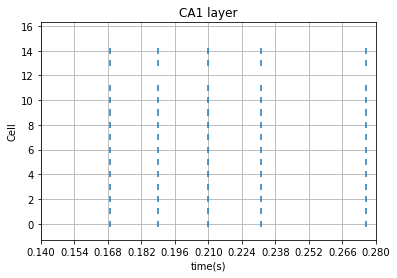

Ret1 :  {2048, 1988, 1637, 299, 2347, 1389, 1870, 2001, 2039, 948, 151, 1115, 1053}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 403 [1882]
0 405 [658]


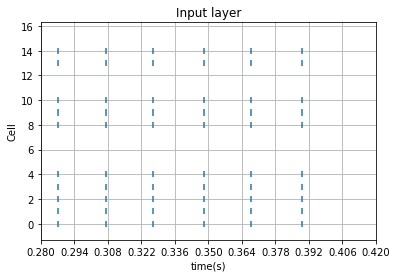

0 :  [ 0  1  2  3  4  6  7  8  9 10 12 13 14 15]
1 :  [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14]
2 :  [ 0  1  2  3  4  8  9 10 13 14]
3 :  [ 0  1  8 10 12 14]


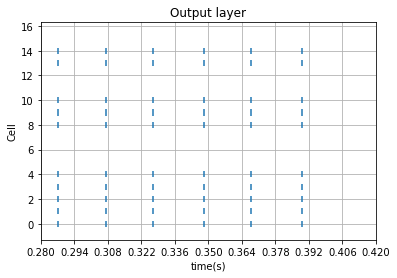

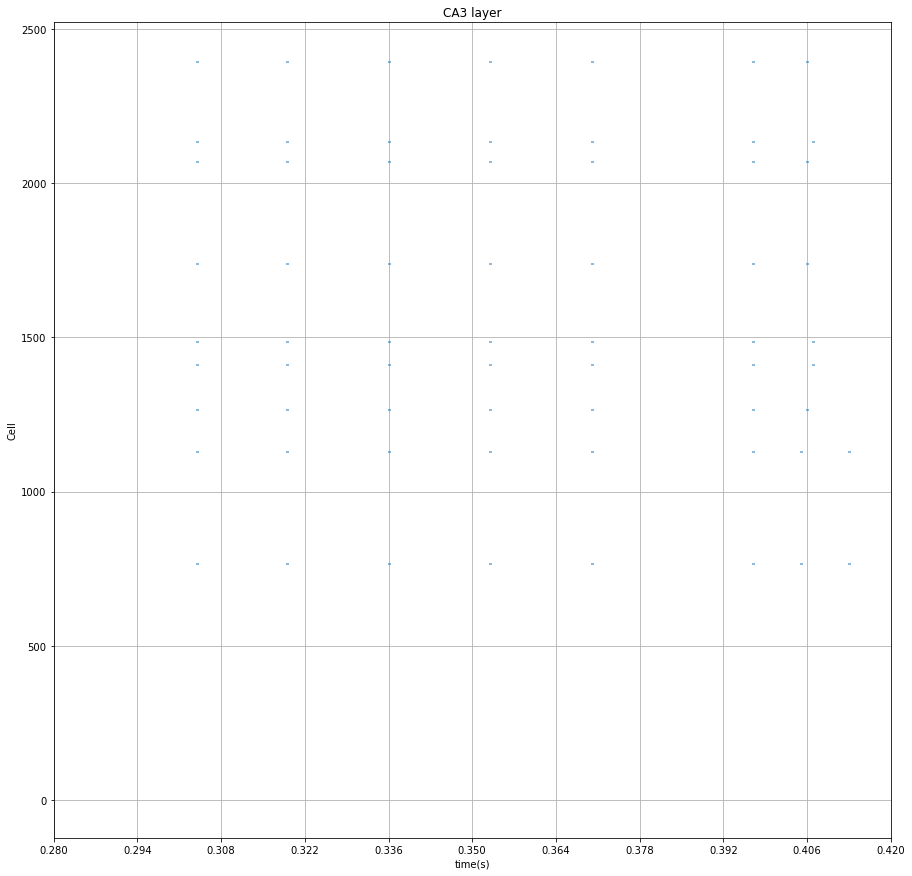

0 :  [1281, 134, 658, 425, 1969, 1991, 2380, 588, 1882, 1374, 2266, 1251, 2031, 1150]
1 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
2 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
3 :  [1857, 1605, 971, 1614, 918, 993, 1635, 292, 2221, 2108, 1727, 1270, 703]


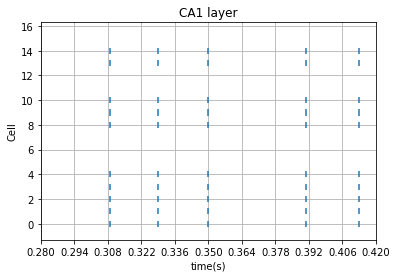

Ret1 :  {1412, 1130, 2026, 1740, 1487, 1265, 1266, 915, 2071, 2136, 2395, 2140, 1598, 767}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------


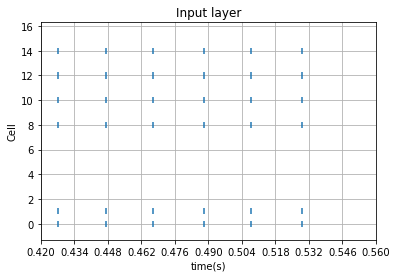

0 :  [ 0  1  2  3  4  6  7  8  9 10 12 13 14 15]
1 :  [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14]
2 :  [ 0  1  2  3  4  8  9 10 13 14]
3 :  [ 0  1  8 10 12 14]


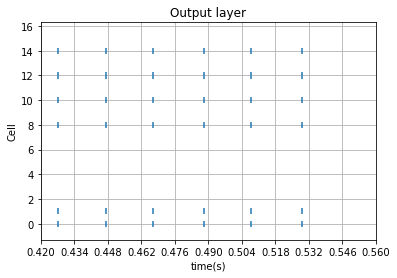

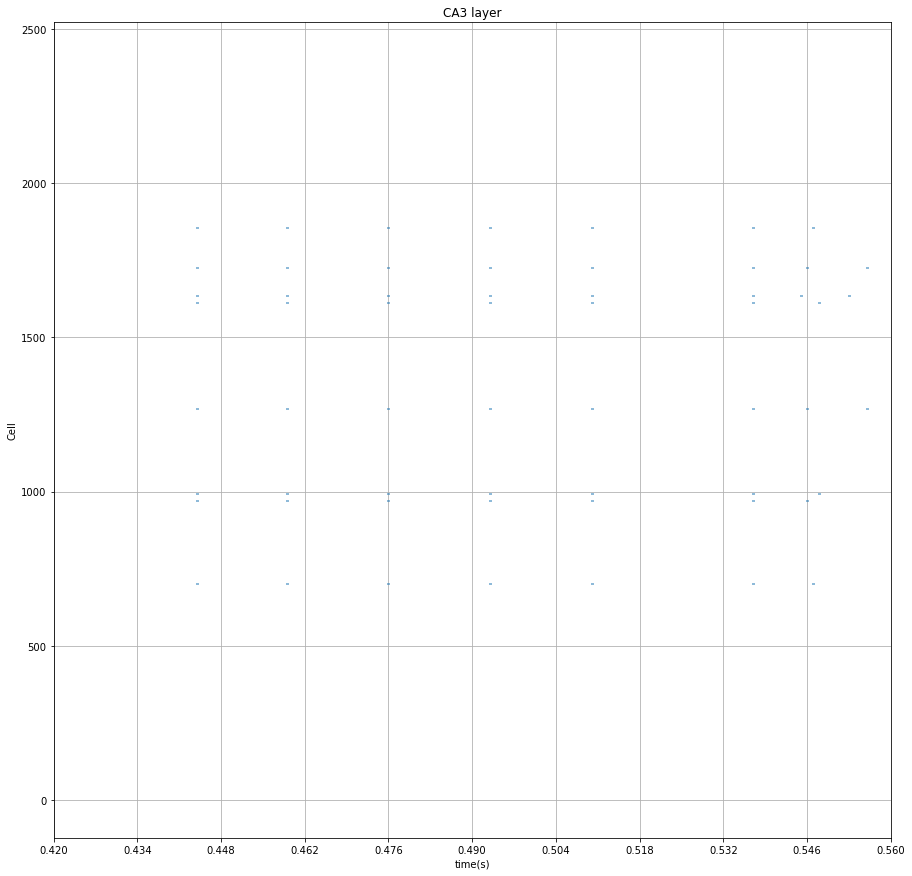

0 :  [1281, 134, 658, 425, 1969, 1991, 2380, 588, 1882, 1374, 2266, 1251, 2031, 1150]
1 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
2 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
3 :  [1857, 1605, 971, 1614, 918, 993, 1635, 292, 2221, 2108, 1727, 1270, 703]


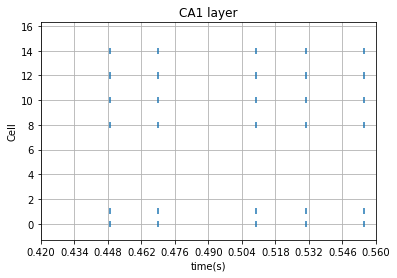

Ret1 :  {993, 1857, 1635, 292, 1605, 971, 2221, 1614, 1727, 918, 1270, 2108, 703}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
Success :  0
Fail :  4
If_fail :  0
Output bias (mean, std) :  0.0 0.0


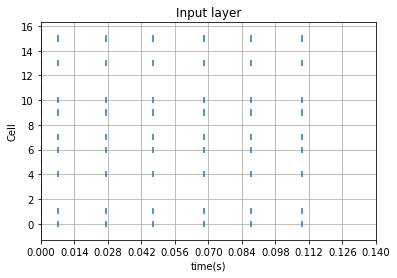

0 :  [ 0  1  4  6  7  9 10 13 15]
1 :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
2 :  [ 0  1  2  3  4  8  9 10 13 14]
3 :  [ 0  1  5 10 12 14 15]


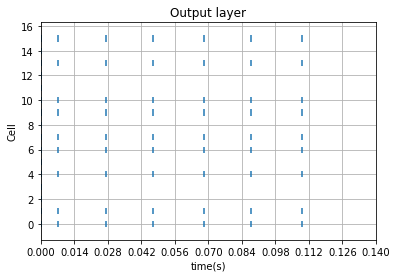

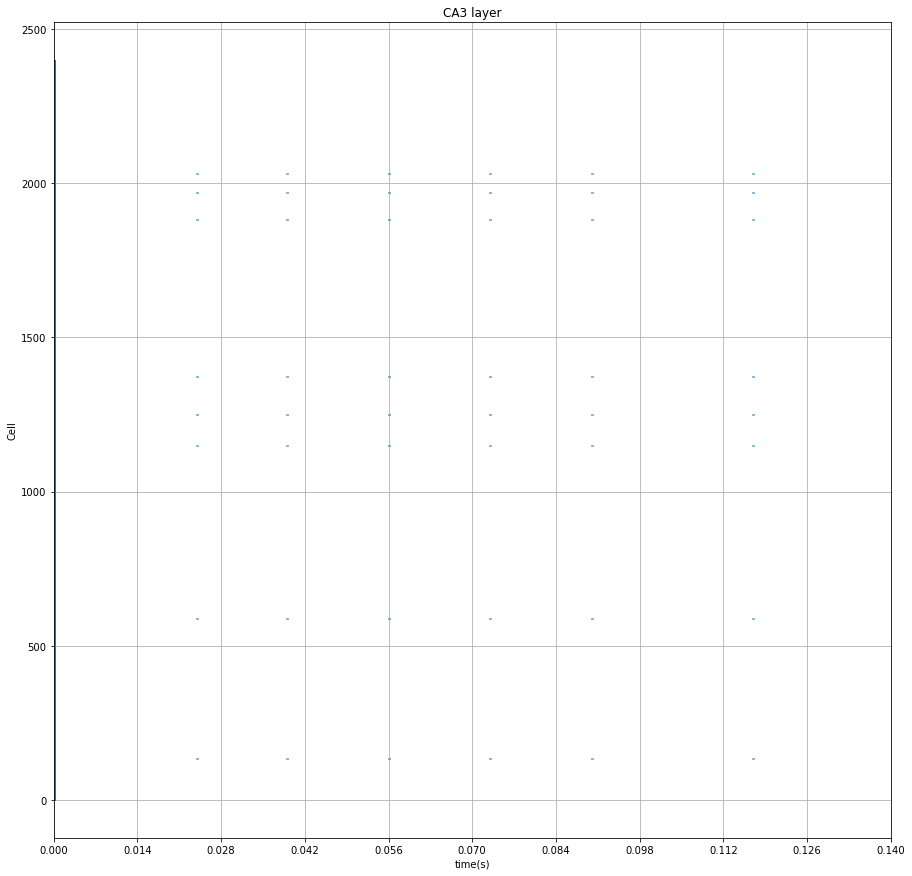

0 :  [1281, 134, 658, 425, 1969, 1991, 2380, 588, 1882, 1374, 2266, 1251, 2031, 1150]
1 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
2 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
3 :  [1857, 1605, 971, 1614, 918, 993, 1635, 292, 2221, 2108, 1727, 1270, 703]


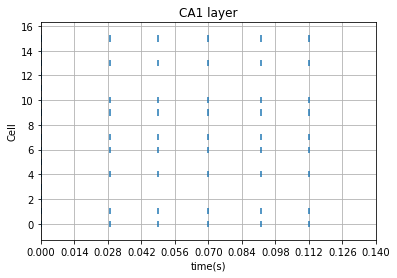

Ret1 :  {1281, 1374, 1251, 134, 1991, 425, 2266, 588, 2380, 2031, 1969, 658, 1882, 1150}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 267 [2380]


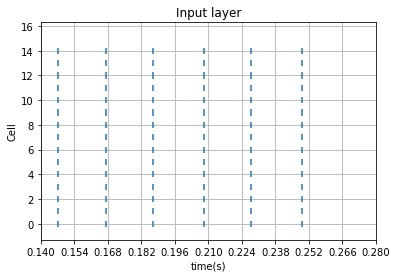

0 :  [ 0  1  4  6  7  9 10 13 15]
1 :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
2 :  [ 0  1  2  3  4  8  9 10 13 14]
3 :  [ 0  1  5 10 12 14 15]


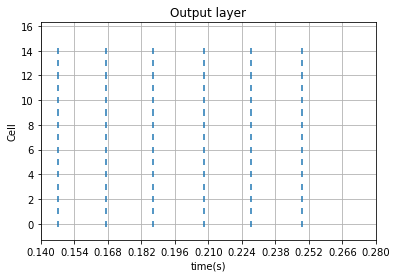

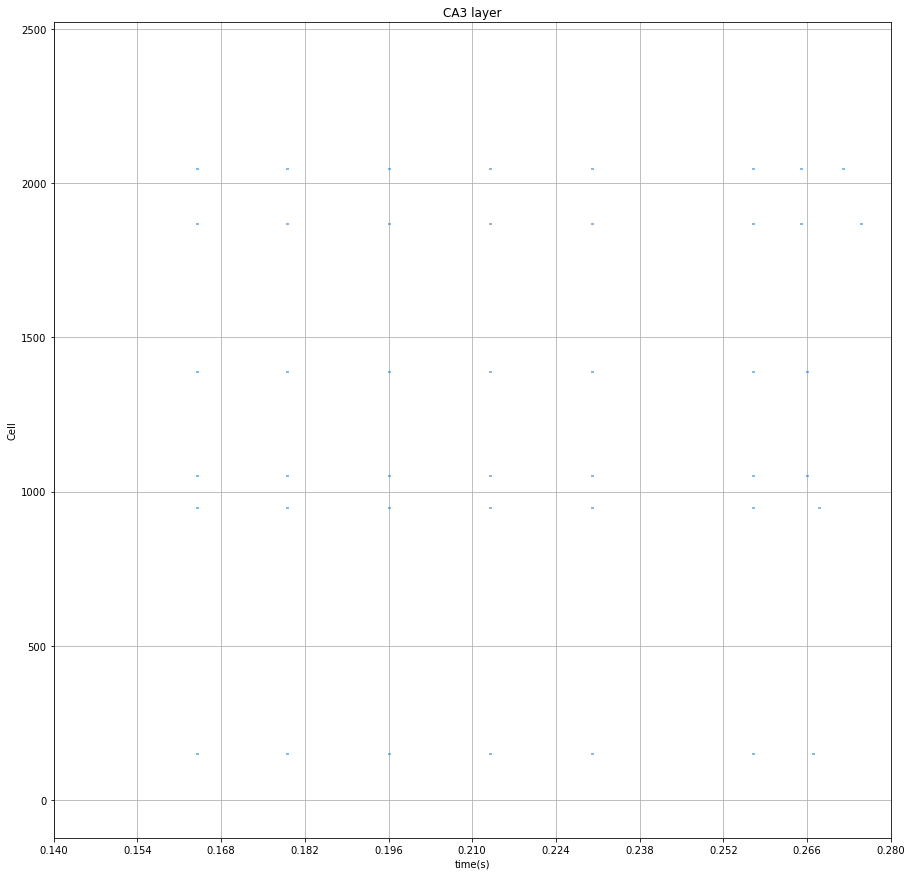

0 :  [1281, 134, 658, 425, 1969, 1991, 2380, 588, 1882, 1374, 2266, 1251, 2031, 1150]
1 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
2 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
3 :  [1857, 1605, 971, 1614, 918, 993, 1635, 292, 2221, 2108, 1727, 1270, 703]


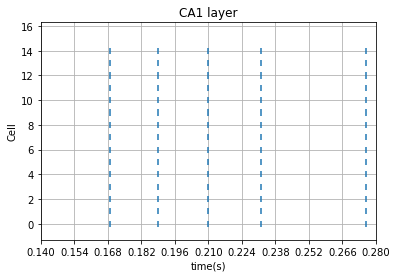

Ret1 :  {2048, 1988, 1637, 299, 2347, 1389, 1870, 2001, 2039, 948, 151, 1115, 1053}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 419 [1969]


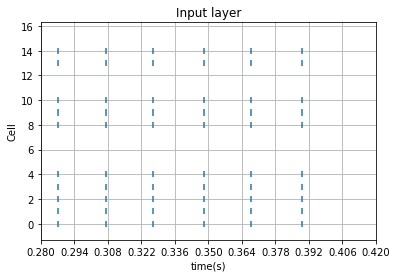

0 :  [ 0  1  4  6  7  9 10 13 15]
1 :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
2 :  [ 0  1  2  3  4  8  9 10 13 14]
3 :  [ 0  1  5 10 12 14 15]


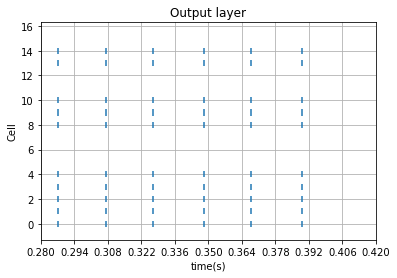

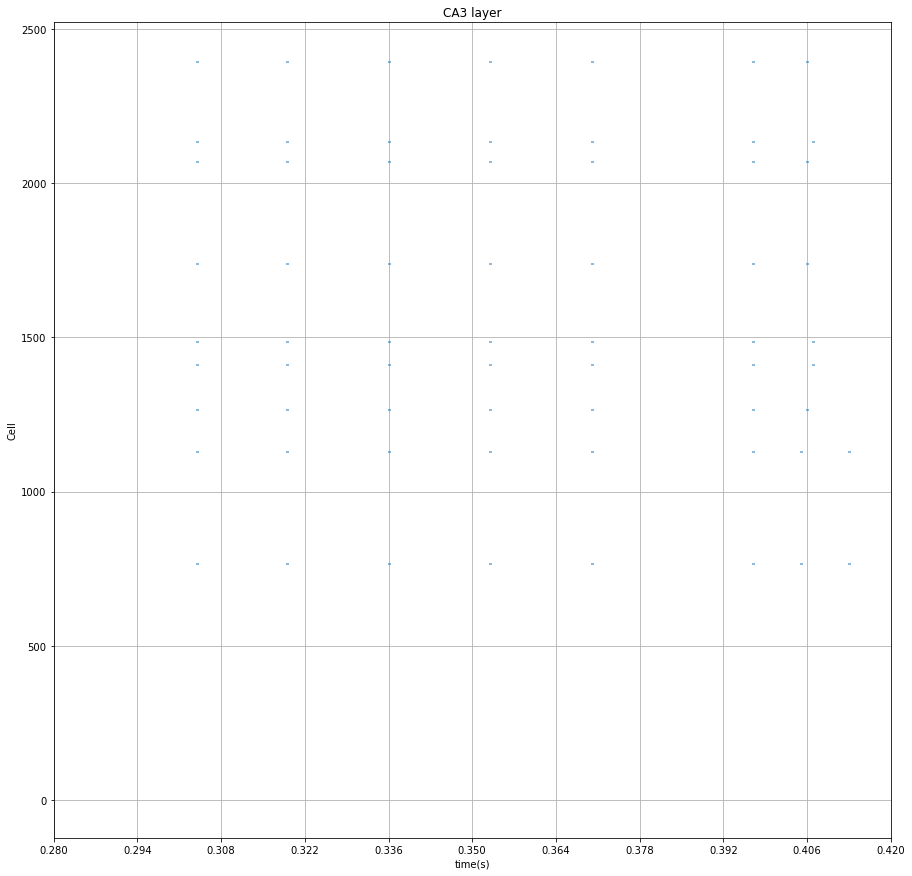

0 :  [1281, 134, 658, 425, 1969, 1991, 2380, 588, 1882, 1374, 2266, 1251, 2031, 1150]
1 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
2 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
3 :  [1857, 1605, 971, 1614, 918, 993, 1635, 292, 2221, 2108, 1727, 1270, 703]


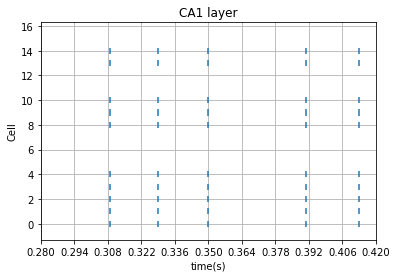

Ret1 :  {1412, 1130, 2026, 1740, 1487, 1265, 1266, 915, 2071, 2136, 2395, 2140, 1598, 767}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 544 [658]
0 550 [2266]
0 552 [425]


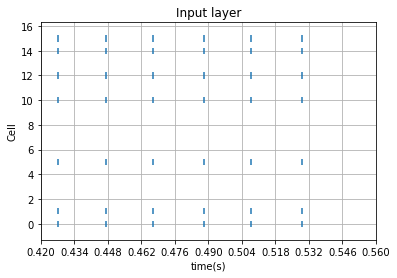

0 :  [ 0  1  4  6  7  9 10 13 15]
1 :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
2 :  [ 0  1  2  3  4  8  9 10 13 14]
3 :  [ 0  1  5 10 12 14 15]


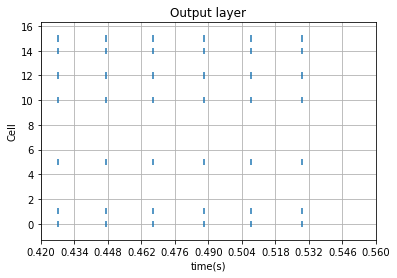

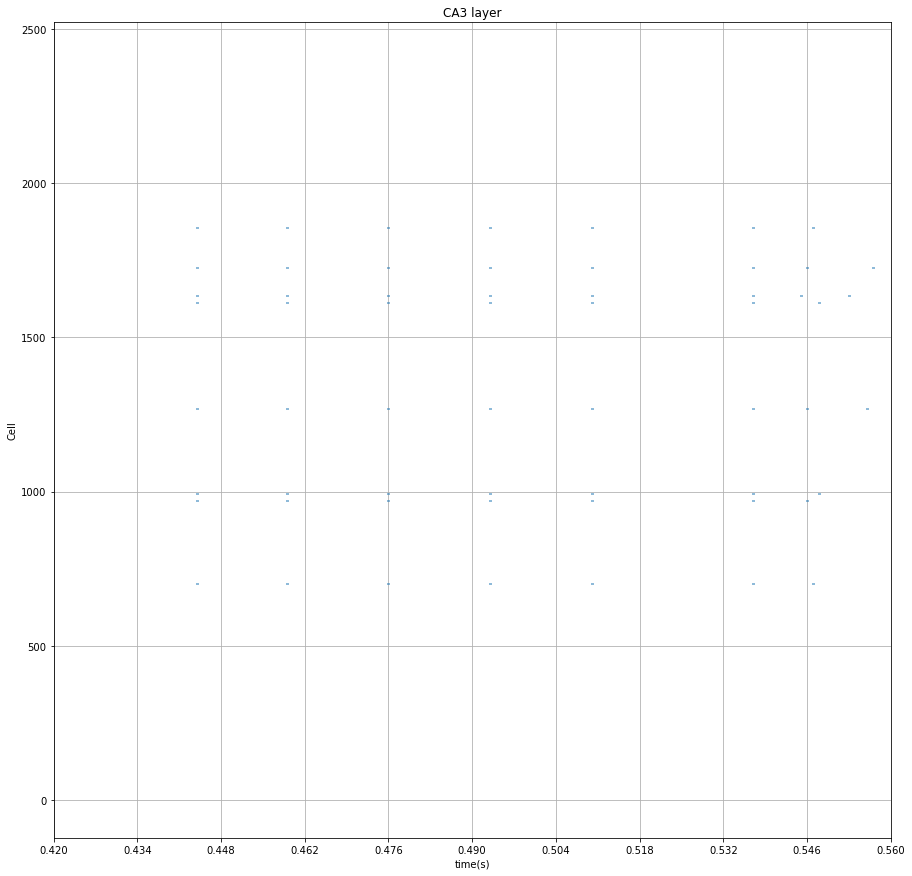

0 :  [1281, 134, 658, 425, 1969, 1991, 2380, 588, 1882, 1374, 2266, 1251, 2031, 1150]
1 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
2 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
3 :  [1857, 1605, 971, 1614, 918, 993, 1635, 292, 2221, 2108, 1727, 1270, 703]


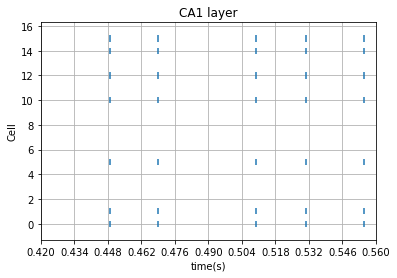

Ret1 :  {993, 1857, 1635, 292, 1605, 971, 2221, 1614, 1727, 918, 1270, 2108, 703}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
Success :  0
Fail :  4
If_fail :  0
Output bias (mean, std) :  0.0 0.0


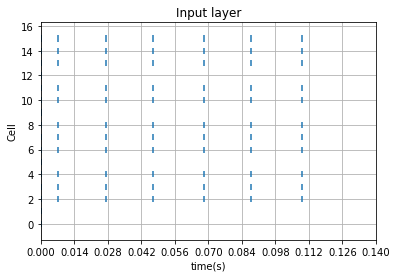

0 :  [ 2  3  4  6  7  8 10 11 13 14 15]
1 :  [ 2  3  4  7  9 10 14]
2 :  [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15]
3 :  [ 2  3  4  5  7  8 10 11 12 13]


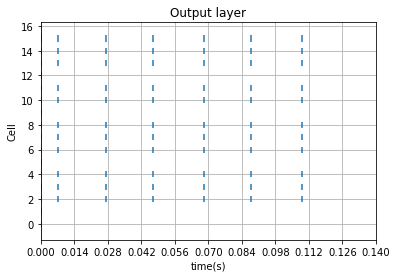

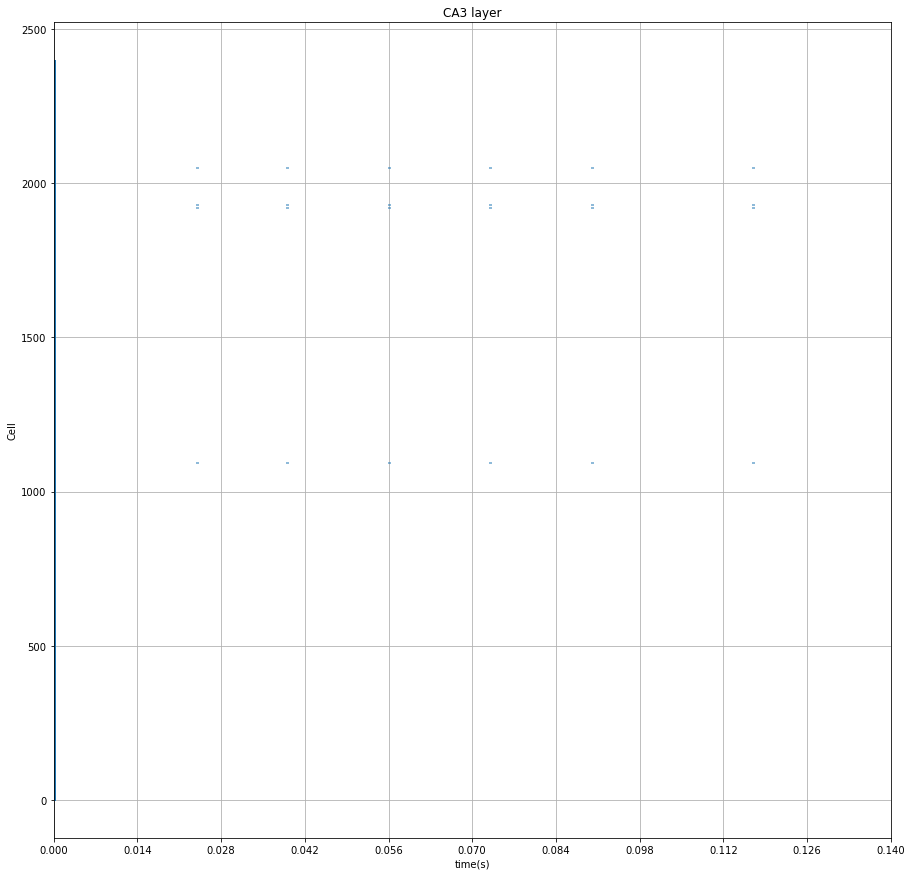

0 :  [1921, 2051, 1930, 402, 1080, 1094, 344, 237, 885]
1 :  [1857, 837, 1542, 1362, 1371, 1770, 557, 1772, 2355, 828, 1150]
2 :  [1038, 532, 1954, 2096, 61, 2114, 1634, 614, 876, 1391]
3 :  [257, 131, 645, 140, 2332, 436, 571, 827, 2249, 1494, 501]


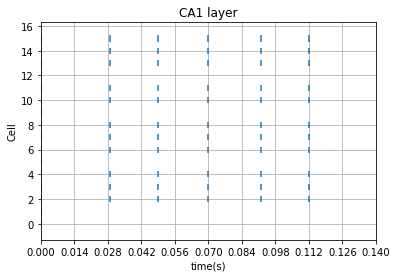

Ret1 :  {1921, 2051, 1094, 1930, 237, 402, 885, 344, 1080}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------


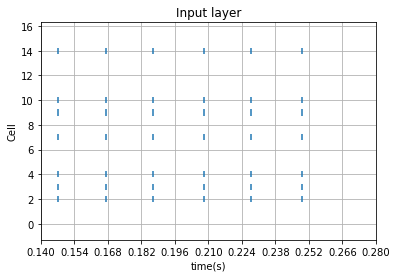

0 :  [ 2  3  4  6  7  8 10 11 13 14 15]
1 :  [ 2  3  4  7  9 10 14]
2 :  [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15]
3 :  [ 2  3  4  5  7  8 10 11 12 13]


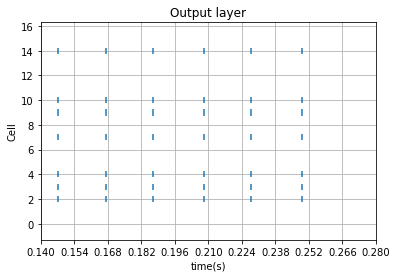

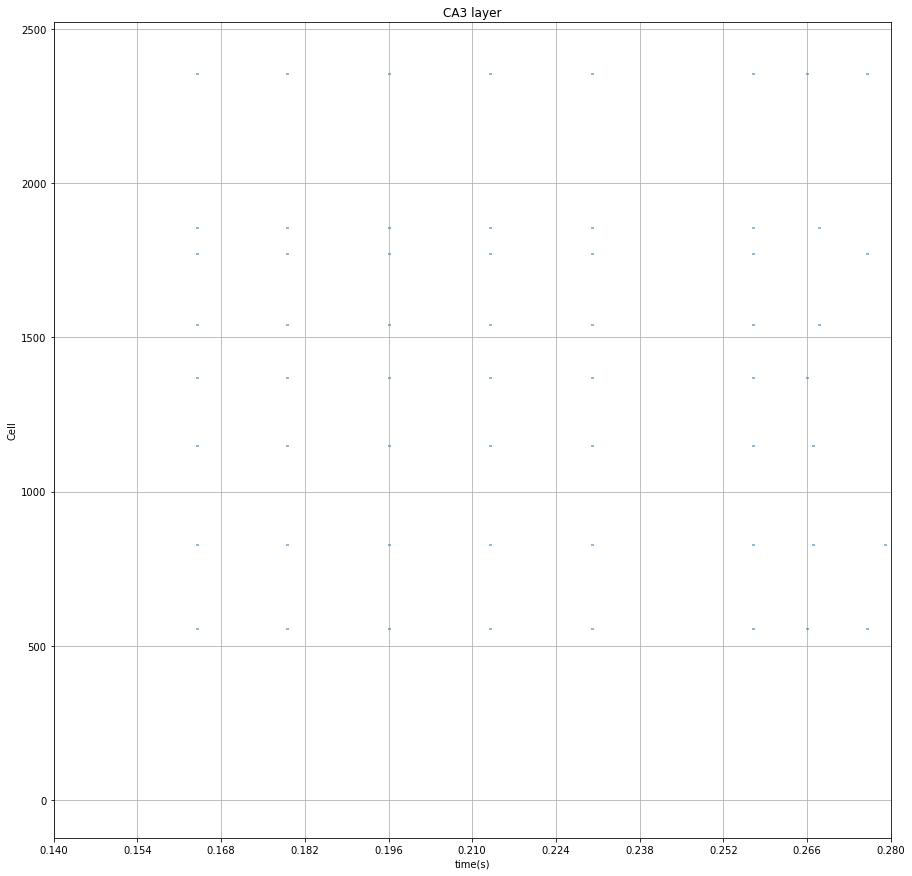

0 :  [1921, 2051, 1930, 402, 1080, 1094, 344, 237, 885]
1 :  [1857, 837, 1542, 1362, 1371, 1770, 557, 1772, 2355, 828, 1150]
2 :  [1038, 532, 1954, 2096, 61, 2114, 1634, 614, 876, 1391]
3 :  [257, 131, 645, 140, 2332, 436, 571, 827, 2249, 1494, 501]


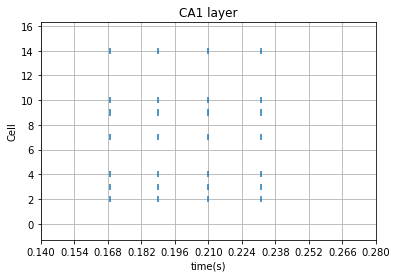

Ret1 :  {1857, 837, 1542, 1770, 1772, 557, 1362, 2355, 1371, 828, 1150}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 413 [344]


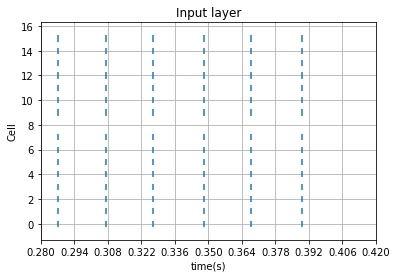

0 :  [ 2  3  4  6  7  8 10 11 13 14 15]
1 :  [ 2  3  4  7  9 10 14]
2 :  [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15]
3 :  [ 2  3  4  5  7  8 10 11 12 13]


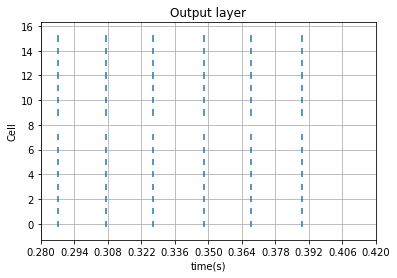

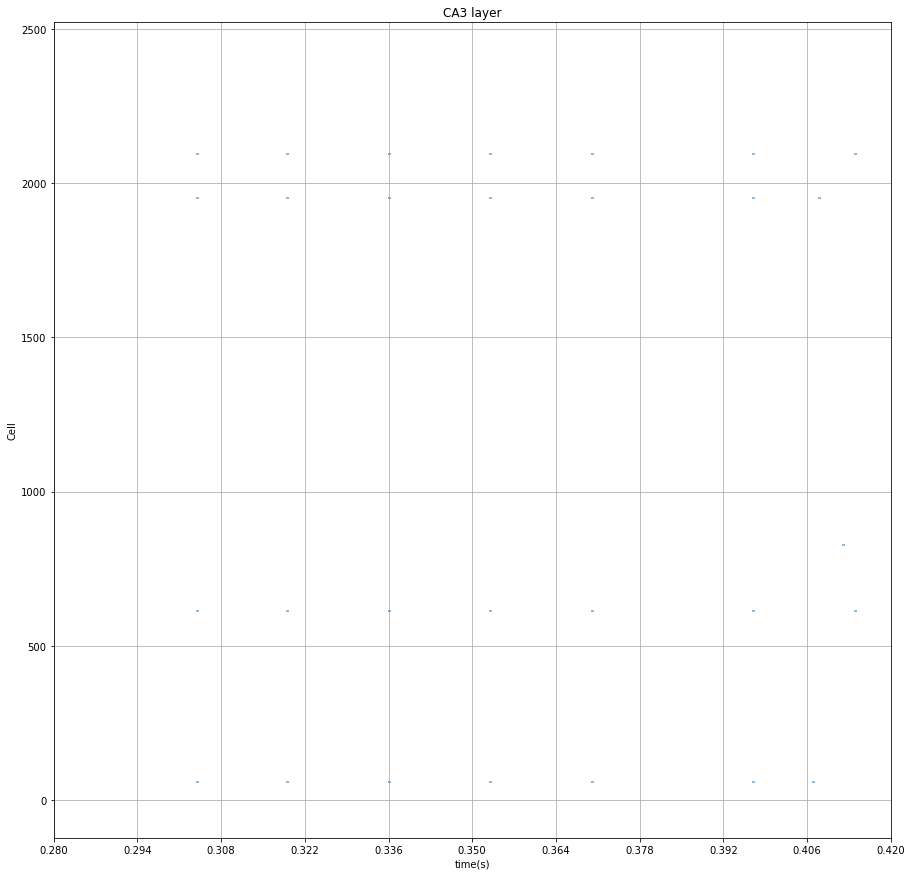

0 :  [1921, 2051, 1930, 402, 1080, 1094, 344, 237, 885]
1 :  [1857, 837, 1542, 1362, 1371, 1770, 557, 1772, 2355, 828, 1150]
2 :  [1038, 532, 1954, 2096, 61, 2114, 1634, 614, 876, 1391]
3 :  [257, 131, 645, 140, 2332, 436, 571, 827, 2249, 1494, 501]


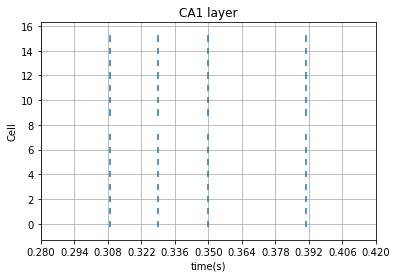

Ret1 :  {1634, 1954, 2114, 614, 876, 1038, 1391, 2096, 532, 828, 61}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------


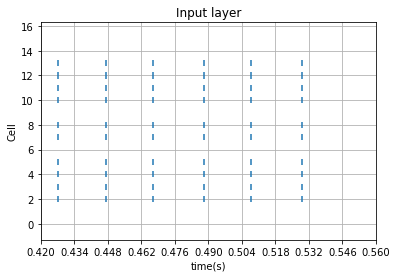

0 :  [ 2  3  4  6  7  8 10 11 13 14 15]
1 :  [ 2  3  4  7  9 10 14]
2 :  [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15]
3 :  [ 2  3  4  5  7  8 10 11 12 13]


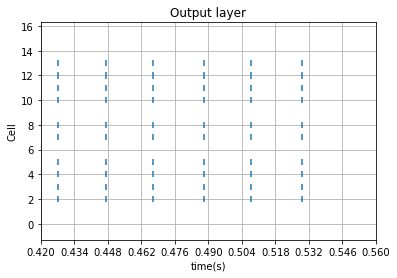

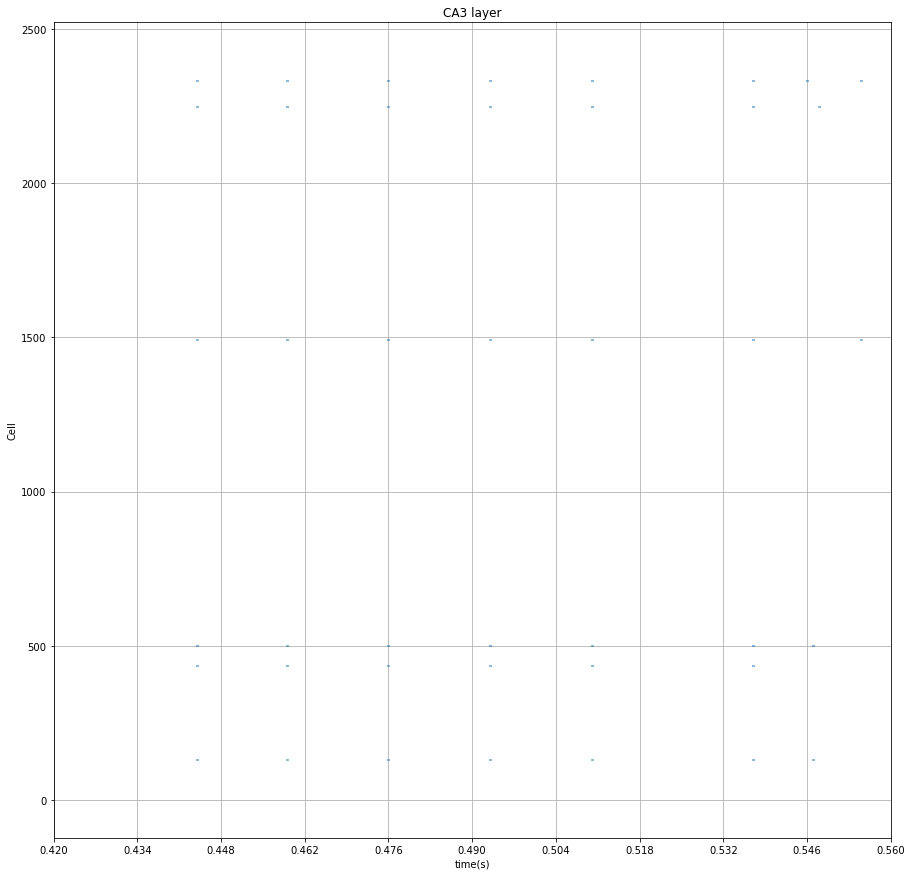

0 :  [1921, 2051, 1930, 402, 1080, 1094, 344, 237, 885]
1 :  [1857, 837, 1542, 1362, 1371, 1770, 557, 1772, 2355, 828, 1150]
2 :  [1038, 532, 1954, 2096, 61, 2114, 1634, 614, 876, 1391]
3 :  [257, 131, 645, 140, 2332, 436, 571, 827, 2249, 1494, 501]


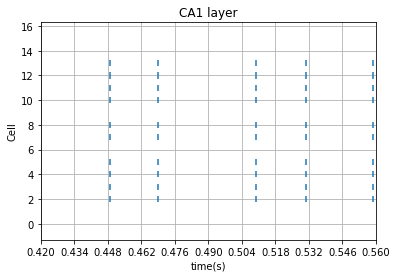

Ret1 :  {257, 827, 131, 645, 2249, 140, 436, 501, 1494, 571, 2332}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
Success :  0
Fail :  4
If_fail :  0
Output bias (mean, std) :  0.0 0.0
0 127 [656]


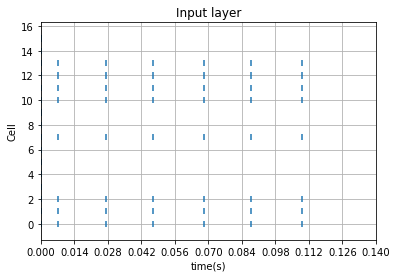

0 :  [ 0  1  2  7 10 11 12 13]
1 :  [ 0  1  3  5 10 12 13 15]
2 :  [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15]
3 :  [ 0  1  2  4  6  7  8  9 10 11 12 13 14]


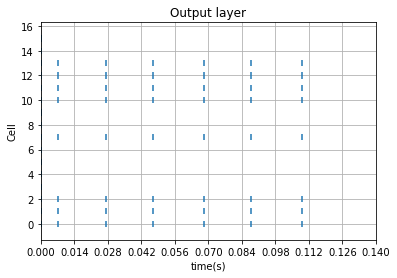

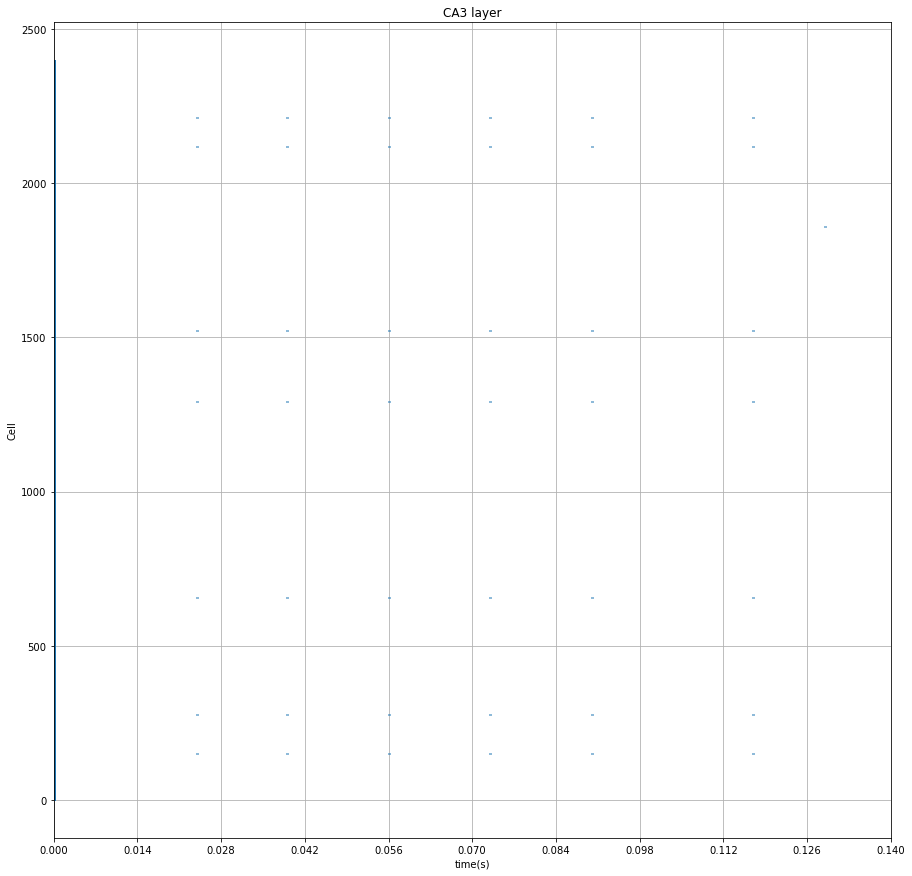

0 :  [2119, 1292, 656, 278, 151, 214, 2331, 2212, 1522, 1650]
1 :  [2308, 131, 406, 1458, 1212, 2249, 1494, 1370, 1755, 2265, 1895, 2030]
2 :  [1038, 532, 1954, 2096, 61, 2114, 1634, 614, 876, 1391]
3 :  [323, 658, 1879, 609, 483, 1195, 172, 111, 1007, 561, 1139, 569]


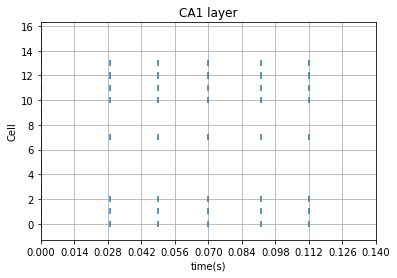

Ret1 :  {1859, 2212, 2119, 1292, 656, 1522, 1650, 278, 214, 151, 2331}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 265 [1292]


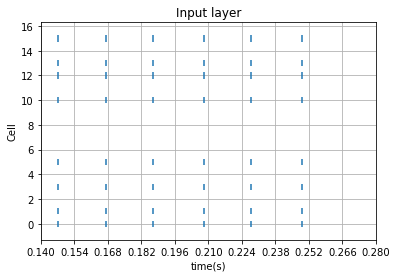

0 :  [ 0  1  2  7 10 11 12 13]
1 :  [ 0  1  3  5 10 12 13 15]
2 :  [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15]
3 :  [ 0  1  2  4  6  7  8  9 10 11 12 13 14]


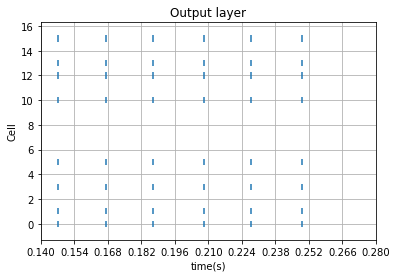

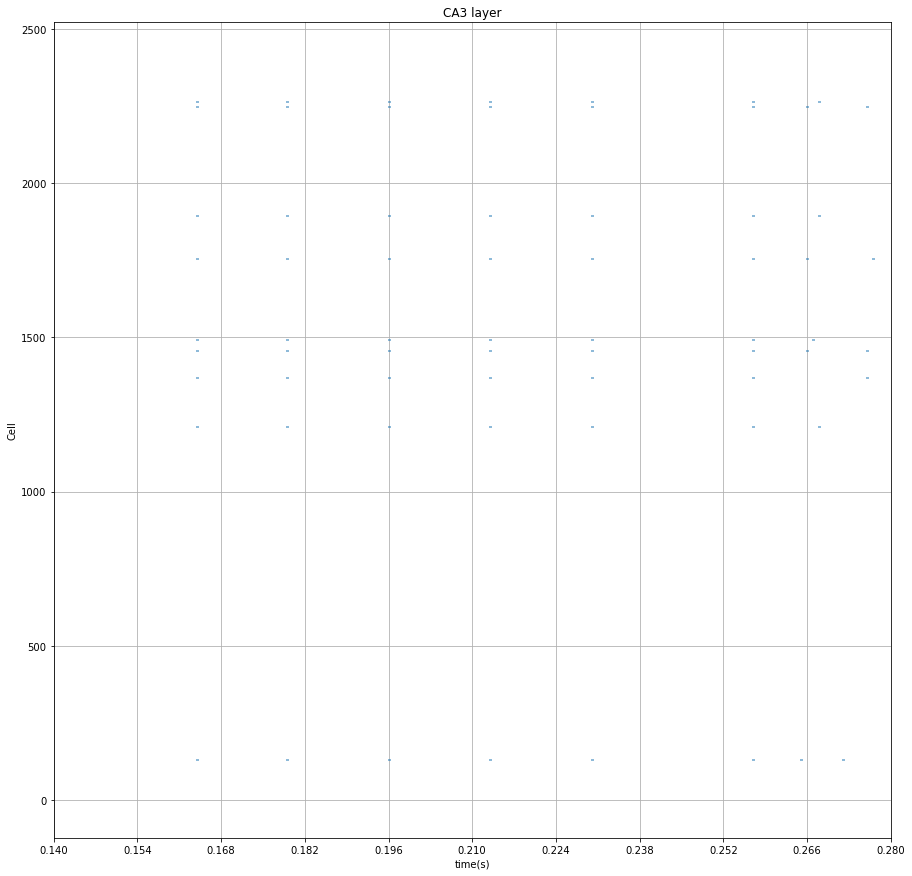

0 :  [2119, 1292, 656, 278, 151, 214, 2331, 2212, 1522, 1650]
1 :  [2308, 131, 406, 1458, 1212, 2249, 1494, 1370, 1755, 2265, 1895, 2030]
2 :  [1038, 532, 1954, 2096, 61, 2114, 1634, 614, 876, 1391]
3 :  [323, 658, 1879, 609, 483, 1195, 172, 111, 1007, 561, 1139, 569]


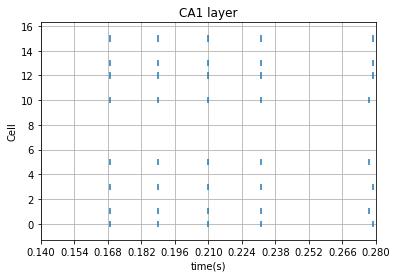

Ret1 :  {131, 2308, 1895, 2249, 2030, 1458, 406, 1494, 2265, 1370, 1755, 1212}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------


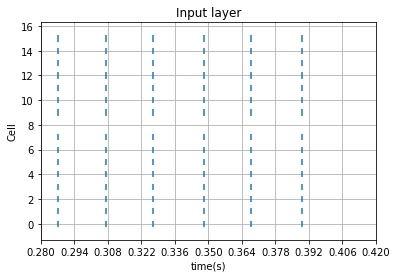

0 :  [ 0  1  2  7 10 11 12 13]
1 :  [ 0  1  3  5 10 12 13 15]
2 :  [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15]
3 :  [ 0  1  2  4  6  7  8  9 10 11 12 13 14]


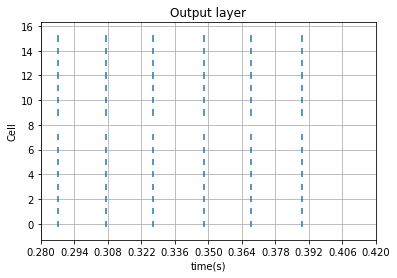

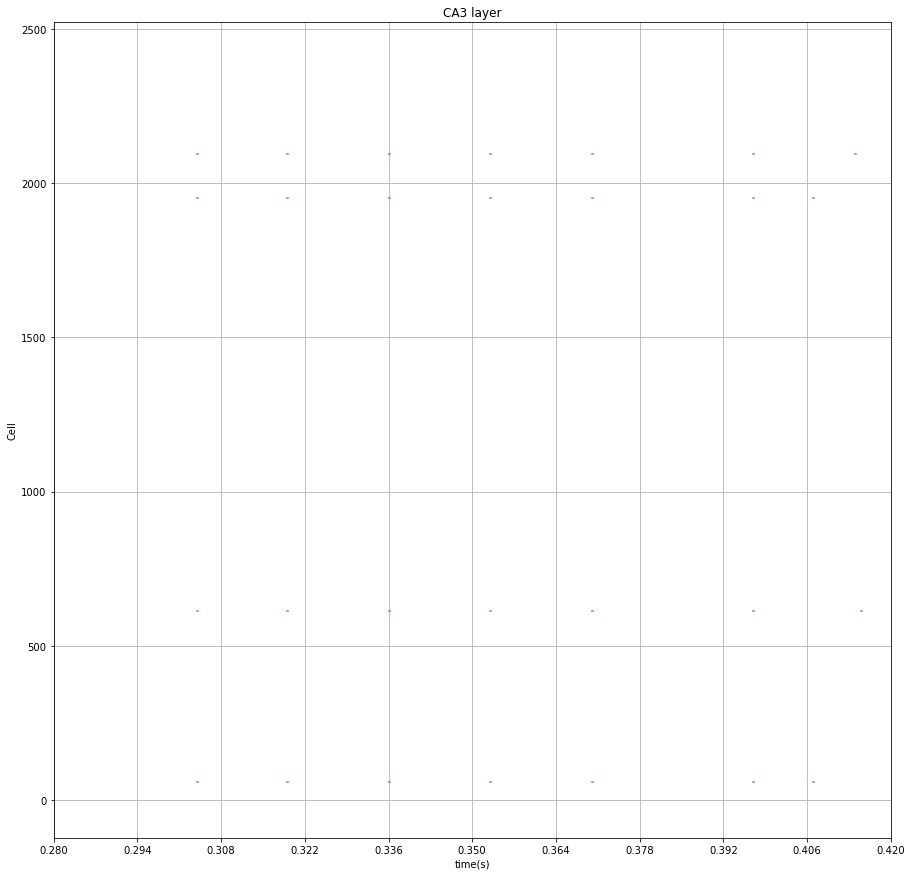

0 :  [2119, 1292, 656, 278, 151, 214, 2331, 2212, 1522, 1650]
1 :  [2308, 131, 406, 1458, 1212, 2249, 1494, 1370, 1755, 2265, 1895, 2030]
2 :  [1038, 532, 1954, 2096, 61, 2114, 1634, 614, 876, 1391]
3 :  [323, 658, 1879, 609, 483, 1195, 172, 111, 1007, 561, 1139, 569]


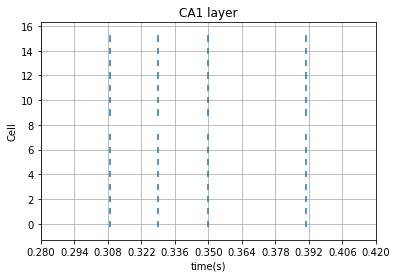

Ret1 :  {1634, 1954, 2114, 614, 876, 1038, 1391, 2096, 532, 61}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 543 [2119]


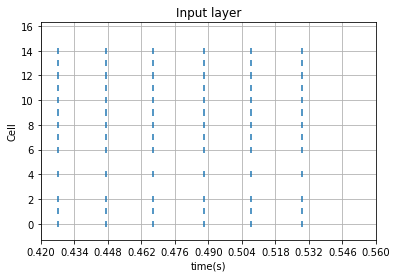

0 :  [ 0  1  2  7 10 11 12 13]
1 :  [ 0  1  3  5 10 12 13 15]
2 :  [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15]
3 :  [ 0  1  2  4  6  7  8  9 10 11 12 13 14]


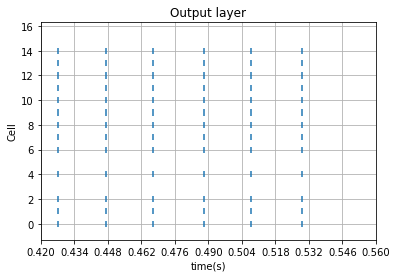

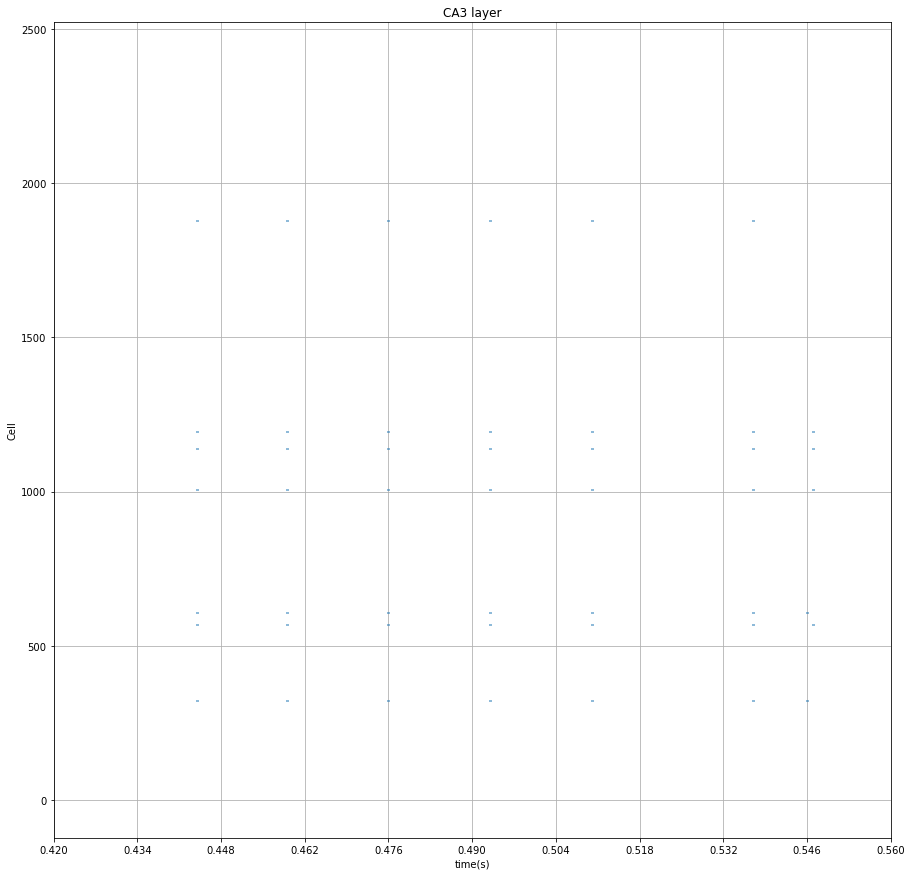

0 :  [2119, 1292, 656, 278, 151, 214, 2331, 2212, 1522, 1650]
1 :  [2308, 131, 406, 1458, 1212, 2249, 1494, 1370, 1755, 2265, 1895, 2030]
2 :  [1038, 532, 1954, 2096, 61, 2114, 1634, 614, 876, 1391]
3 :  [323, 658, 1879, 609, 483, 1195, 172, 111, 1007, 561, 1139, 569]


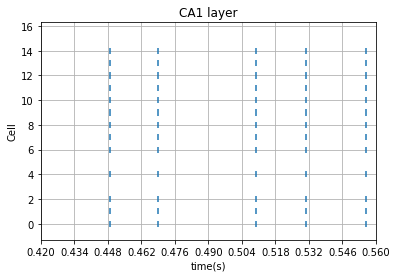

Ret1 :  {609, 323, 483, 1195, 172, 111, 1007, 561, 658, 1139, 1879, 569}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
Success :  0
Fail :  4
If_fail :  0
Output bias (mean, std) :  0.0 0.0


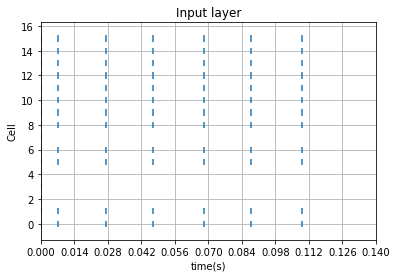

0 :  [ 0  1  5  6  8  9 10 11 12 13 14 15]
1 :  [ 2  6  9 11 12 13]
2 :  [ 2  3  4  5  6  7 11 12 13 14]
3 :  [ 2  6 10 12 13]
4 :  [ 0  1  2  4  6  7  8  9 10 11 12 13 14]


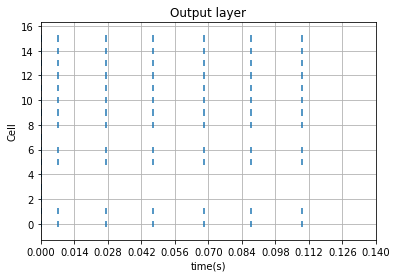

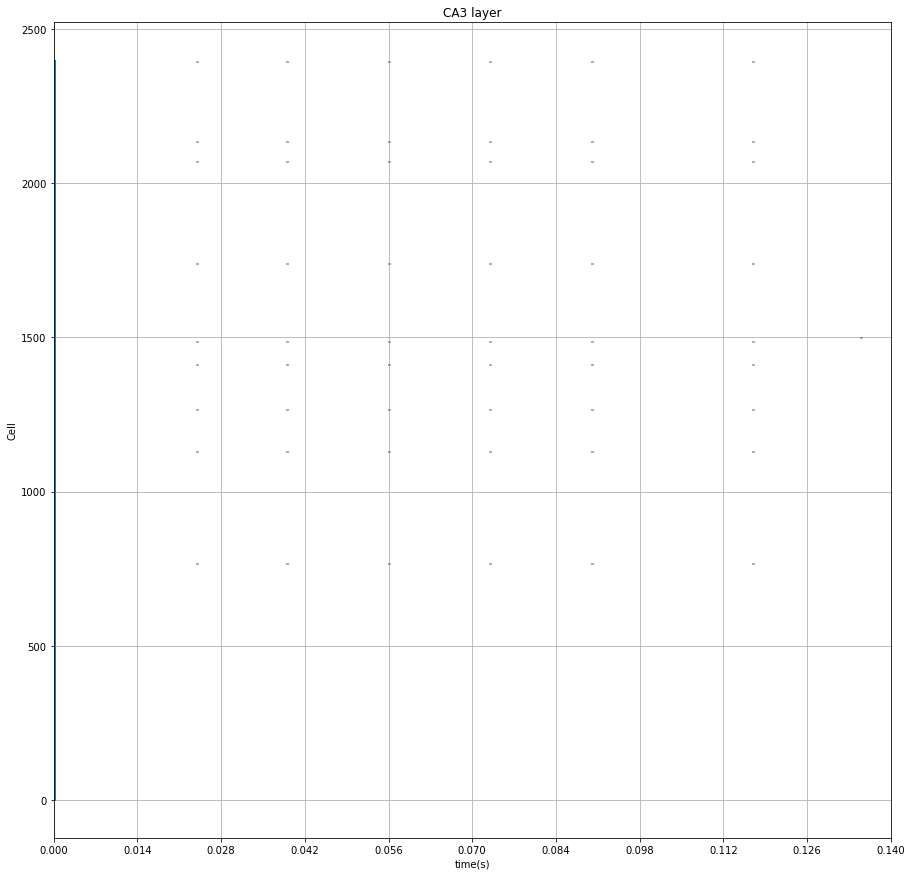

0 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
1 :  [509, 1991, 2376, 585, 1547, 1484, 2380, 1244, 1374, 1251, 357, 1192, 686]
2 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
3 :  [1681, 1560, 2203, 936, 1854, 577, 2264, 730, 2024, 1004, 1396, 1788, 1534]
4 :  [323, 658, 1879, 609, 483, 1195, 172, 111, 1007, 561, 1139, 569]


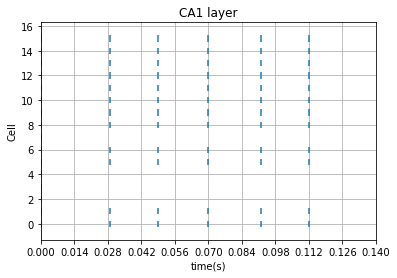

Ret1 :  {1412, 1130, 2026, 1740, 1487, 1265, 1266, 915, 2395, 2071, 2136, 1499, 2140, 1598, 767}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------


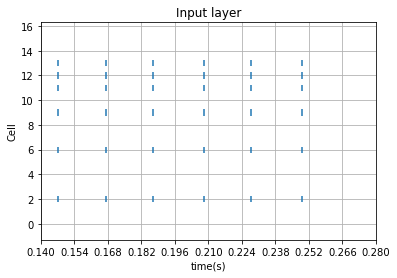

0 :  [ 0  1  5  6  8  9 10 11 12 13 14 15]
1 :  [ 2  6  9 11 12 13]
2 :  [ 2  3  4  5  6  7 11 12 13 14]
3 :  [ 2  6 10 12 13]
4 :  [ 0  1  2  4  6  7  8  9 10 11 12 13 14]


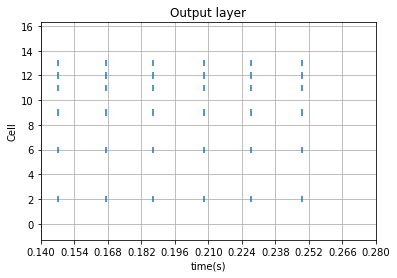

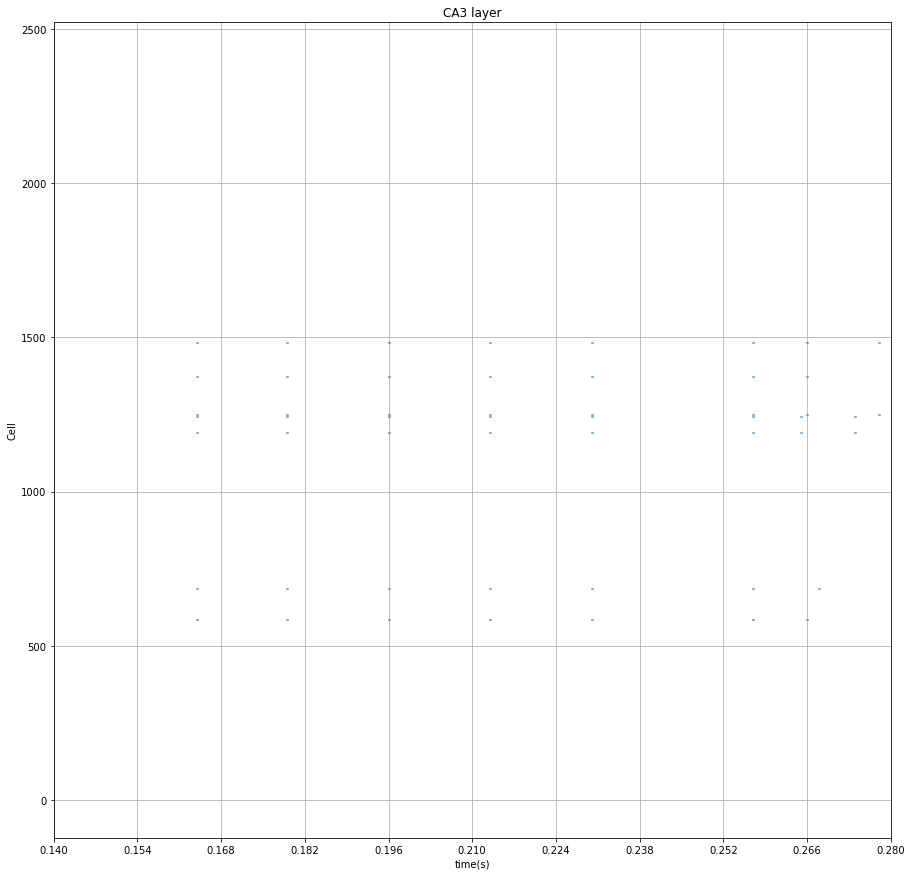

0 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
1 :  [509, 1991, 2376, 585, 1547, 1484, 2380, 1244, 1374, 1251, 357, 1192, 686]
2 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
3 :  [1681, 1560, 2203, 936, 1854, 577, 2264, 730, 2024, 1004, 1396, 1788, 1534]
4 :  [323, 658, 1879, 609, 483, 1195, 172, 111, 1007, 561, 1139, 569]


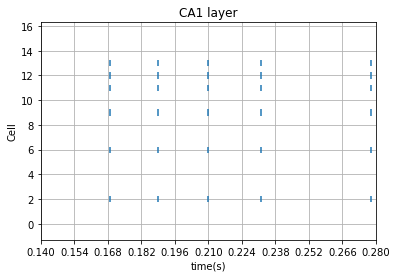

Ret1 :  {1251, 357, 1991, 1192, 585, 2376, 1547, 1484, 2380, 686, 1244, 509, 1374}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 415 [915]


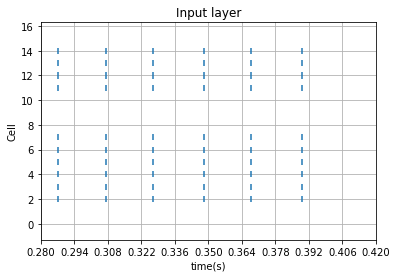

0 :  [ 0  1  5  6  8  9 10 11 12 13 14 15]
1 :  [ 2  6  9 11 12 13]
2 :  [ 2  3  4  5  6  7 11 12 13 14]
3 :  [ 2  6 10 12 13]
4 :  [ 0  1  2  4  6  7  8  9 10 11 12 13 14]


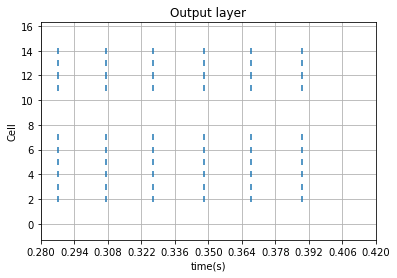

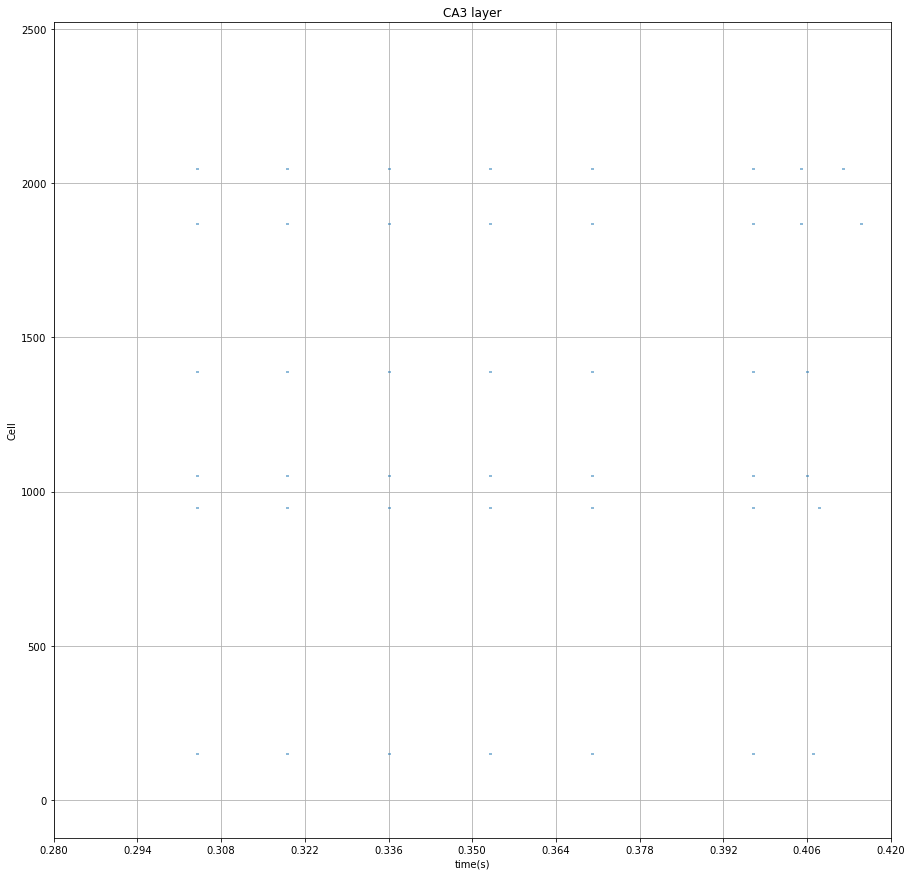

0 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
1 :  [509, 1991, 2376, 585, 1547, 1484, 2380, 1244, 1374, 1251, 357, 1192, 686]
2 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
3 :  [1681, 1560, 2203, 936, 1854, 577, 2264, 730, 2024, 1004, 1396, 1788, 1534]
4 :  [323, 658, 1879, 609, 483, 1195, 172, 111, 1007, 561, 1139, 569]


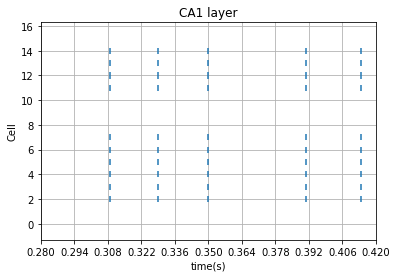

Ret1 :  {2048, 1988, 1637, 299, 2347, 1389, 1870, 2001, 2039, 948, 151, 1115, 1053}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------


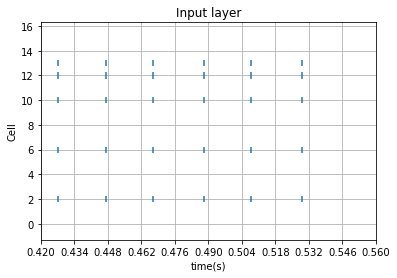

0 :  [ 0  1  5  6  8  9 10 11 12 13 14 15]
1 :  [ 2  6  9 11 12 13]
2 :  [ 2  3  4  5  6  7 11 12 13 14]
3 :  [ 2  6 10 12 13]
4 :  [ 0  1  2  4  6  7  8  9 10 11 12 13 14]


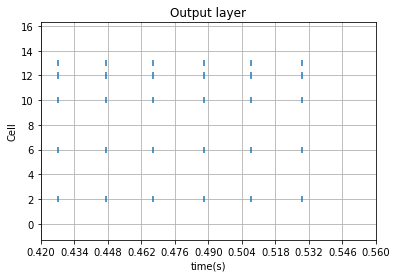

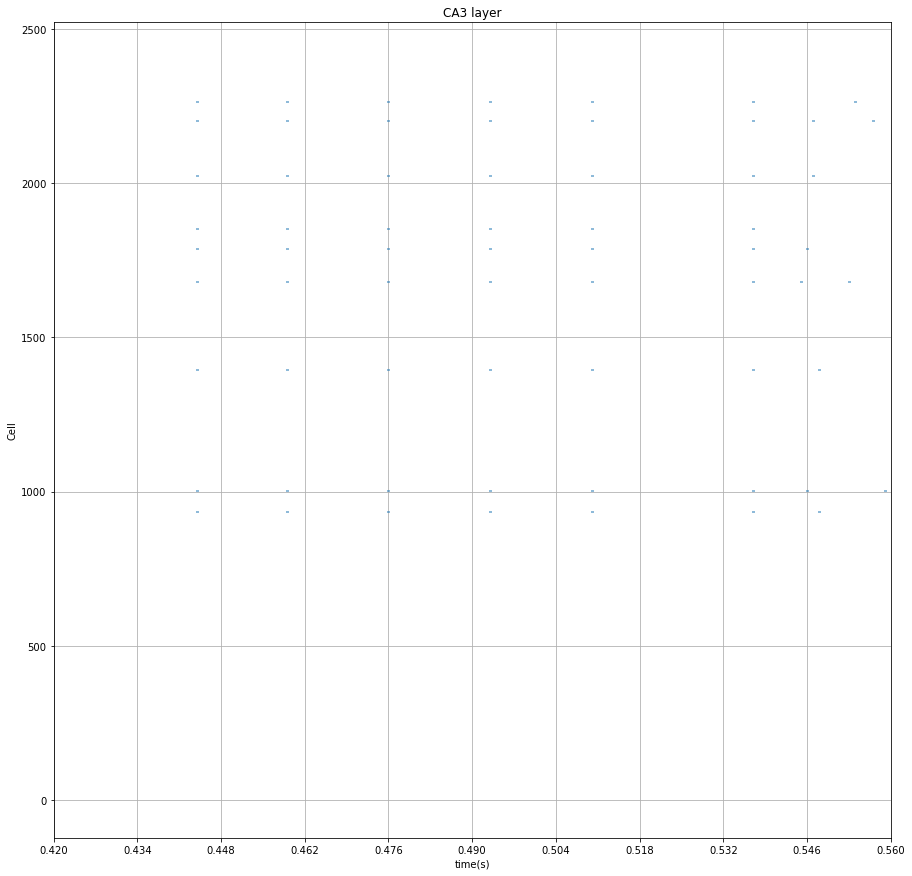

0 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
1 :  [509, 1991, 2376, 585, 1547, 1484, 2380, 1244, 1374, 1251, 357, 1192, 686]
2 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
3 :  [1681, 1560, 2203, 936, 1854, 577, 2264, 730, 2024, 1004, 1396, 1788, 1534]
4 :  [323, 658, 1879, 609, 483, 1195, 172, 111, 1007, 561, 1139, 569]


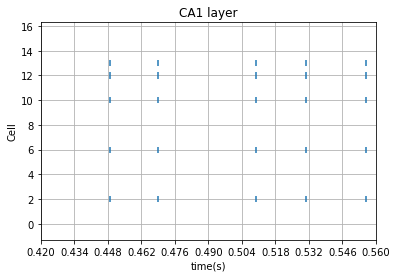

Ret1 :  {577, 936, 2024, 1004, 1854, 1681, 1396, 1560, 730, 2203, 1788, 1534, 2264}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------


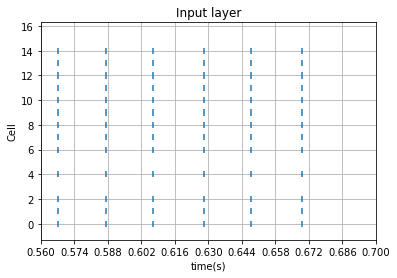

0 :  [ 0  1  5  6  8  9 10 11 12 13 14 15]
1 :  [ 2  6  9 11 12 13]
2 :  [ 2  3  4  5  6  7 11 12 13 14]
3 :  [ 2  6 10 12 13]
4 :  [ 0  1  2  4  6  7  8  9 10 11 12 13 14]


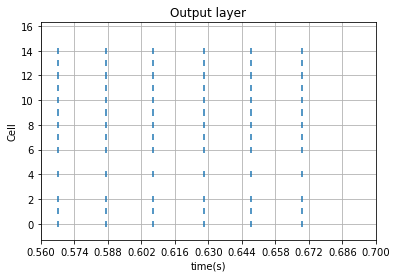

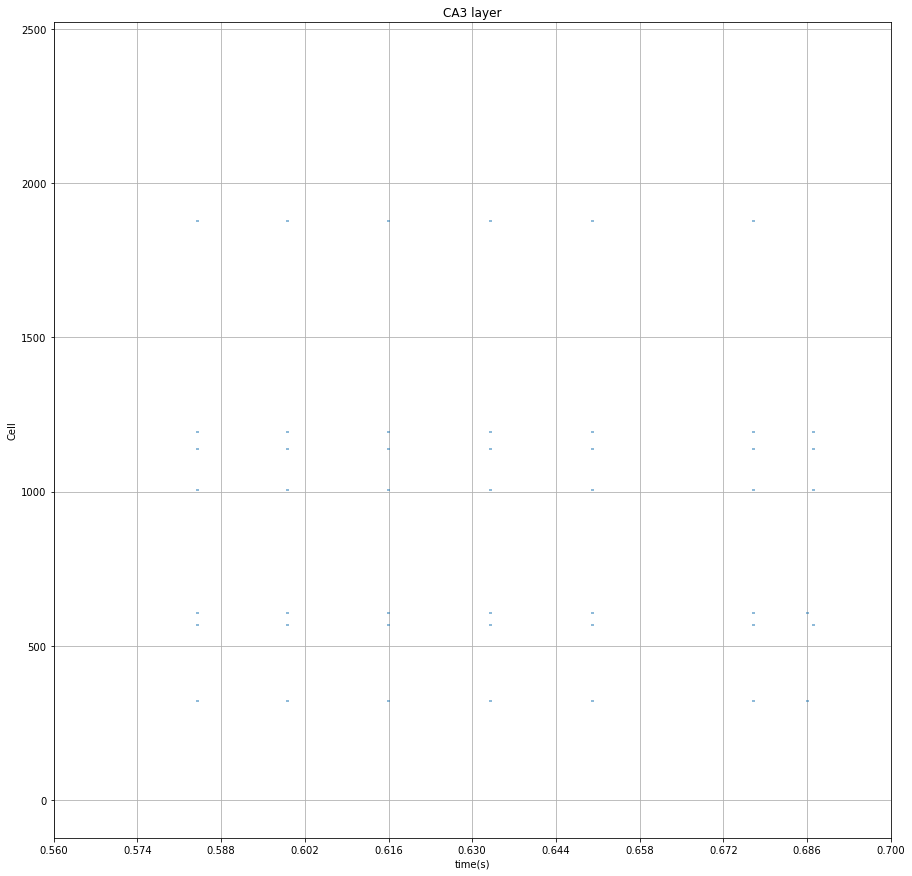

0 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
1 :  [509, 1991, 2376, 585, 1547, 1484, 2380, 1244, 1374, 1251, 357, 1192, 686]
2 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
3 :  [1681, 1560, 2203, 936, 1854, 577, 2264, 730, 2024, 1004, 1396, 1788, 1534]
4 :  [323, 658, 1879, 609, 483, 1195, 172, 111, 1007, 561, 1139, 569]


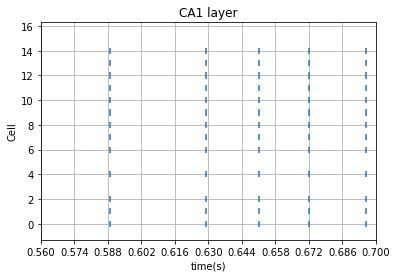

Ret1 :  {609, 323, 483, 1195, 172, 111, 1007, 561, 658, 1139, 1879, 569}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
Success :  0
Fail :  5
If_fail :  0
Output bias (mean, std) :  0.0 0.0
0 125 [588]
0 126 [2031]


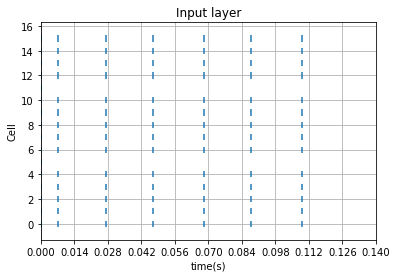

0 :  [ 0  1  2  3  4  6  7  8  9 10 12 13 14 15]
1 :  [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14]
2 :  [ 0  1  2  3  4  8  9 10 13 14]
3 :  [ 0  1  8 10 12 14]
4 :  [ 0  1  3  5 10 12 13 15]


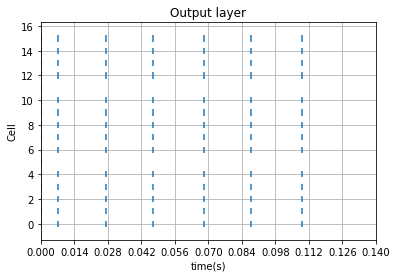

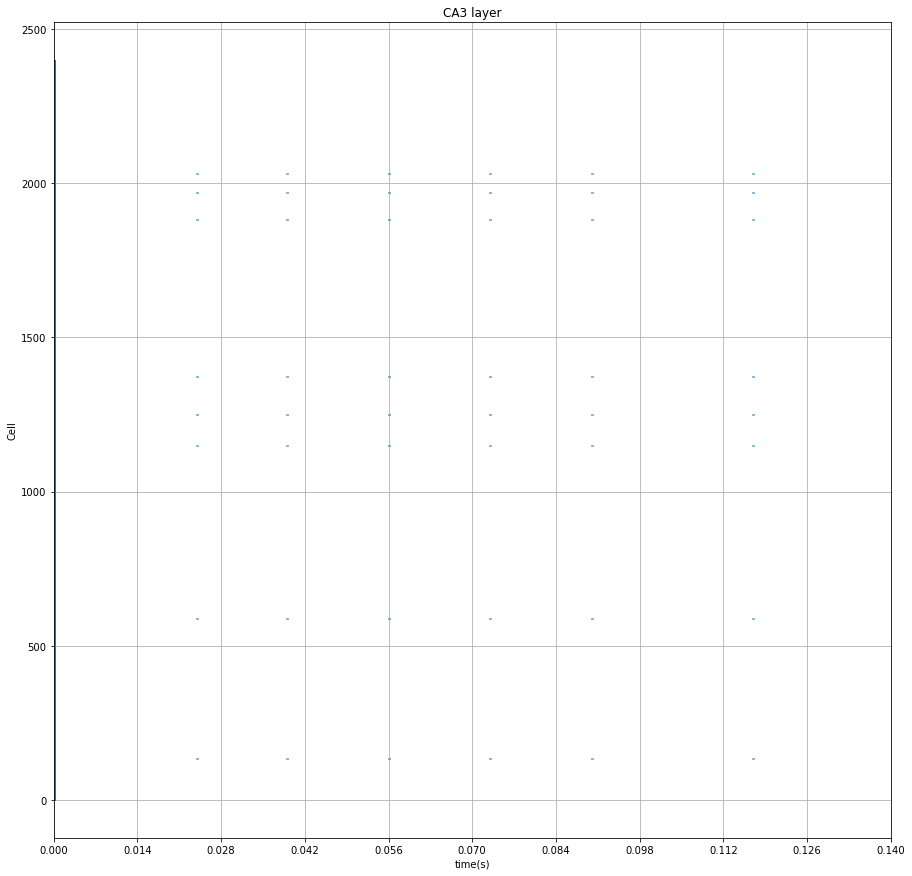

0 :  [1281, 134, 658, 425, 1969, 1991, 2380, 588, 1882, 1374, 2266, 1251, 2031, 1150]
1 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
2 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
3 :  [1857, 1605, 971, 1614, 918, 993, 1635, 292, 2221, 2108, 1727, 1270, 703]
4 :  [2308, 131, 406, 1458, 1212, 2249, 1494, 1370, 1755, 2265, 1895, 2030]


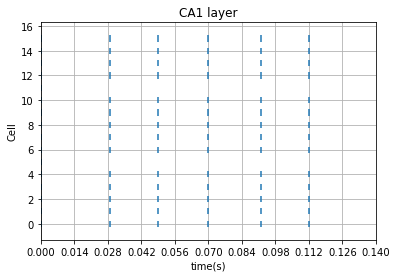

Ret1 :  {1281, 1374, 1251, 134, 1991, 425, 2266, 588, 2380, 2031, 1969, 658, 1882, 1150}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 278 [1991]


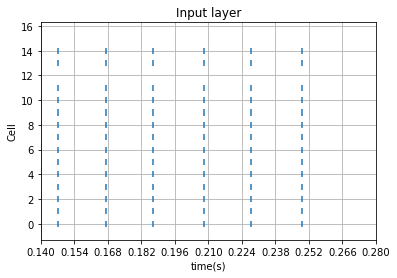

0 :  [ 0  1  2  3  4  6  7  8  9 10 12 13 14 15]
1 :  [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14]
2 :  [ 0  1  2  3  4  8  9 10 13 14]
3 :  [ 0  1  8 10 12 14]
4 :  [ 0  1  3  5 10 12 13 15]


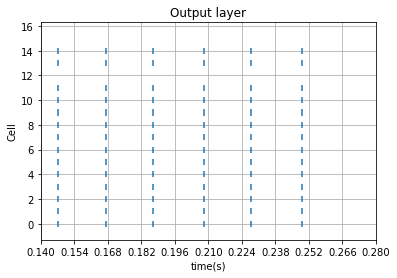

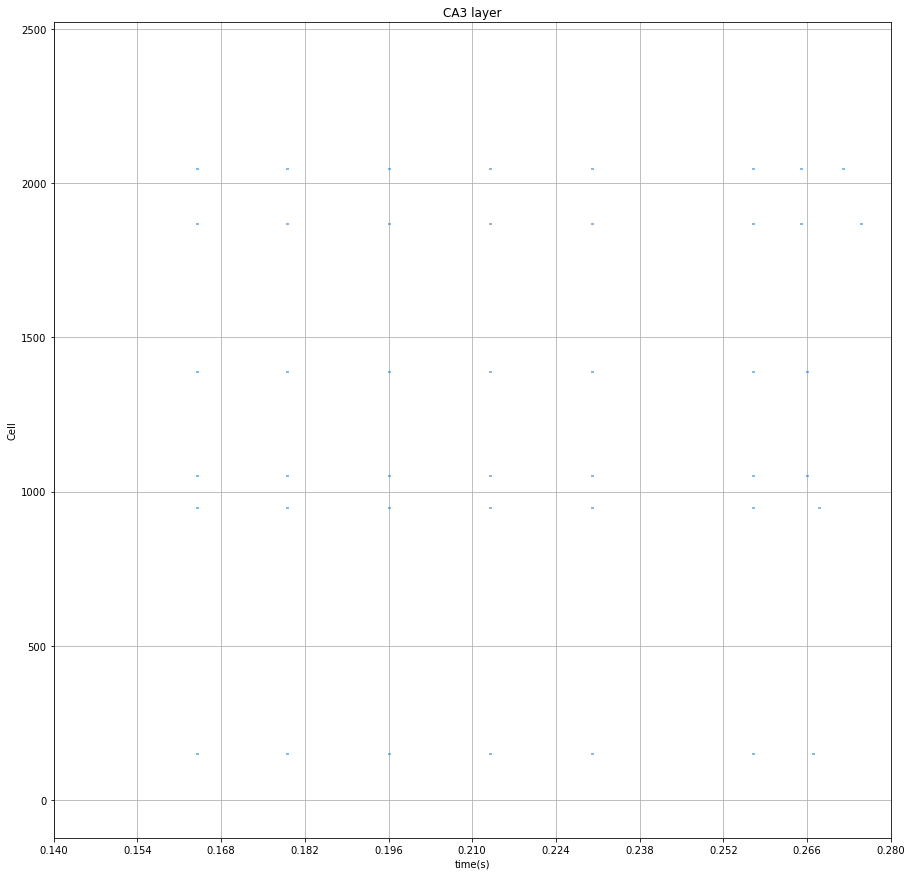

0 :  [1281, 134, 658, 425, 1969, 1991, 2380, 588, 1882, 1374, 2266, 1251, 2031, 1150]
1 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
2 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
3 :  [1857, 1605, 971, 1614, 918, 993, 1635, 292, 2221, 2108, 1727, 1270, 703]
4 :  [2308, 131, 406, 1458, 1212, 2249, 1494, 1370, 1755, 2265, 1895, 2030]


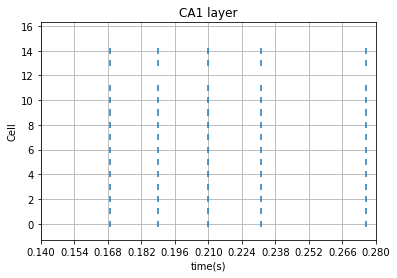

Ret1 :  {2048, 1988, 1637, 299, 2347, 1389, 1870, 2001, 2039, 948, 151, 1115, 1053}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------


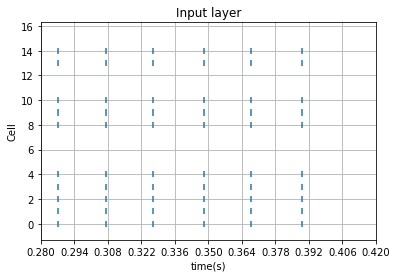

0 :  [ 0  1  2  3  4  6  7  8  9 10 12 13 14 15]
1 :  [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14]
2 :  [ 0  1  2  3  4  8  9 10 13 14]
3 :  [ 0  1  8 10 12 14]
4 :  [ 0  1  3  5 10 12 13 15]


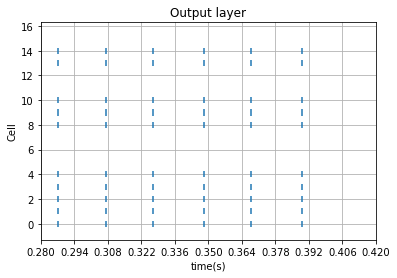

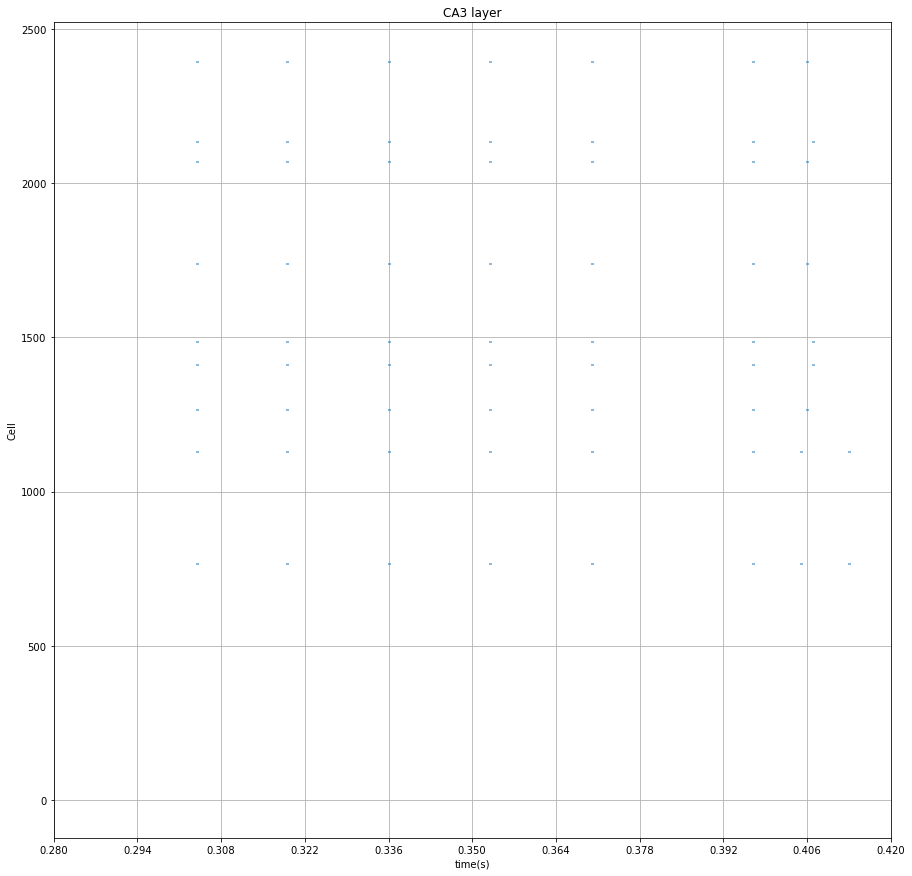

0 :  [1281, 134, 658, 425, 1969, 1991, 2380, 588, 1882, 1374, 2266, 1251, 2031, 1150]
1 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
2 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
3 :  [1857, 1605, 971, 1614, 918, 993, 1635, 292, 2221, 2108, 1727, 1270, 703]
4 :  [2308, 131, 406, 1458, 1212, 2249, 1494, 1370, 1755, 2265, 1895, 2030]


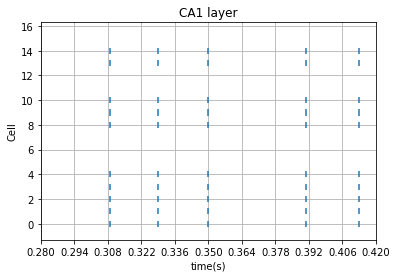

Ret1 :  {1412, 1130, 2026, 1740, 1487, 1265, 1266, 915, 2071, 2136, 2395, 2140, 1598, 767}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 554 [1969]


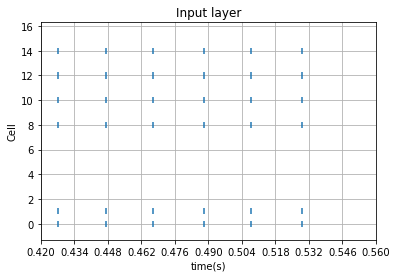

0 :  [ 0  1  2  3  4  6  7  8  9 10 12 13 14 15]
1 :  [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14]
2 :  [ 0  1  2  3  4  8  9 10 13 14]
3 :  [ 0  1  8 10 12 14]
4 :  [ 0  1  3  5 10 12 13 15]


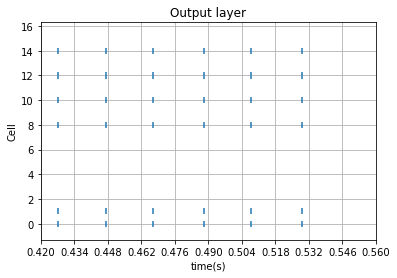

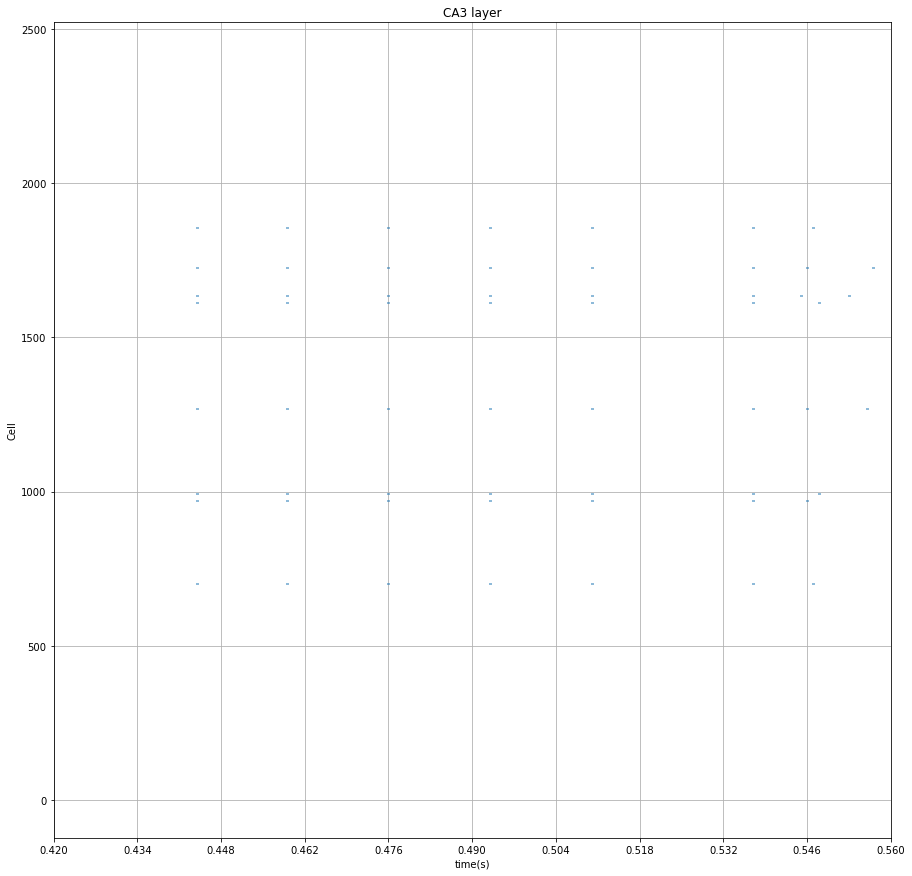

0 :  [1281, 134, 658, 425, 1969, 1991, 2380, 588, 1882, 1374, 2266, 1251, 2031, 1150]
1 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
2 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
3 :  [1857, 1605, 971, 1614, 918, 993, 1635, 292, 2221, 2108, 1727, 1270, 703]
4 :  [2308, 131, 406, 1458, 1212, 2249, 1494, 1370, 1755, 2265, 1895, 2030]


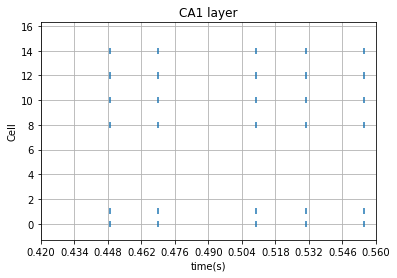

Ret1 :  {993, 1857, 1635, 292, 1605, 971, 2221, 1614, 1727, 918, 1270, 2108, 703}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 686 [425]
0 697 [134]


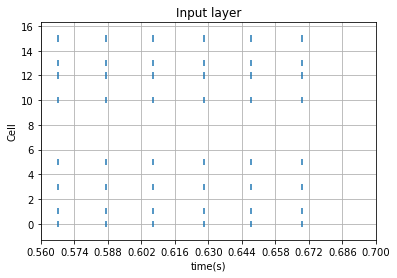

0 :  [ 0  1  2  3  4  6  7  8  9 10 12 13 14 15]
1 :  [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14]
2 :  [ 0  1  2  3  4  8  9 10 13 14]
3 :  [ 0  1  8 10 12 14]
4 :  [ 0  1  3  5 10 12 13 15]


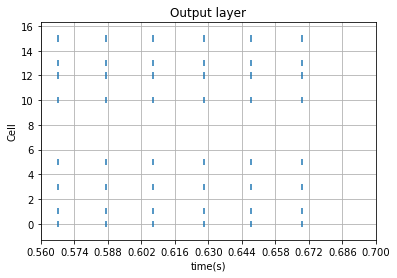

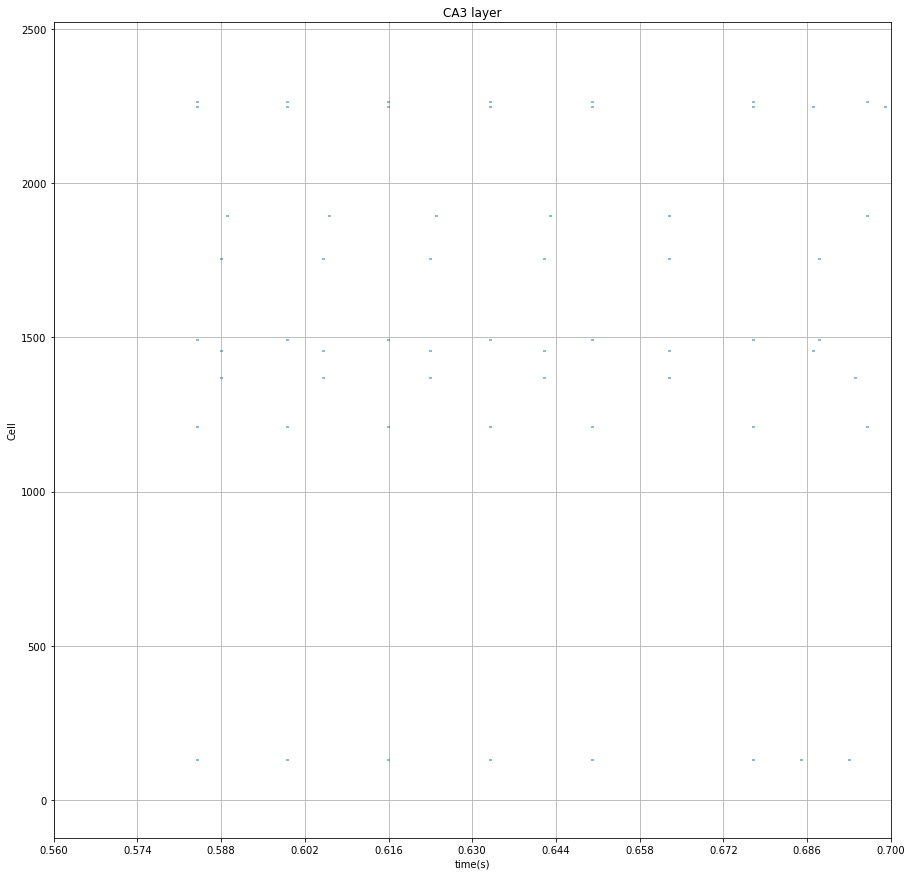

0 :  [1281, 134, 658, 425, 1969, 1991, 2380, 588, 1882, 1374, 2266, 1251, 2031, 1150]
1 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
2 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
3 :  [1857, 1605, 971, 1614, 918, 993, 1635, 292, 2221, 2108, 1727, 1270, 703]
4 :  [2308, 131, 406, 1458, 1212, 2249, 1494, 1370, 1755, 2265, 1895, 2030]


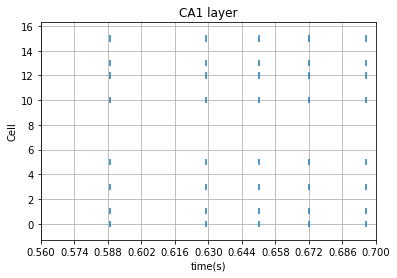

Ret1 :  {131, 2308, 1895, 2249, 2030, 1458, 406, 1494, 2265, 1370, 1755, 1212}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
Success :  0
Fail :  5
If_fail :  0
Output bias (mean, std) :  0.0 0.0
0 127 [425]
0 136 [1374]


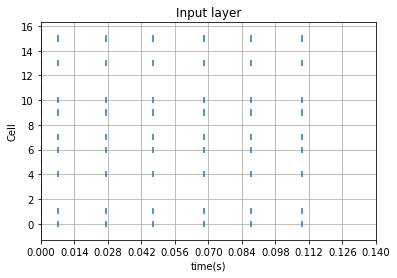

0 :  [ 0  1  4  6  7  9 10 13 15]
1 :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
2 :  [ 0  1  2  3  4  8  9 10 13 14]
3 :  [ 0  1  5 10 12 14 15]
4 :  [ 0  1  3  5 10 12 13 15]


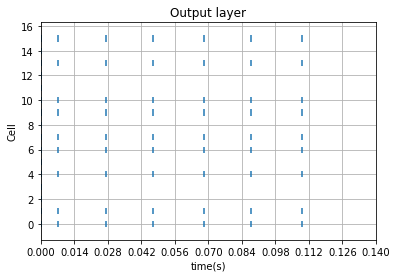

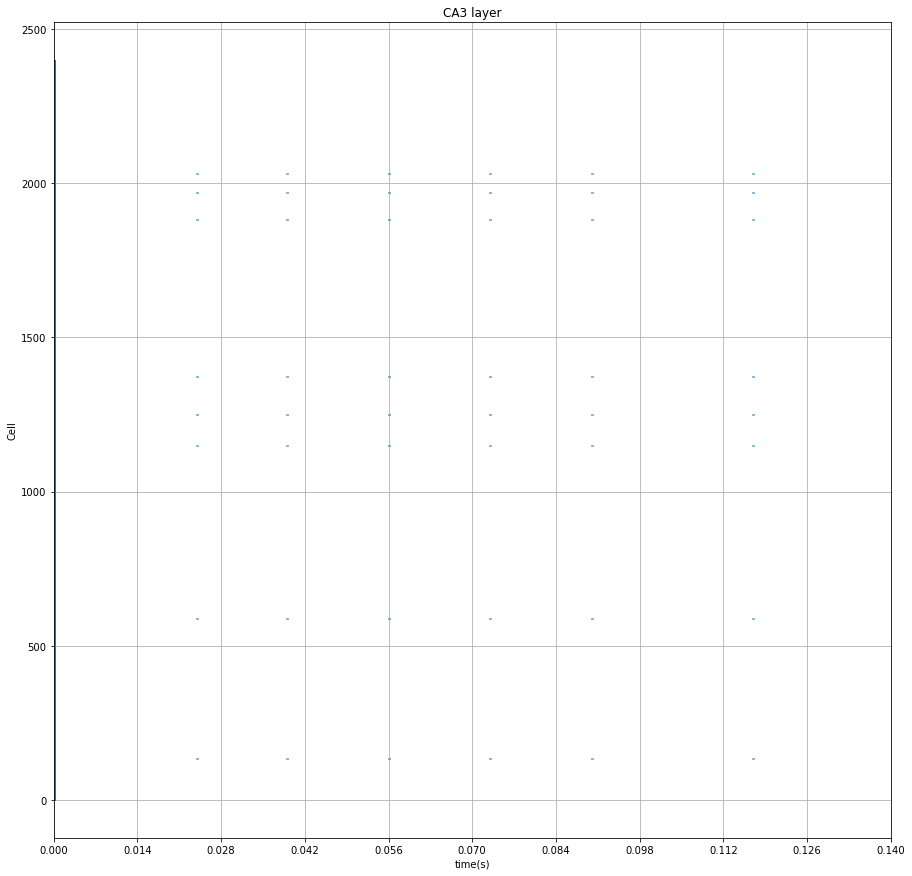

0 :  [1281, 134, 658, 425, 1969, 1991, 2380, 588, 1882, 1374, 2266, 1251, 2031, 1150]
1 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
2 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
3 :  [1857, 1605, 971, 1614, 918, 993, 1635, 292, 2221, 2108, 1727, 1270, 703]
4 :  [2308, 131, 406, 1458, 1212, 2249, 1494, 1370, 1755, 2265, 1895, 2030]


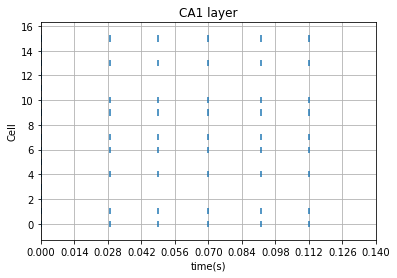

Ret1 :  {1281, 1374, 1251, 134, 1991, 425, 2266, 588, 2380, 2031, 1969, 658, 1882, 1150}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------


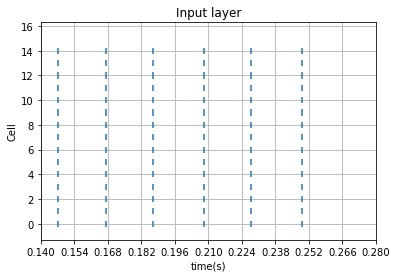

0 :  [ 0  1  4  6  7  9 10 13 15]
1 :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
2 :  [ 0  1  2  3  4  8  9 10 13 14]
3 :  [ 0  1  5 10 12 14 15]
4 :  [ 0  1  3  5 10 12 13 15]


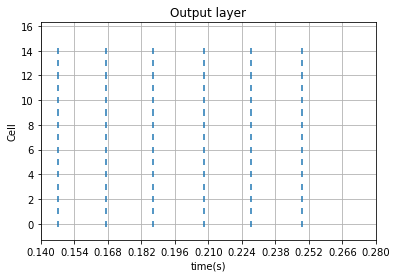

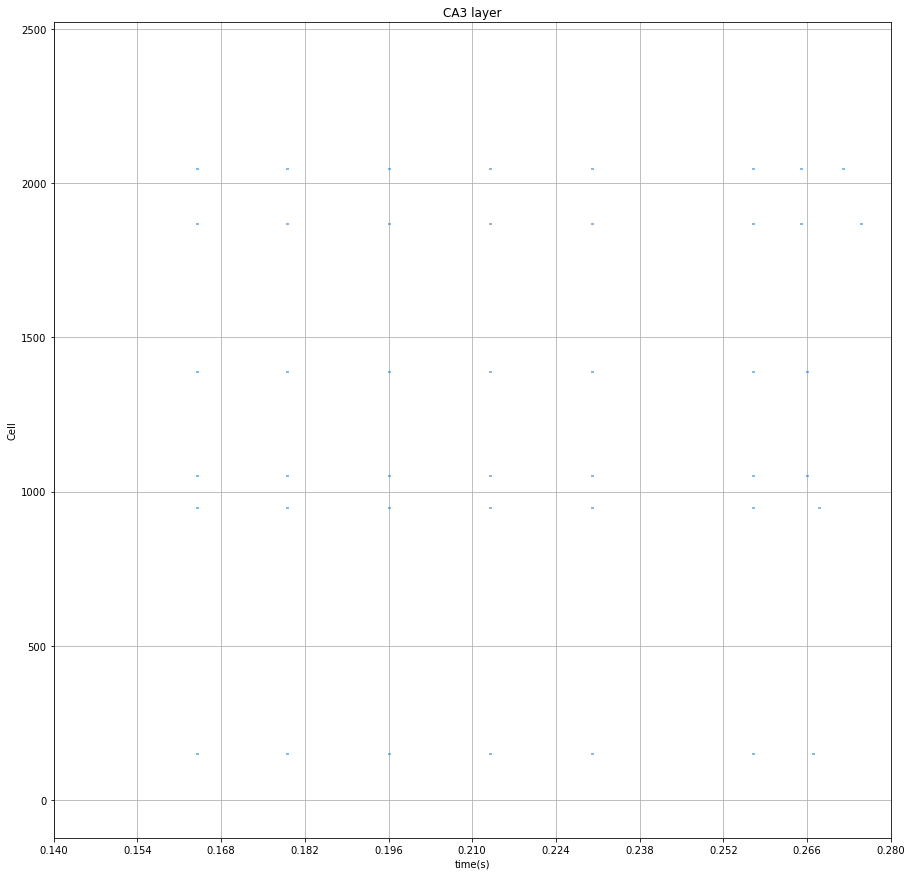

0 :  [1281, 134, 658, 425, 1969, 1991, 2380, 588, 1882, 1374, 2266, 1251, 2031, 1150]
1 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
2 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
3 :  [1857, 1605, 971, 1614, 918, 993, 1635, 292, 2221, 2108, 1727, 1270, 703]
4 :  [2308, 131, 406, 1458, 1212, 2249, 1494, 1370, 1755, 2265, 1895, 2030]


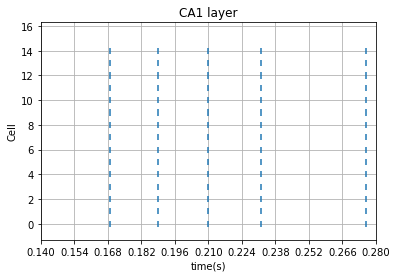

Ret1 :  {2048, 1988, 1637, 299, 2347, 1389, 1870, 2001, 2039, 948, 151, 1115, 1053}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 400 [1251]
0 402 [2266]
0 406 [1969]
0 413 [2266]


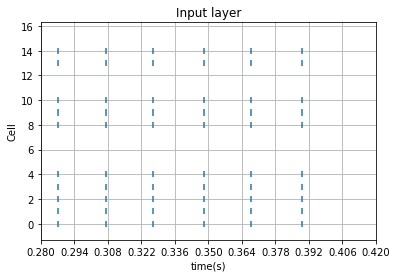

0 :  [ 0  1  4  6  7  9 10 13 15]
1 :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
2 :  [ 0  1  2  3  4  8  9 10 13 14]
3 :  [ 0  1  5 10 12 14 15]
4 :  [ 0  1  3  5 10 12 13 15]


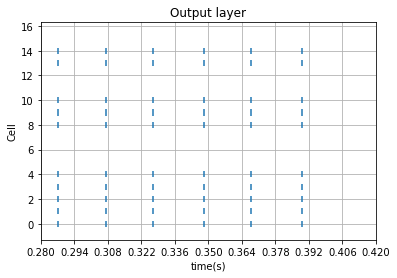

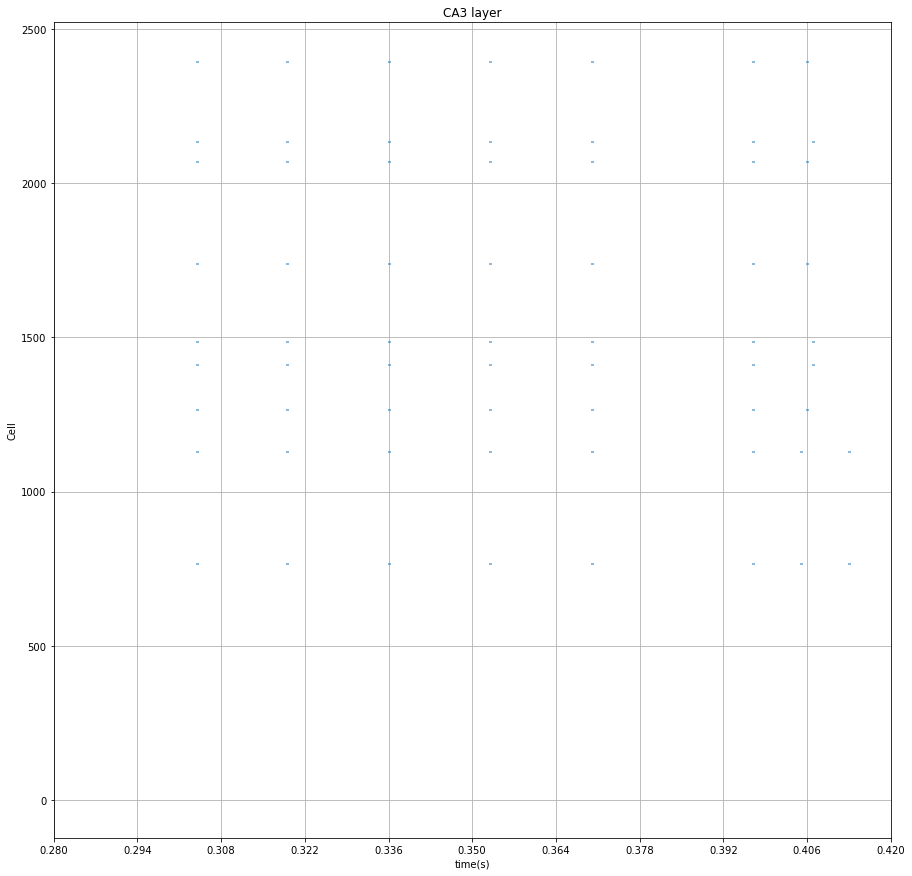

0 :  [1281, 134, 658, 425, 1969, 1991, 2380, 588, 1882, 1374, 2266, 1251, 2031, 1150]
1 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
2 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
3 :  [1857, 1605, 971, 1614, 918, 993, 1635, 292, 2221, 2108, 1727, 1270, 703]
4 :  [2308, 131, 406, 1458, 1212, 2249, 1494, 1370, 1755, 2265, 1895, 2030]


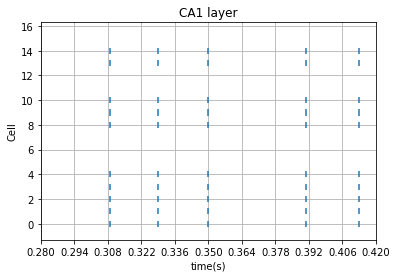

Ret1 :  {1412, 1130, 2026, 1740, 1487, 1265, 1266, 915, 2071, 2136, 2395, 2140, 1598, 767}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 547 [1991]


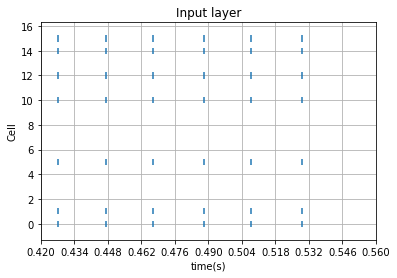

0 :  [ 0  1  4  6  7  9 10 13 15]
1 :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
2 :  [ 0  1  2  3  4  8  9 10 13 14]
3 :  [ 0  1  5 10 12 14 15]
4 :  [ 0  1  3  5 10 12 13 15]


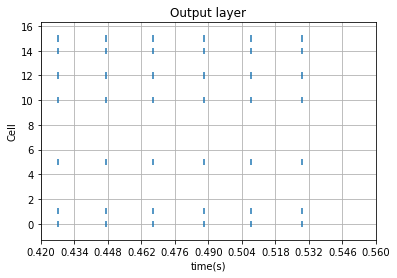

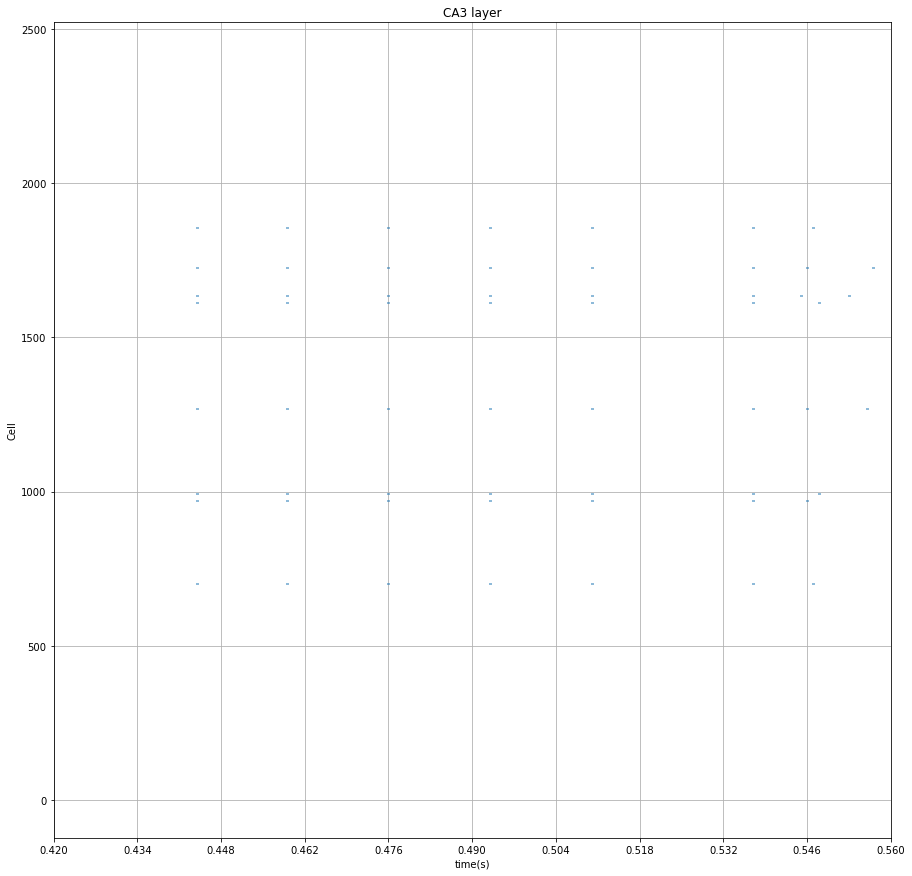

0 :  [1281, 134, 658, 425, 1969, 1991, 2380, 588, 1882, 1374, 2266, 1251, 2031, 1150]
1 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
2 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
3 :  [1857, 1605, 971, 1614, 918, 993, 1635, 292, 2221, 2108, 1727, 1270, 703]
4 :  [2308, 131, 406, 1458, 1212, 2249, 1494, 1370, 1755, 2265, 1895, 2030]


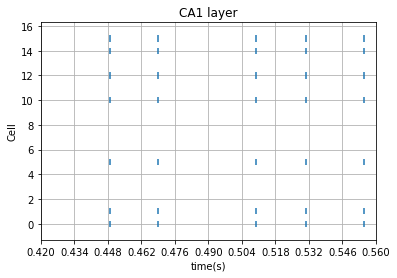

Ret1 :  {993, 1857, 1635, 292, 1605, 971, 2221, 1614, 1727, 918, 1270, 2108, 703}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 680 [1882]
0 698 [2380]


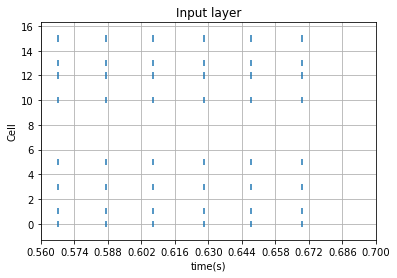

0 :  [ 0  1  4  6  7  9 10 13 15]
1 :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
2 :  [ 0  1  2  3  4  8  9 10 13 14]
3 :  [ 0  1  5 10 12 14 15]
4 :  [ 0  1  3  5 10 12 13 15]


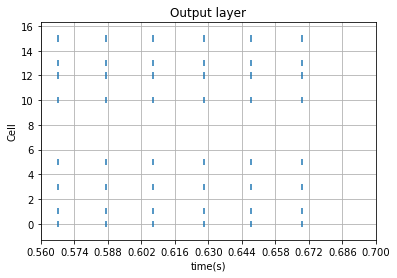

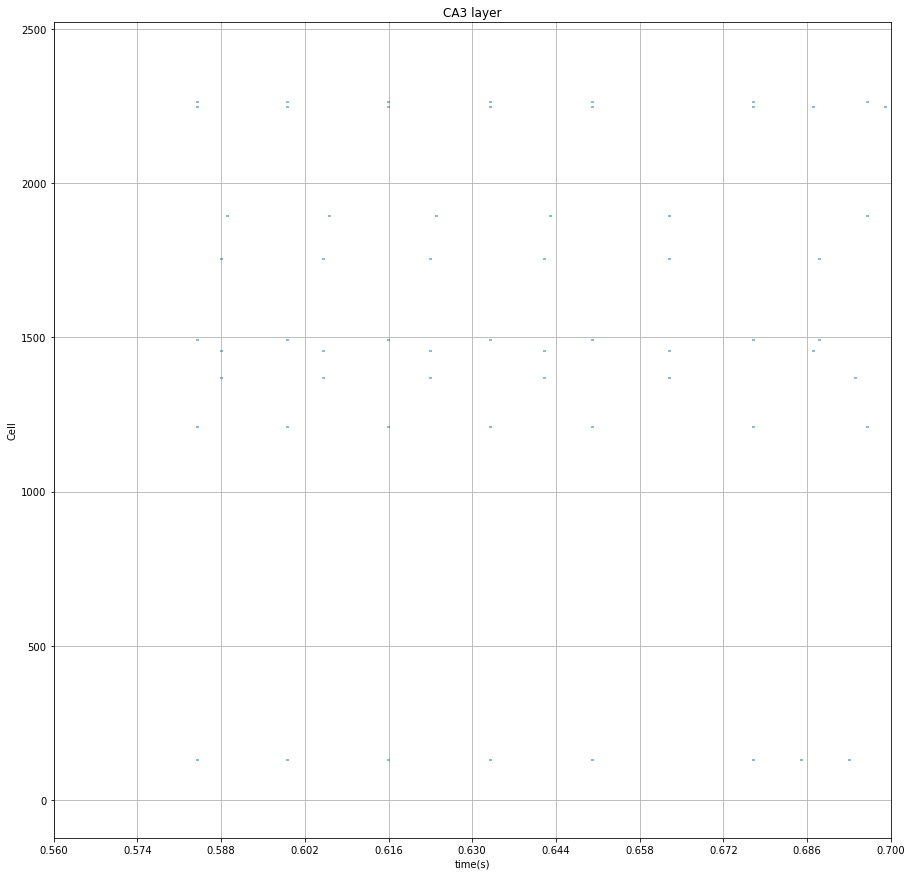

0 :  [1281, 134, 658, 425, 1969, 1991, 2380, 588, 1882, 1374, 2266, 1251, 2031, 1150]
1 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
2 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
3 :  [1857, 1605, 971, 1614, 918, 993, 1635, 292, 2221, 2108, 1727, 1270, 703]
4 :  [2308, 131, 406, 1458, 1212, 2249, 1494, 1370, 1755, 2265, 1895, 2030]


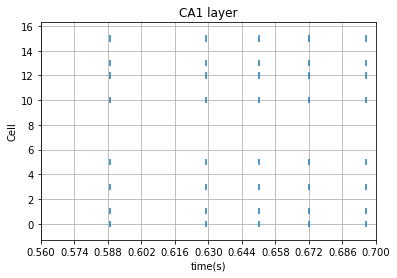

Ret1 :  {131, 2308, 1895, 2249, 2030, 1458, 406, 1494, 2265, 1370, 1755, 1212}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
Success :  0
Fail :  5
If_fail :  0
Output bias (mean, std) :  0.0 0.0
0 125 [1930]


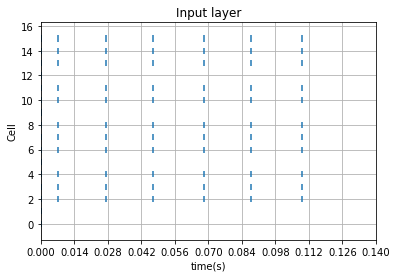

0 :  [ 2  3  4  6  7  8 10 11 13 14 15]
1 :  [ 2  3  4  7  9 10 14]
2 :  [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15]
3 :  [ 2  3  4  5  7  8 10 11 12 13]
4 :  [ 0  1  3  4  5  6  7 11 14 15]


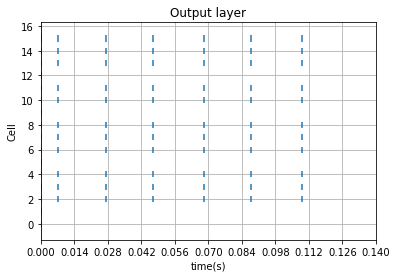

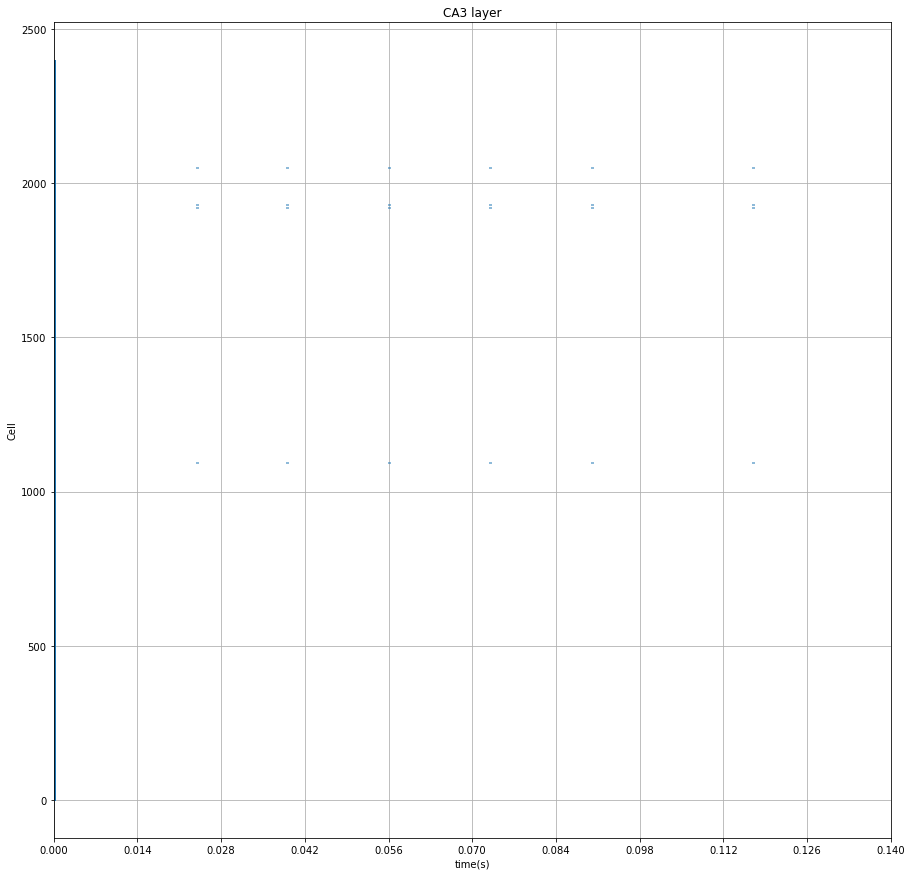

0 :  [1921, 2051, 1930, 402, 1080, 1094, 344, 237, 885]
1 :  [1857, 837, 1542, 1362, 1371, 1770, 557, 1772, 2355, 828, 1150]
2 :  [1038, 532, 1954, 2096, 61, 2114, 1634, 614, 876, 1391]
3 :  [257, 131, 645, 140, 2332, 436, 571, 827, 2249, 1494, 501]
4 :  [11, 144, 2319, 2256, 23, 1624, 1880, 1440, 620]


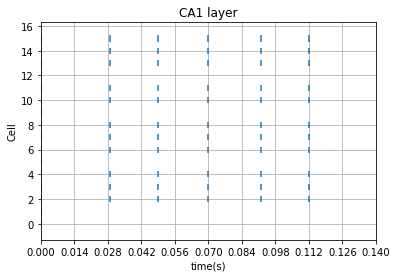

Ret1 :  {1921, 2051, 1094, 1930, 237, 402, 885, 344, 1080}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 275 [1921]
0 278 [237]


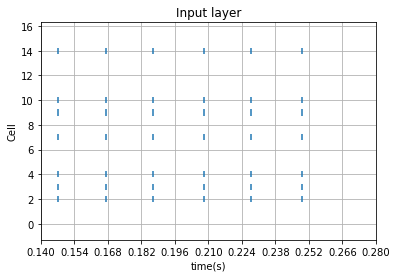

0 :  [ 2  3  4  6  7  8 10 11 13 14 15]
1 :  [ 2  3  4  7  9 10 14]
2 :  [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15]
3 :  [ 2  3  4  5  7  8 10 11 12 13]
4 :  [ 0  1  3  4  5  6  7 11 14 15]


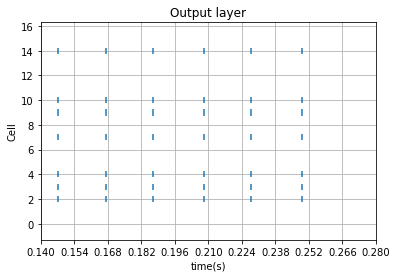

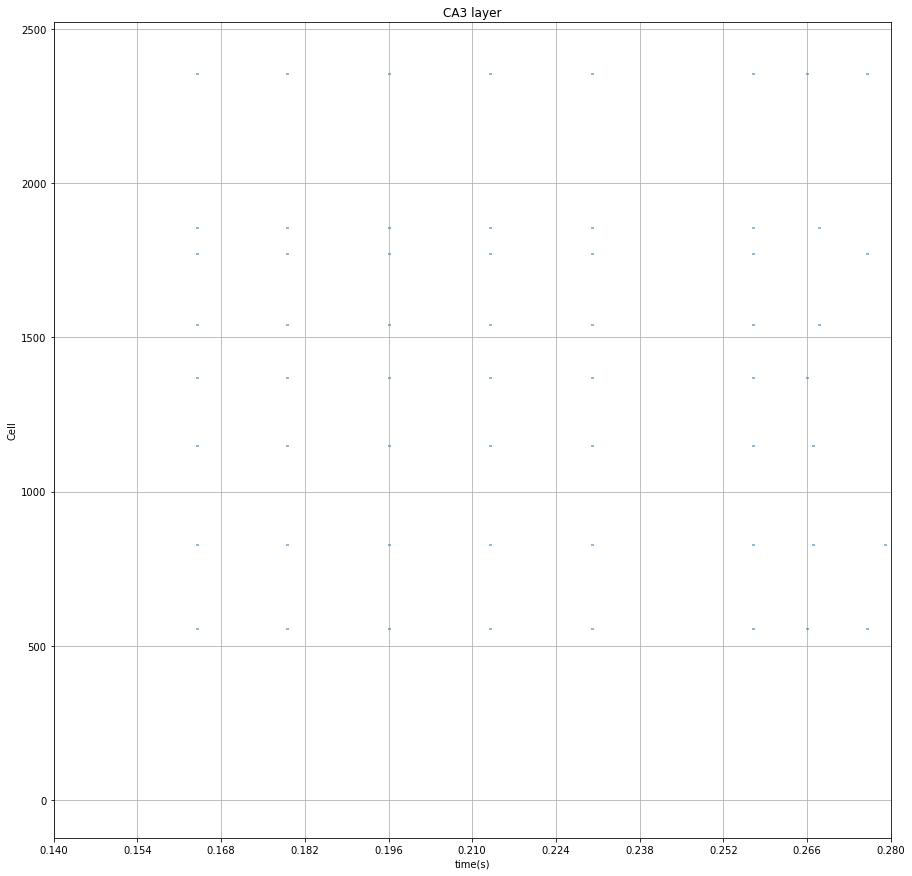

0 :  [1921, 2051, 1930, 402, 1080, 1094, 344, 237, 885]
1 :  [1857, 837, 1542, 1362, 1371, 1770, 557, 1772, 2355, 828, 1150]
2 :  [1038, 532, 1954, 2096, 61, 2114, 1634, 614, 876, 1391]
3 :  [257, 131, 645, 140, 2332, 436, 571, 827, 2249, 1494, 501]
4 :  [11, 144, 2319, 2256, 23, 1624, 1880, 1440, 620]


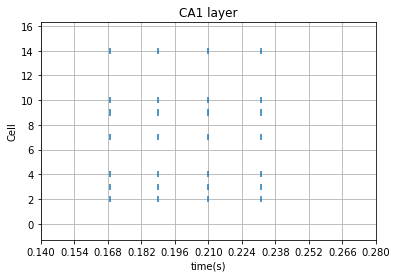

Ret1 :  {1857, 837, 1542, 1770, 1772, 557, 1362, 2355, 1109, 1371, 828, 1150}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------


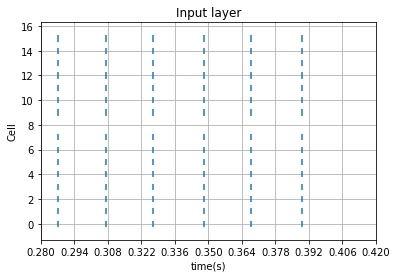

0 :  [ 2  3  4  6  7  8 10 11 13 14 15]
1 :  [ 2  3  4  7  9 10 14]
2 :  [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15]
3 :  [ 2  3  4  5  7  8 10 11 12 13]
4 :  [ 0  1  3  4  5  6  7 11 14 15]


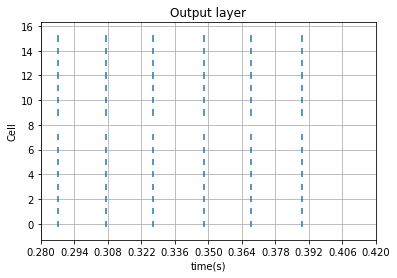

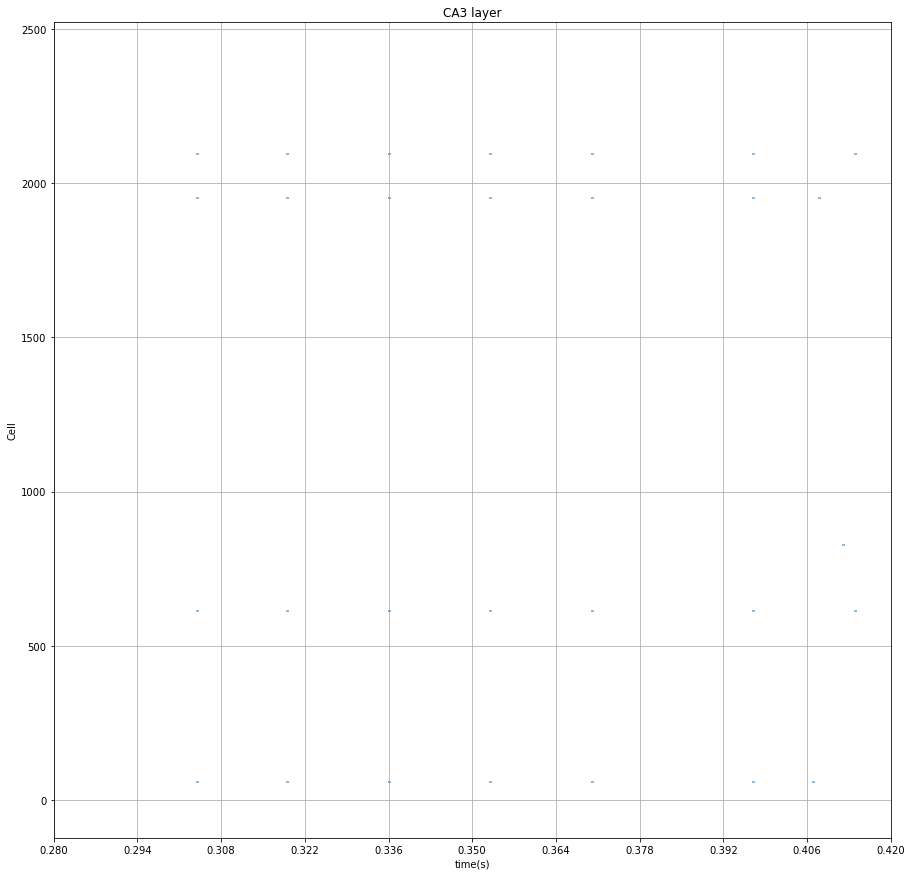

0 :  [1921, 2051, 1930, 402, 1080, 1094, 344, 237, 885]
1 :  [1857, 837, 1542, 1362, 1371, 1770, 557, 1772, 2355, 828, 1150]
2 :  [1038, 532, 1954, 2096, 61, 2114, 1634, 614, 876, 1391]
3 :  [257, 131, 645, 140, 2332, 436, 571, 827, 2249, 1494, 501]
4 :  [11, 144, 2319, 2256, 23, 1624, 1880, 1440, 620]


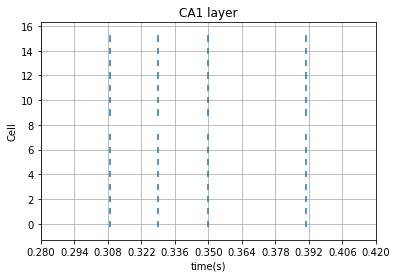

Ret1 :  {1634, 1954, 2114, 614, 876, 1038, 1391, 2096, 532, 828, 61}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 558 [237]


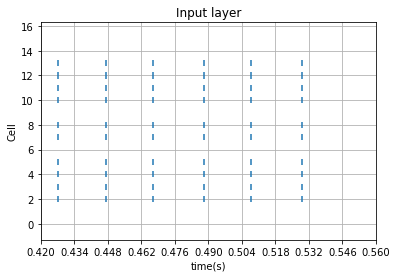

0 :  [ 2  3  4  6  7  8 10 11 13 14 15]
1 :  [ 2  3  4  7  9 10 14]
2 :  [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15]
3 :  [ 2  3  4  5  7  8 10 11 12 13]
4 :  [ 0  1  3  4  5  6  7 11 14 15]


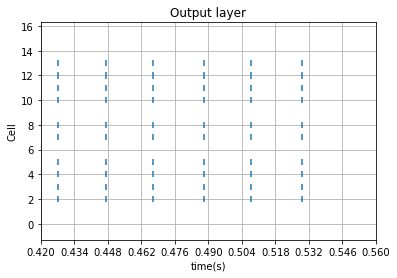

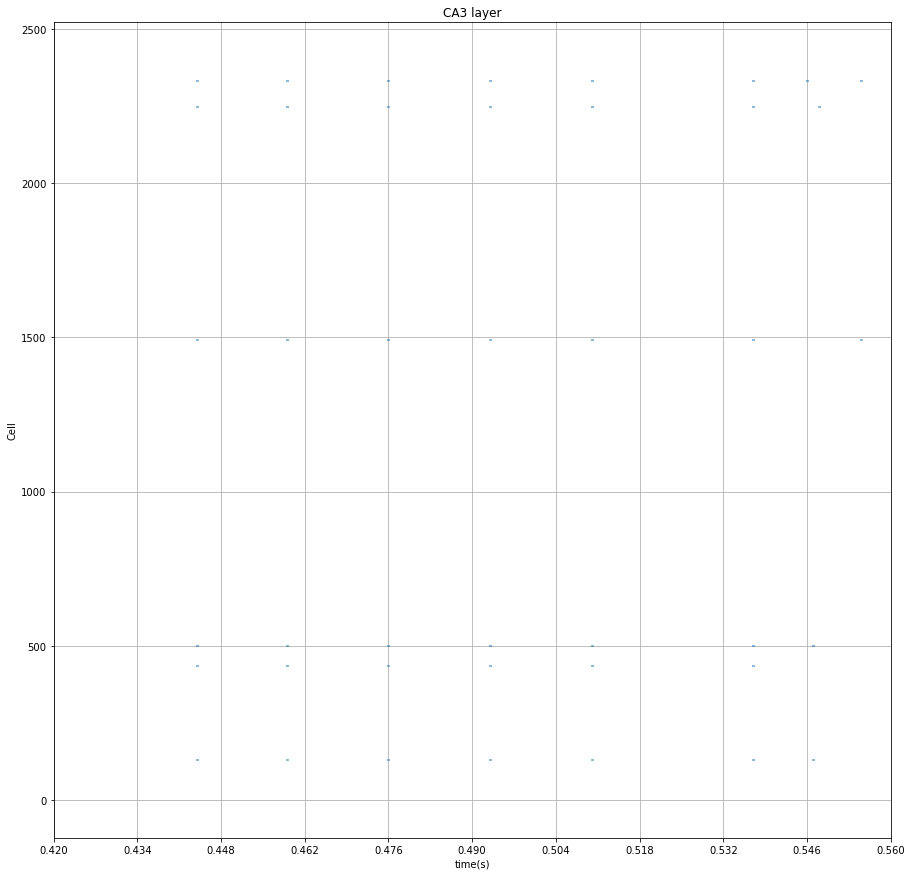

0 :  [1921, 2051, 1930, 402, 1080, 1094, 344, 237, 885]
1 :  [1857, 837, 1542, 1362, 1371, 1770, 557, 1772, 2355, 828, 1150]
2 :  [1038, 532, 1954, 2096, 61, 2114, 1634, 614, 876, 1391]
3 :  [257, 131, 645, 140, 2332, 436, 571, 827, 2249, 1494, 501]
4 :  [11, 144, 2319, 2256, 23, 1624, 1880, 1440, 620]


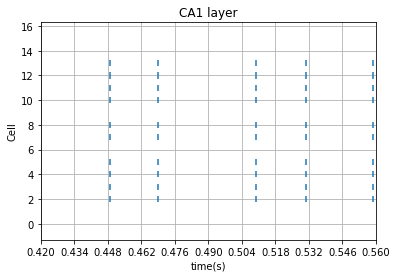

Ret1 :  {257, 827, 131, 645, 2249, 140, 436, 501, 1494, 571, 2332}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------


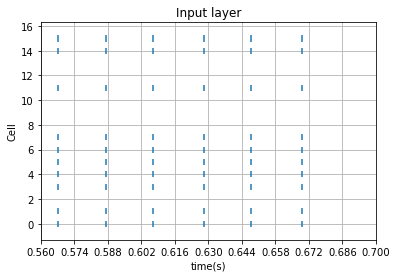

0 :  [ 2  3  4  6  7  8 10 11 13 14 15]
1 :  [ 2  3  4  7  9 10 14]
2 :  [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15]
3 :  [ 2  3  4  5  7  8 10 11 12 13]
4 :  [ 0  1  3  4  5  6  7 11 14 15]


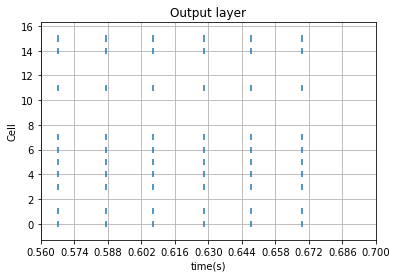

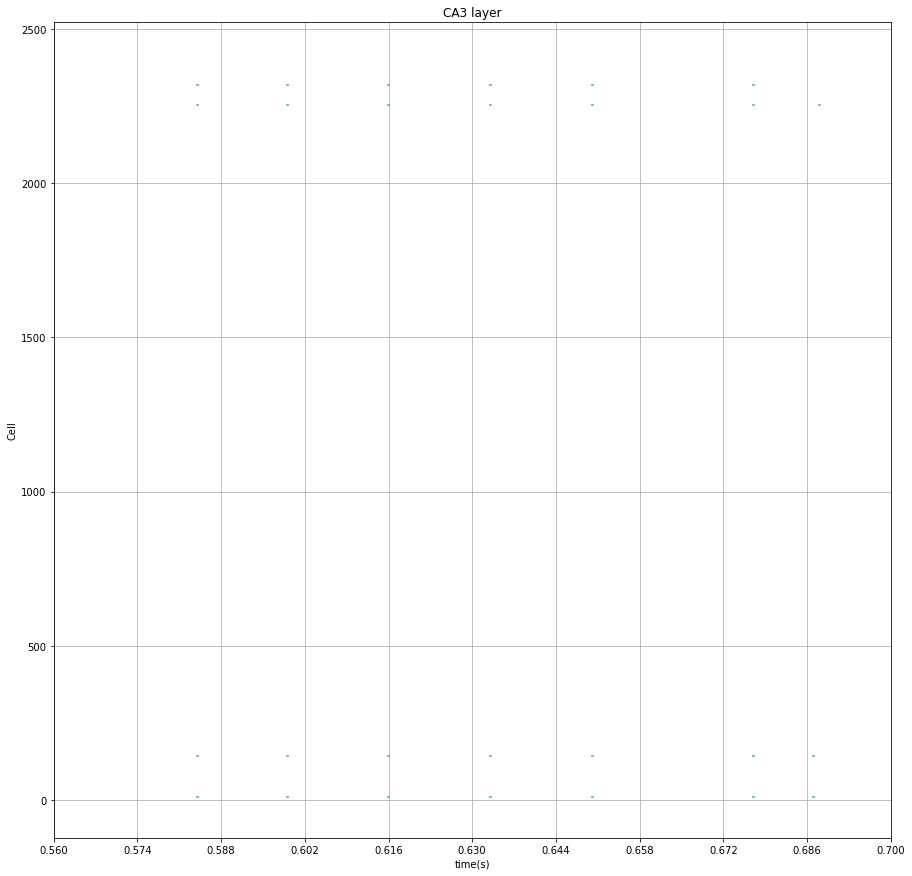

0 :  [1921, 2051, 1930, 402, 1080, 1094, 344, 237, 885]
1 :  [1857, 837, 1542, 1362, 1371, 1770, 557, 1772, 2355, 828, 1150]
2 :  [1038, 532, 1954, 2096, 61, 2114, 1634, 614, 876, 1391]
3 :  [257, 131, 645, 140, 2332, 436, 571, 827, 2249, 1494, 501]
4 :  [11, 144, 2319, 2256, 23, 1624, 1880, 1440, 620]


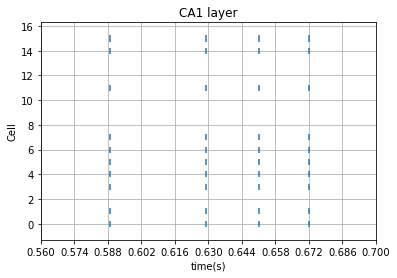

Ret1 :  {1440, 11, 620, 2319, 144, 2256, 1880, 23, 1624}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
Success :  0
Fail :  5
If_fail :  0
Output bias (mean, std) :  0.0 0.0
0 132 [1522]


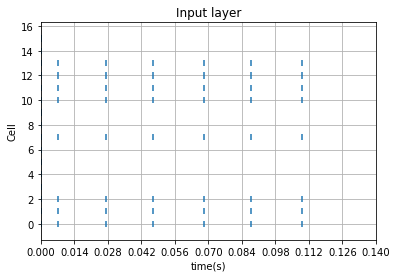

0 :  [ 0  1  2  7 10 11 12 13]
1 :  [ 0  1  3  5 10 12 13 15]
2 :  [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15]
3 :  [ 0  1  2  4  6  7  8  9 10 11 12 13 14]
4 :  [ 0  3  7  8  9 10 12 13]


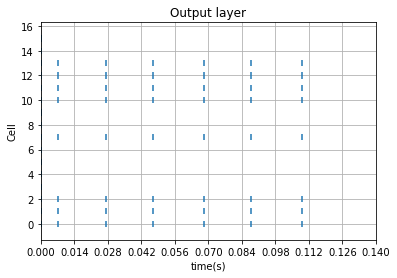

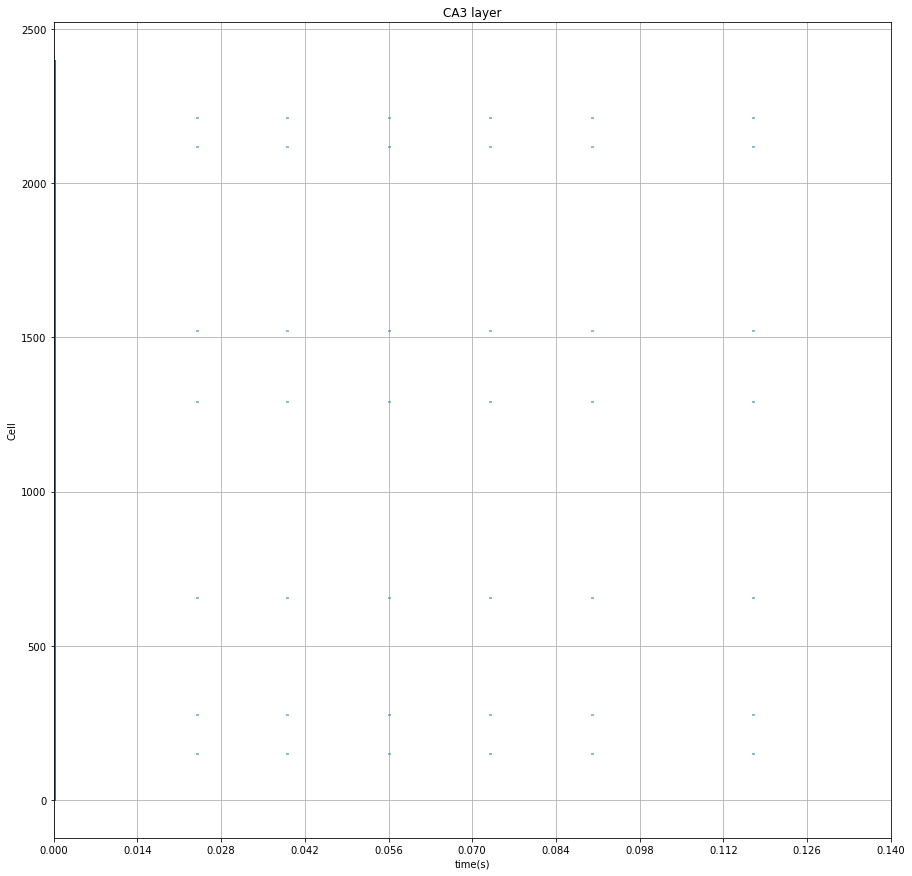

0 :  [2119, 1292, 656, 278, 151, 214, 2331, 2212, 1522, 1650]
1 :  [2308, 131, 406, 1458, 1212, 2249, 1494, 1370, 1755, 2265, 1895, 2030]
2 :  [1038, 532, 1954, 2096, 61, 2114, 1634, 614, 876, 1391]
3 :  [323, 658, 1879, 609, 483, 1195, 172, 111, 1007, 561, 1139, 569]
4 :  [2336, 806, 49, 1864, 1995, 2380, 1613, 2133, 2391, 753, 757, 1653]


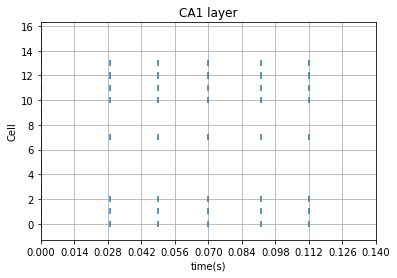

Ret1 :  {2212, 2119, 1292, 656, 1522, 1650, 278, 214, 151, 2331}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 266 [278]


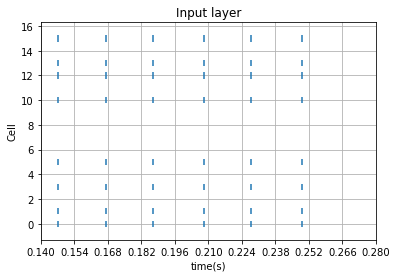

0 :  [ 0  1  2  7 10 11 12 13]
1 :  [ 0  1  3  5 10 12 13 15]
2 :  [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15]
3 :  [ 0  1  2  4  6  7  8  9 10 11 12 13 14]
4 :  [ 0  3  7  8  9 10 12 13]


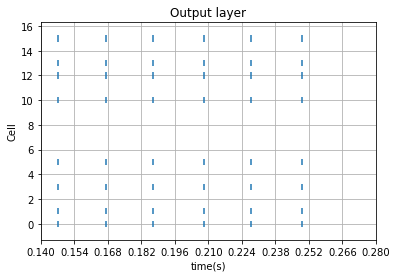

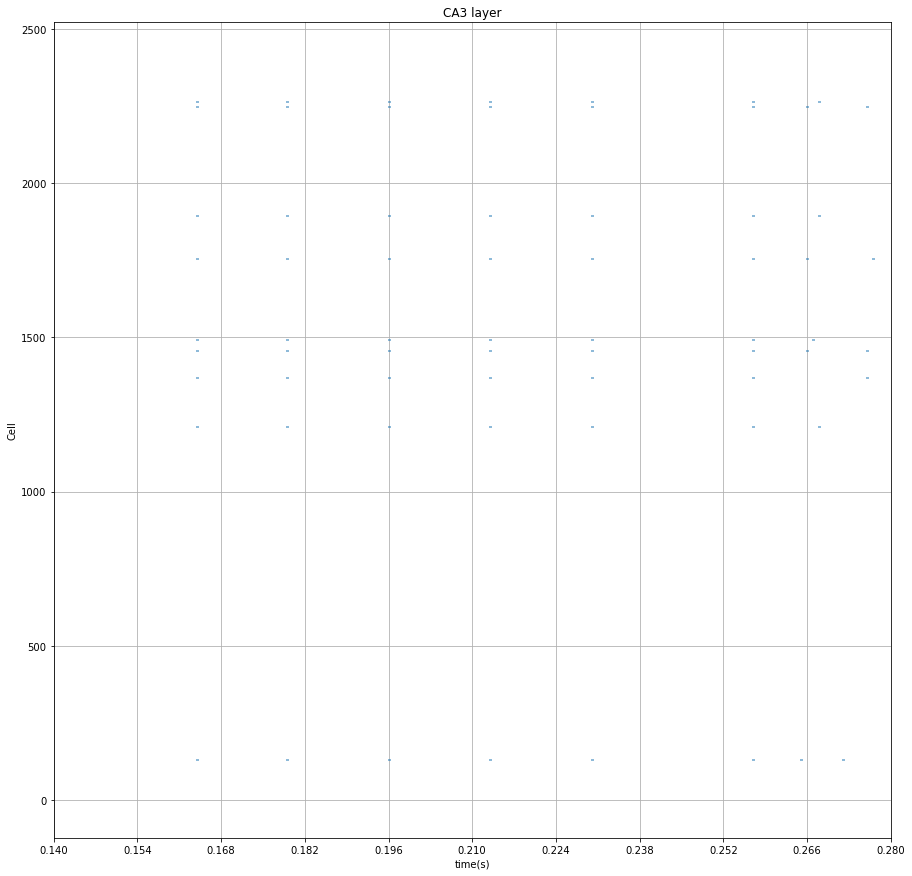

0 :  [2119, 1292, 656, 278, 151, 214, 2331, 2212, 1522, 1650]
1 :  [2308, 131, 406, 1458, 1212, 2249, 1494, 1370, 1755, 2265, 1895, 2030]
2 :  [1038, 532, 1954, 2096, 61, 2114, 1634, 614, 876, 1391]
3 :  [323, 658, 1879, 609, 483, 1195, 172, 111, 1007, 561, 1139, 569]
4 :  [2336, 806, 49, 1864, 1995, 2380, 1613, 2133, 2391, 753, 757, 1653]


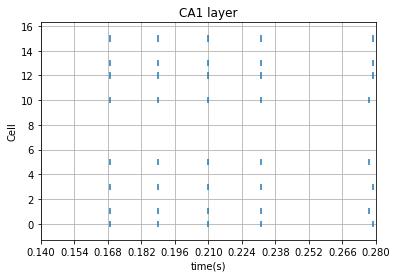

Ret1 :  {131, 2308, 1895, 2249, 2030, 1458, 406, 1494, 2265, 1370, 1755, 1212}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------


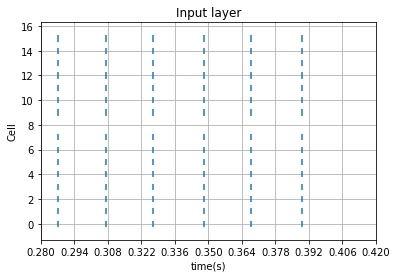

0 :  [ 0  1  2  7 10 11 12 13]
1 :  [ 0  1  3  5 10 12 13 15]
2 :  [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15]
3 :  [ 0  1  2  4  6  7  8  9 10 11 12 13 14]
4 :  [ 0  3  7  8  9 10 12 13]


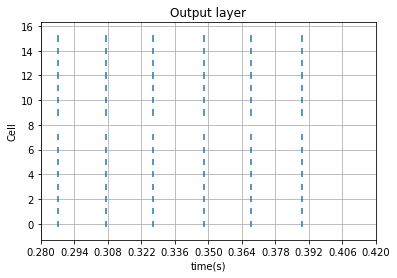

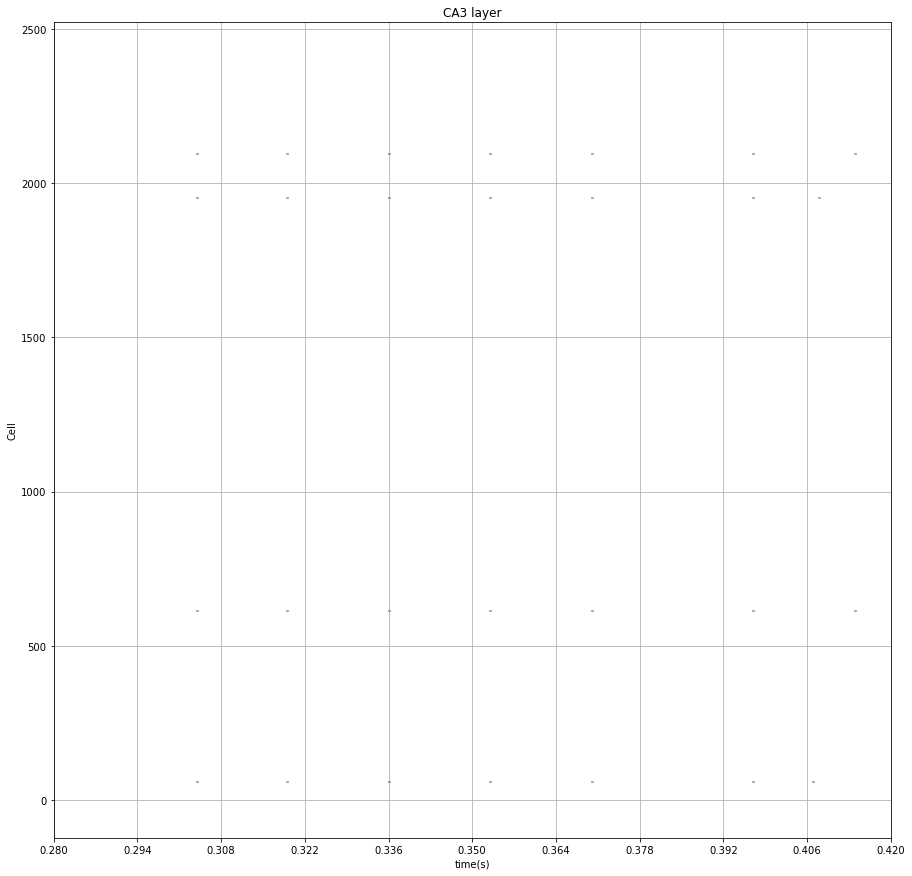

0 :  [2119, 1292, 656, 278, 151, 214, 2331, 2212, 1522, 1650]
1 :  [2308, 131, 406, 1458, 1212, 2249, 1494, 1370, 1755, 2265, 1895, 2030]
2 :  [1038, 532, 1954, 2096, 61, 2114, 1634, 614, 876, 1391]
3 :  [323, 658, 1879, 609, 483, 1195, 172, 111, 1007, 561, 1139, 569]
4 :  [2336, 806, 49, 1864, 1995, 2380, 1613, 2133, 2391, 753, 757, 1653]


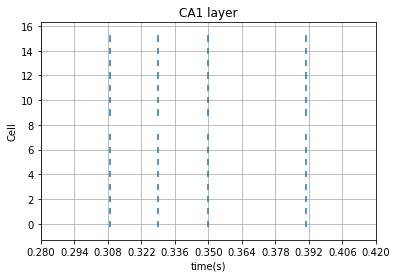

Ret1 :  {1634, 1954, 2114, 614, 876, 1038, 1391, 2096, 532, 61}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------


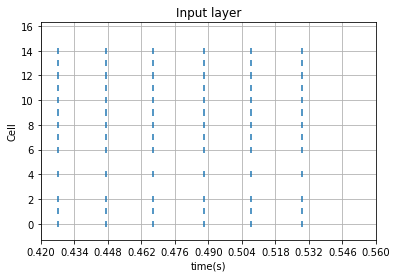

0 :  [ 0  1  2  7 10 11 12 13]
1 :  [ 0  1  3  5 10 12 13 15]
2 :  [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15]
3 :  [ 0  1  2  4  6  7  8  9 10 11 12 13 14]
4 :  [ 0  3  7  8  9 10 12 13]


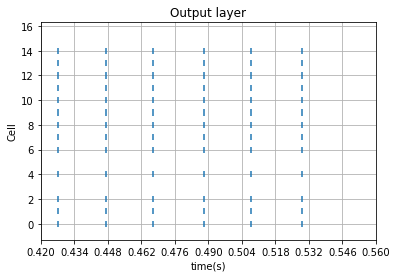

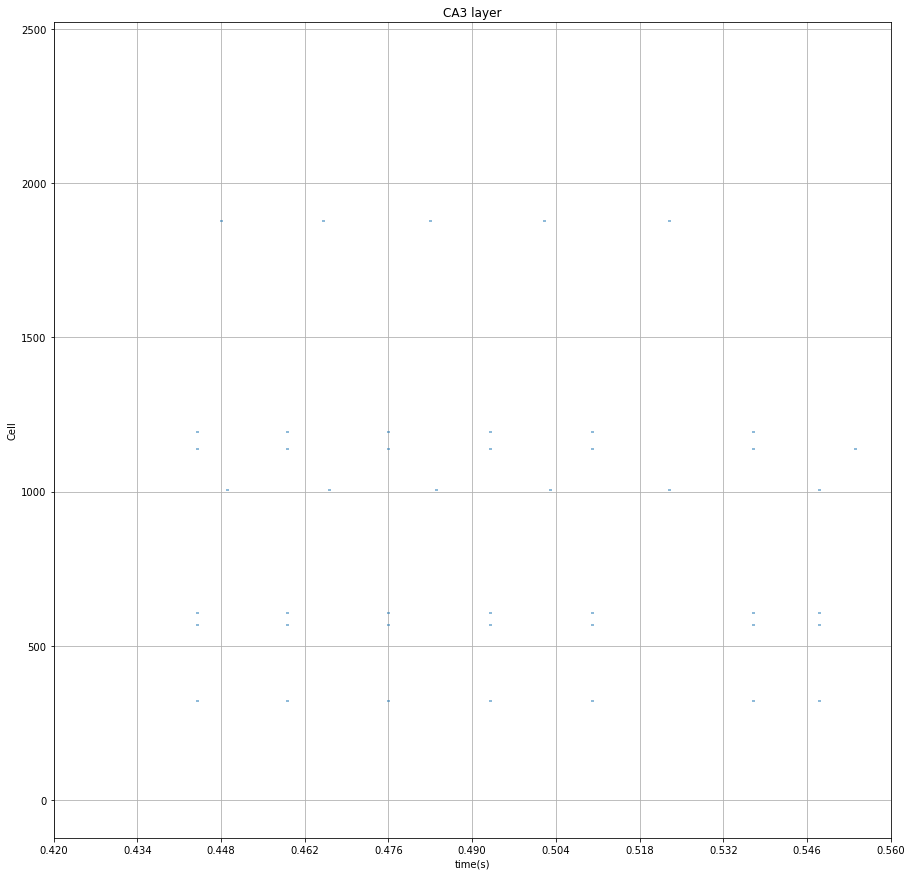

0 :  [2119, 1292, 656, 278, 151, 214, 2331, 2212, 1522, 1650]
1 :  [2308, 131, 406, 1458, 1212, 2249, 1494, 1370, 1755, 2265, 1895, 2030]
2 :  [1038, 532, 1954, 2096, 61, 2114, 1634, 614, 876, 1391]
3 :  [323, 658, 1879, 609, 483, 1195, 172, 111, 1007, 561, 1139, 569]
4 :  [2336, 806, 49, 1864, 1995, 2380, 1613, 2133, 2391, 753, 757, 1653]


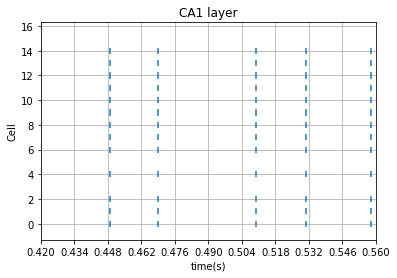

Ret1 :  {609, 323, 483, 1195, 172, 111, 1007, 561, 658, 1139, 1879, 569}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 683 [1292]
0 695 [1522]


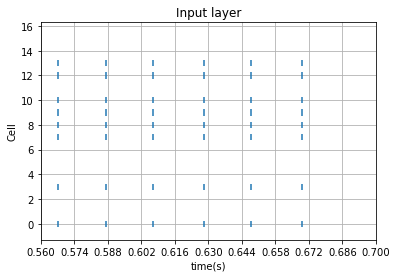

0 :  [ 0  1  2  7 10 11 12 13]
1 :  [ 0  1  3  5 10 12 13 15]
2 :  [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15]
3 :  [ 0  1  2  4  6  7  8  9 10 11 12 13 14]
4 :  [ 0  3  7  8  9 10 12 13]


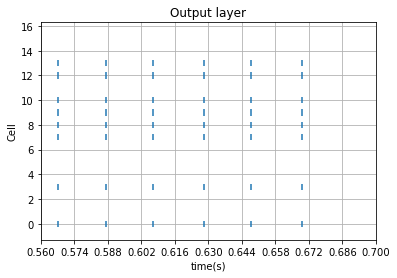

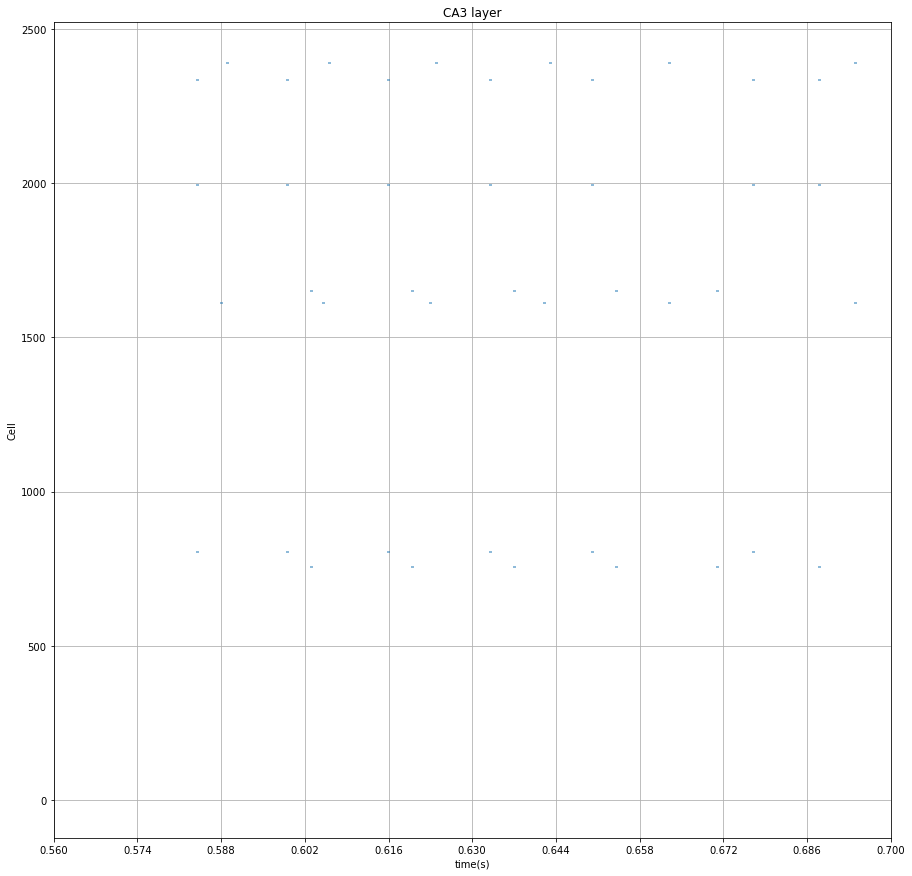

0 :  [2119, 1292, 656, 278, 151, 214, 2331, 2212, 1522, 1650]
1 :  [2308, 131, 406, 1458, 1212, 2249, 1494, 1370, 1755, 2265, 1895, 2030]
2 :  [1038, 532, 1954, 2096, 61, 2114, 1634, 614, 876, 1391]
3 :  [323, 658, 1879, 609, 483, 1195, 172, 111, 1007, 561, 1139, 569]
4 :  [2336, 806, 49, 1864, 1995, 2380, 1613, 2133, 2391, 753, 757, 1653]


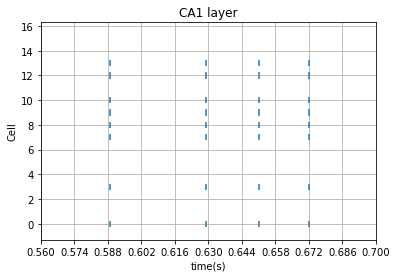

Ret1 :  {2336, 806, 1864, 1995, 2380, 1613, 49, 753, 757, 1653, 2133, 2391}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
Success :  0
Fail :  5
If_fail :  0
Output bias (mean, std) :  0.0 0.0
0 132 [1740]


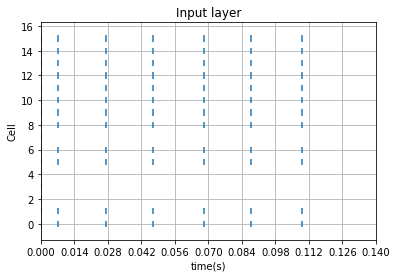

0 :  [ 0  1  5  6  8  9 10 11 12 13 14 15]
1 :  [ 2  6  9 11 12 13]
2 :  [ 2  3  4  5  6  7 11 12 13 14]
3 :  [ 2  6 10 12 13]
4 :  [ 0  1  2  4  6  7  8  9 10 11 12 13 14]
5 :  [ 0  1  2  3  4  5  6  7 10 12 13 14 15]


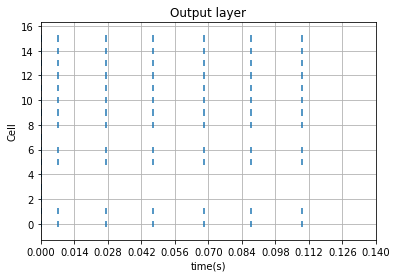

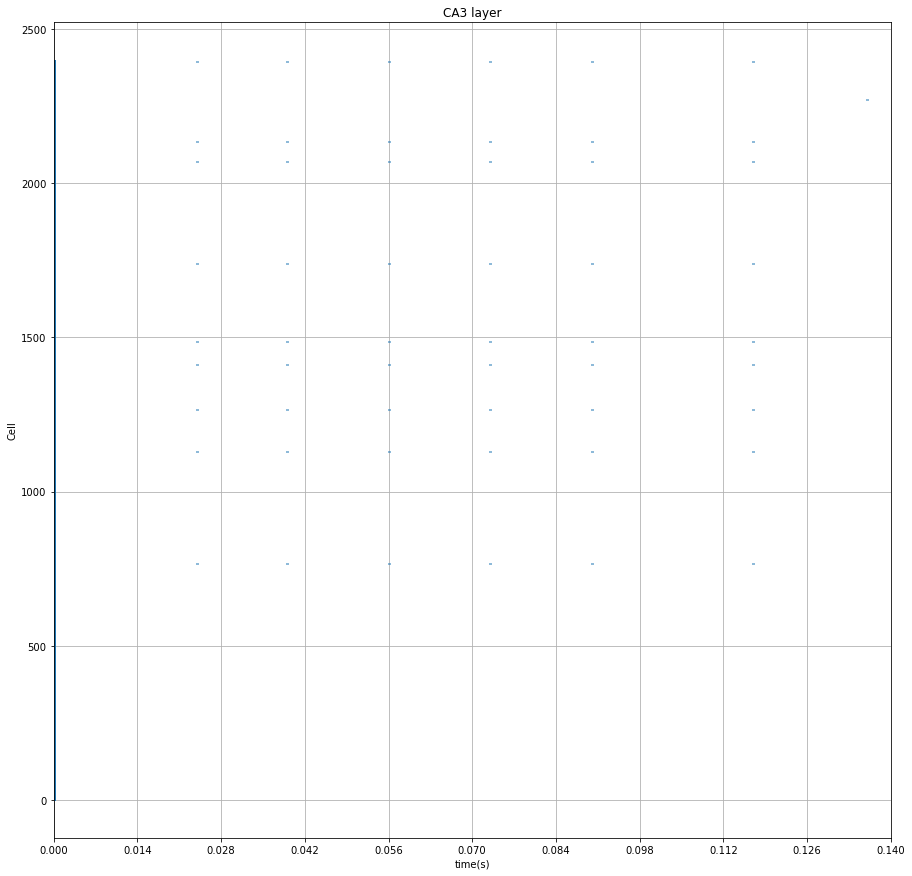

0 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
1 :  [509, 1991, 2376, 585, 1547, 1484, 2380, 1244, 1374, 1251, 357, 1192, 686]
2 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
3 :  [1681, 1560, 2203, 936, 1854, 577, 2264, 730, 2024, 1004, 1396, 1788, 1534]
4 :  [323, 658, 1879, 609, 483, 1195, 172, 111, 1007, 561, 1139, 569]
5 :  [833, 2114, 1103, 532, 1941, 1757, 798, 1630, 549, 1580, 369, 1653]


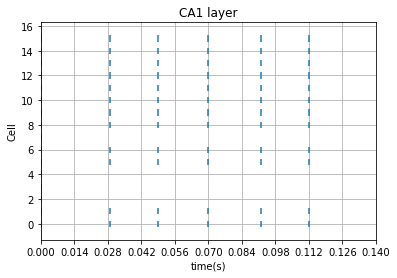

Ret1 :  {2271, 1412, 1130, 2026, 1740, 1487, 1265, 1266, 915, 2071, 2136, 2395, 2140, 1598, 767}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 263 [2140]
0 269 [1598]


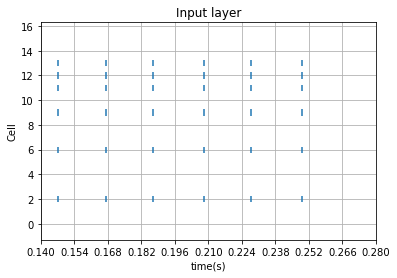

0 :  [ 0  1  5  6  8  9 10 11 12 13 14 15]
1 :  [ 2  6  9 11 12 13]
2 :  [ 2  3  4  5  6  7 11 12 13 14]
3 :  [ 2  6 10 12 13]
4 :  [ 0  1  2  4  6  7  8  9 10 11 12 13 14]
5 :  [ 0  1  2  3  4  5  6  7 10 12 13 14 15]


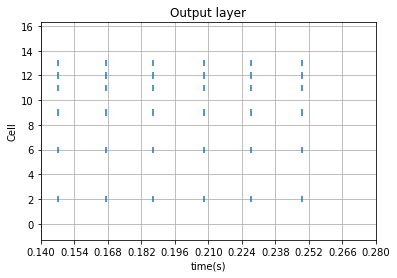

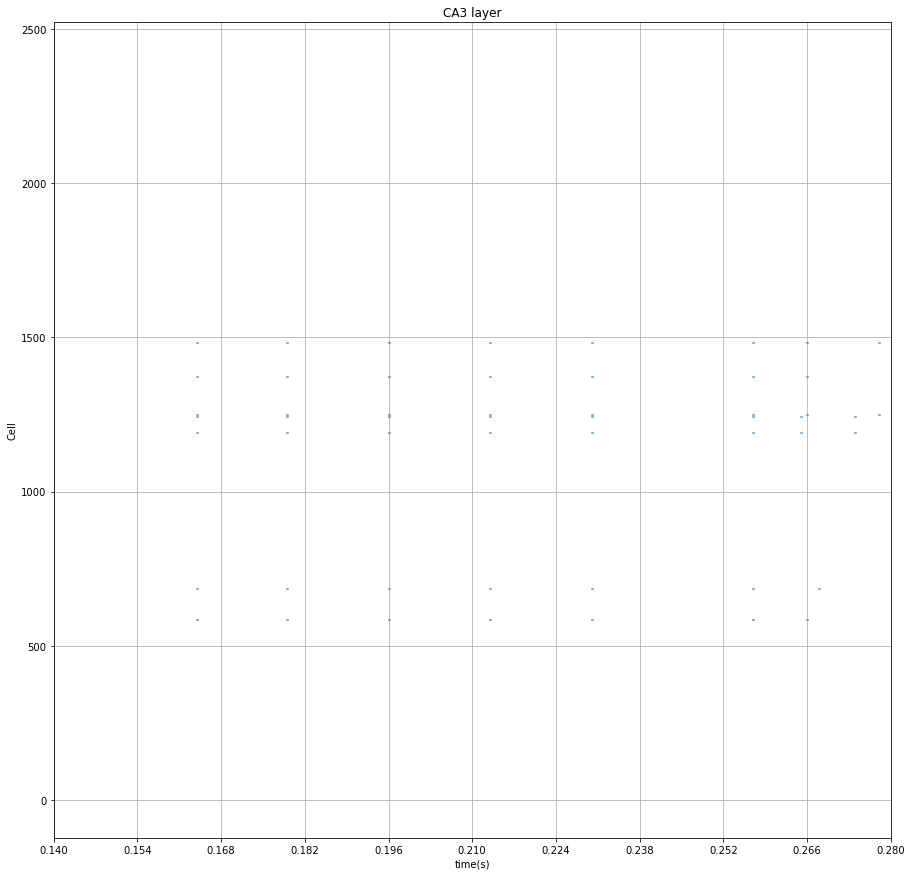

0 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
1 :  [509, 1991, 2376, 585, 1547, 1484, 2380, 1244, 1374, 1251, 357, 1192, 686]
2 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
3 :  [1681, 1560, 2203, 936, 1854, 577, 2264, 730, 2024, 1004, 1396, 1788, 1534]
4 :  [323, 658, 1879, 609, 483, 1195, 172, 111, 1007, 561, 1139, 569]
5 :  [833, 2114, 1103, 532, 1941, 1757, 798, 1630, 549, 1580, 369, 1653]


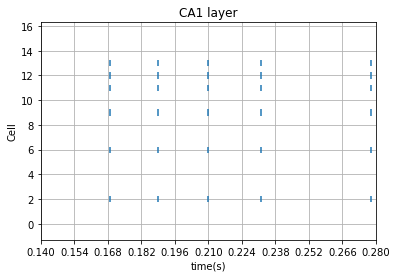

Ret1 :  {1251, 357, 1991, 1192, 585, 2376, 1547, 1484, 2380, 686, 1244, 509, 1374}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 401 [1130]
0 410 [1598]


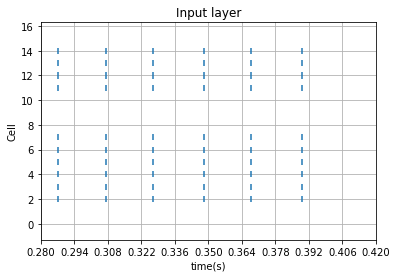

0 :  [ 0  1  5  6  8  9 10 11 12 13 14 15]
1 :  [ 2  6  9 11 12 13]
2 :  [ 2  3  4  5  6  7 11 12 13 14]
3 :  [ 2  6 10 12 13]
4 :  [ 0  1  2  4  6  7  8  9 10 11 12 13 14]
5 :  [ 0  1  2  3  4  5  6  7 10 12 13 14 15]


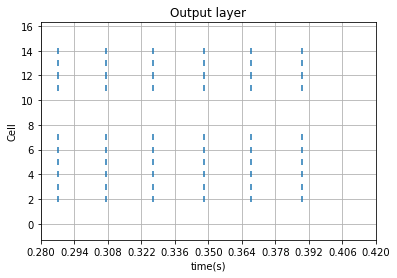

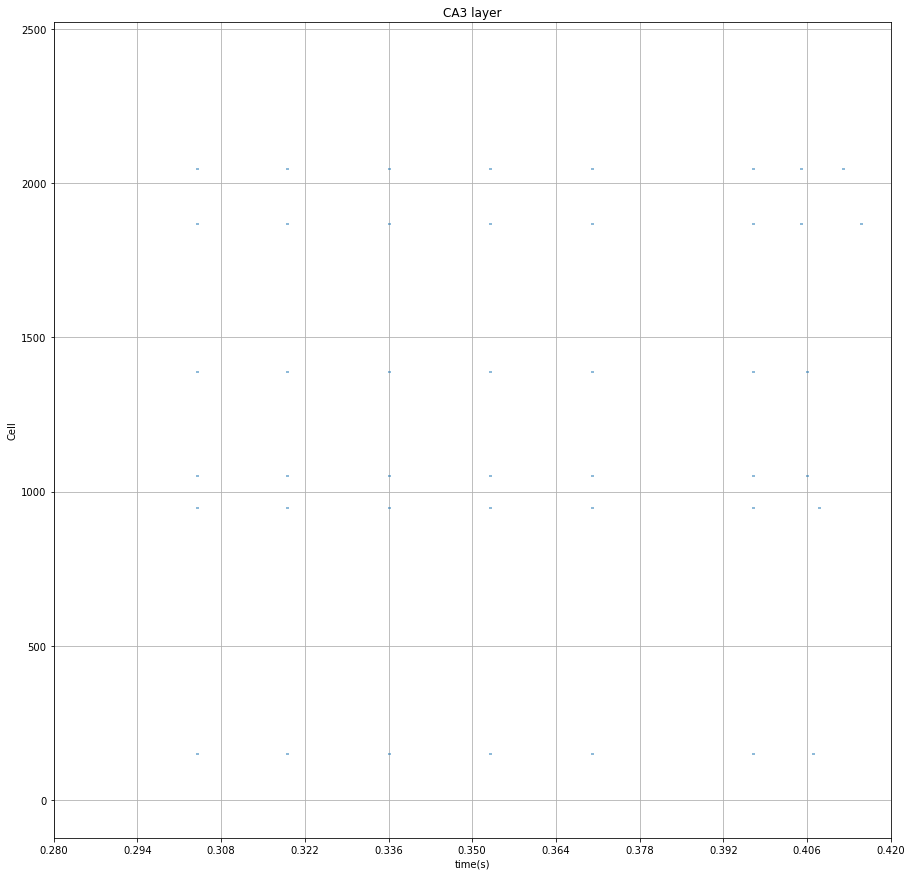

0 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
1 :  [509, 1991, 2376, 585, 1547, 1484, 2380, 1244, 1374, 1251, 357, 1192, 686]
2 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
3 :  [1681, 1560, 2203, 936, 1854, 577, 2264, 730, 2024, 1004, 1396, 1788, 1534]
4 :  [323, 658, 1879, 609, 483, 1195, 172, 111, 1007, 561, 1139, 569]
5 :  [833, 2114, 1103, 532, 1941, 1757, 798, 1630, 549, 1580, 369, 1653]


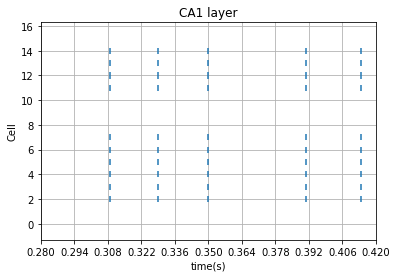

Ret1 :  {2048, 1988, 1637, 299, 2347, 1389, 1870, 2001, 2039, 948, 151, 1115, 1053}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 545 [1265]


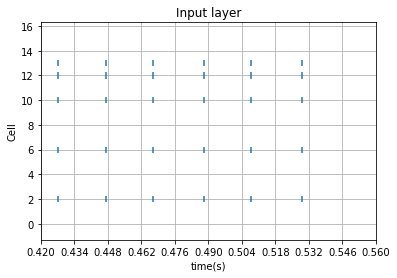

0 :  [ 0  1  5  6  8  9 10 11 12 13 14 15]
1 :  [ 2  6  9 11 12 13]
2 :  [ 2  3  4  5  6  7 11 12 13 14]
3 :  [ 2  6 10 12 13]
4 :  [ 0  1  2  4  6  7  8  9 10 11 12 13 14]
5 :  [ 0  1  2  3  4  5  6  7 10 12 13 14 15]


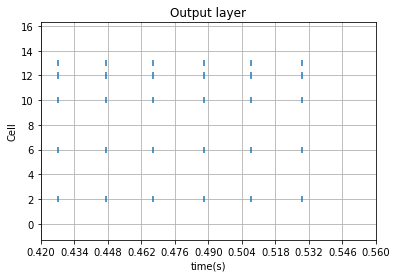

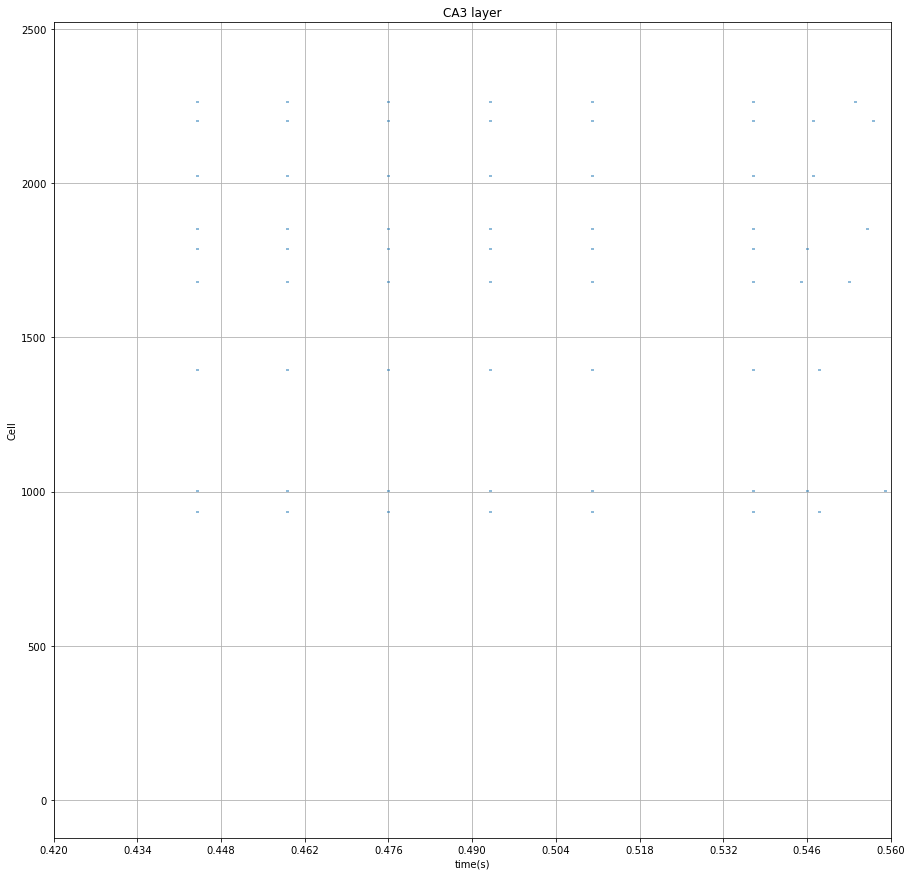

0 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
1 :  [509, 1991, 2376, 585, 1547, 1484, 2380, 1244, 1374, 1251, 357, 1192, 686]
2 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
3 :  [1681, 1560, 2203, 936, 1854, 577, 2264, 730, 2024, 1004, 1396, 1788, 1534]
4 :  [323, 658, 1879, 609, 483, 1195, 172, 111, 1007, 561, 1139, 569]
5 :  [833, 2114, 1103, 532, 1941, 1757, 798, 1630, 549, 1580, 369, 1653]


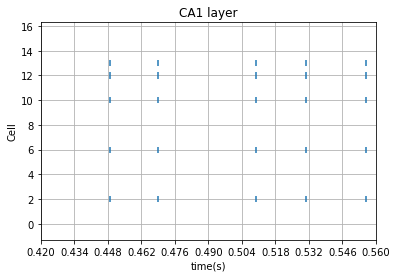

Ret1 :  {577, 936, 2024, 1004, 1854, 1681, 1396, 1560, 730, 2203, 1788, 1534, 2264}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 689 [1740]
0 698 [1598]


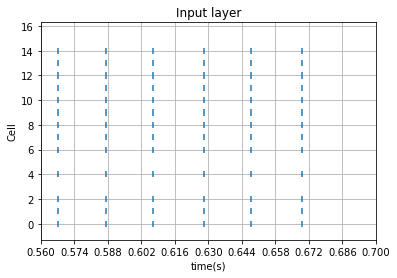

0 :  [ 0  1  5  6  8  9 10 11 12 13 14 15]
1 :  [ 2  6  9 11 12 13]
2 :  [ 2  3  4  5  6  7 11 12 13 14]
3 :  [ 2  6 10 12 13]
4 :  [ 0  1  2  4  6  7  8  9 10 11 12 13 14]
5 :  [ 0  1  2  3  4  5  6  7 10 12 13 14 15]


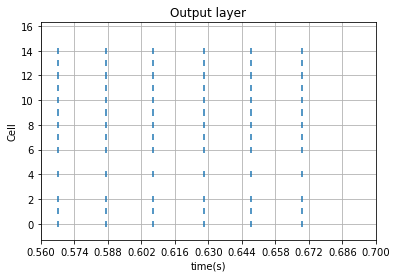

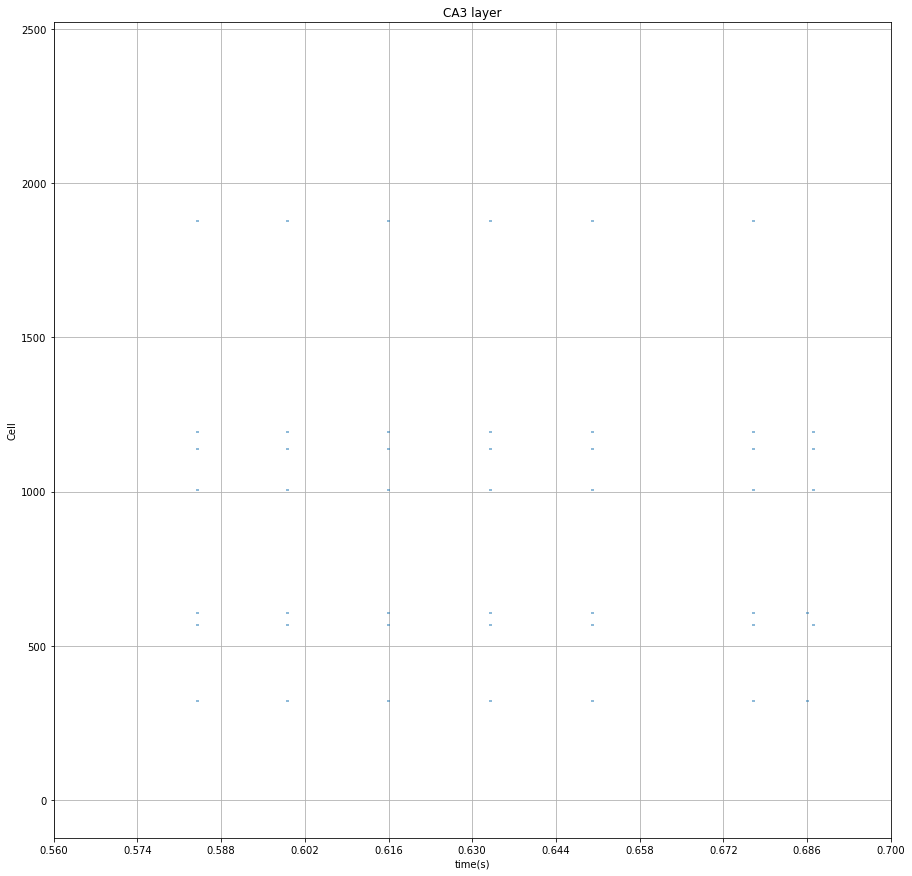

0 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
1 :  [509, 1991, 2376, 585, 1547, 1484, 2380, 1244, 1374, 1251, 357, 1192, 686]
2 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
3 :  [1681, 1560, 2203, 936, 1854, 577, 2264, 730, 2024, 1004, 1396, 1788, 1534]
4 :  [323, 658, 1879, 609, 483, 1195, 172, 111, 1007, 561, 1139, 569]
5 :  [833, 2114, 1103, 532, 1941, 1757, 798, 1630, 549, 1580, 369, 1653]


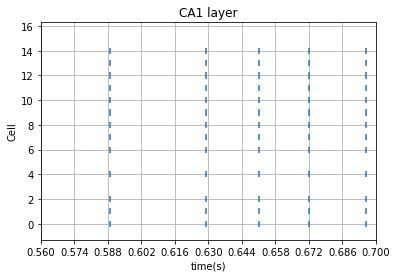

Ret1 :  {609, 323, 483, 1195, 172, 111, 1007, 561, 658, 1139, 1879, 569}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 838 [1130]


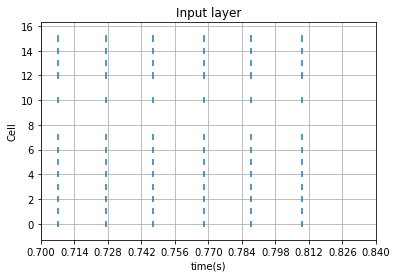

0 :  [ 0  1  5  6  8  9 10 11 12 13 14 15]
1 :  [ 2  6  9 11 12 13]
2 :  [ 2  3  4  5  6  7 11 12 13 14]
3 :  [ 2  6 10 12 13]
4 :  [ 0  1  2  4  6  7  8  9 10 11 12 13 14]
5 :  [ 0  1  2  3  4  5  6  7 10 12 13 14 15]


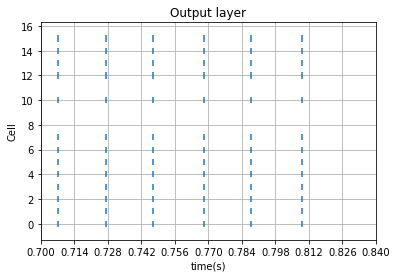

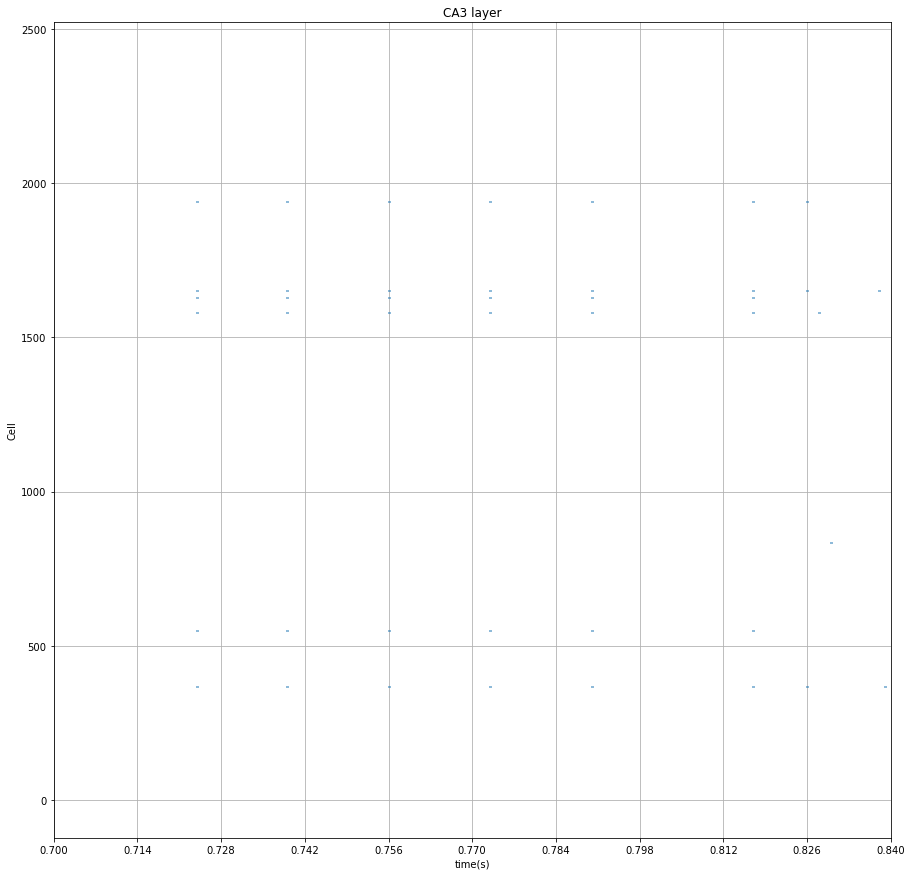

0 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
1 :  [509, 1991, 2376, 585, 1547, 1484, 2380, 1244, 1374, 1251, 357, 1192, 686]
2 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
3 :  [1681, 1560, 2203, 936, 1854, 577, 2264, 730, 2024, 1004, 1396, 1788, 1534]
4 :  [323, 658, 1879, 609, 483, 1195, 172, 111, 1007, 561, 1139, 569]
5 :  [833, 2114, 1103, 532, 1941, 1757, 798, 1630, 549, 1580, 369, 1653]


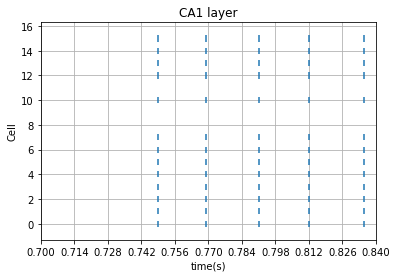

Ret1 :  {833, 2114, 836, 549, 1630, 1580, 1103, 369, 532, 1653, 1941, 1757, 798}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
Success :  0
Fail :  6
If_fail :  0
Output bias (mean, std) :  0.0 0.0
0 121 [1991]


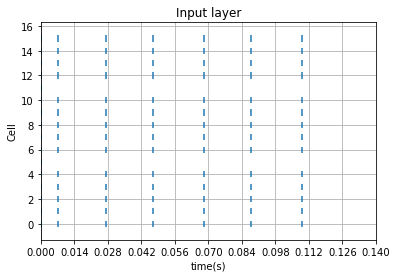

0 :  [ 0  1  2  3  4  6  7  8  9 10 12 13 14 15]
1 :  [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14]
2 :  [ 0  1  2  3  4  8  9 10 13 14]
3 :  [ 0  1  8 10 12 14]
4 :  [ 0  1  3  5 10 12 13 15]
5 :  [ 0  1  2  3  4  5  6  7 10 12 13 14 15]


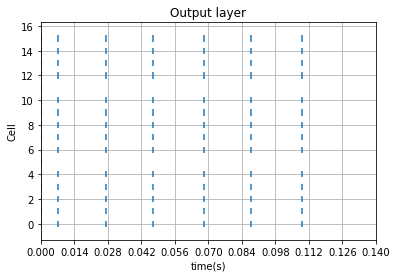

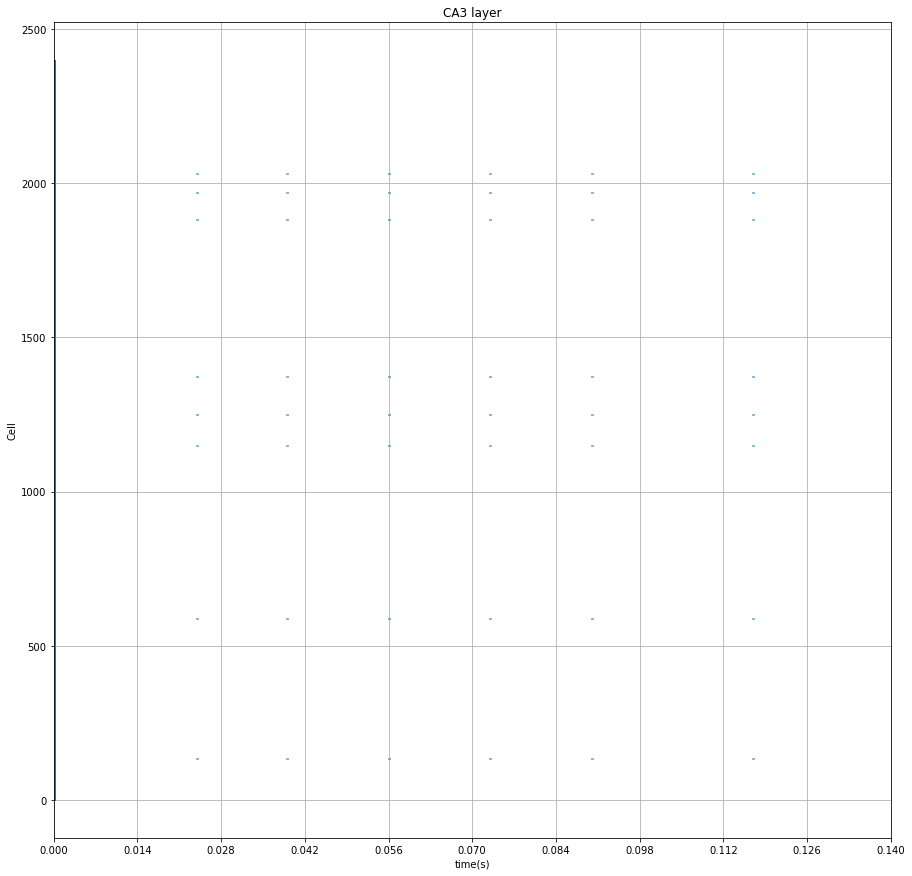

0 :  [1281, 134, 658, 425, 1969, 1991, 2380, 588, 1882, 1374, 2266, 1251, 2031, 1150]
1 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
2 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
3 :  [1857, 1605, 971, 1614, 918, 993, 1635, 292, 2221, 2108, 1727, 1270, 703]
4 :  [2308, 131, 406, 1458, 1212, 2249, 1494, 1370, 1755, 2265, 1895, 2030]
5 :  [833, 2114, 1103, 532, 1941, 1757, 798, 1630, 549, 1580, 369, 1653]


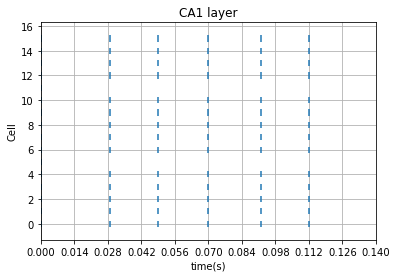

Ret1 :  {1281, 1374, 1251, 134, 1991, 425, 2266, 588, 2380, 2031, 1969, 658, 1882, 1150}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------


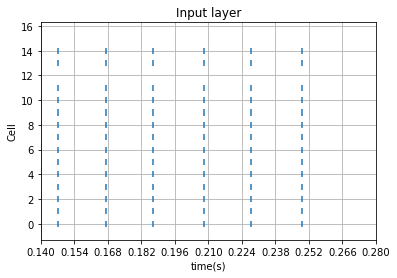

0 :  [ 0  1  2  3  4  6  7  8  9 10 12 13 14 15]
1 :  [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14]
2 :  [ 0  1  2  3  4  8  9 10 13 14]
3 :  [ 0  1  8 10 12 14]
4 :  [ 0  1  3  5 10 12 13 15]
5 :  [ 0  1  2  3  4  5  6  7 10 12 13 14 15]


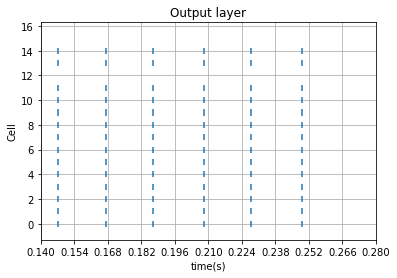

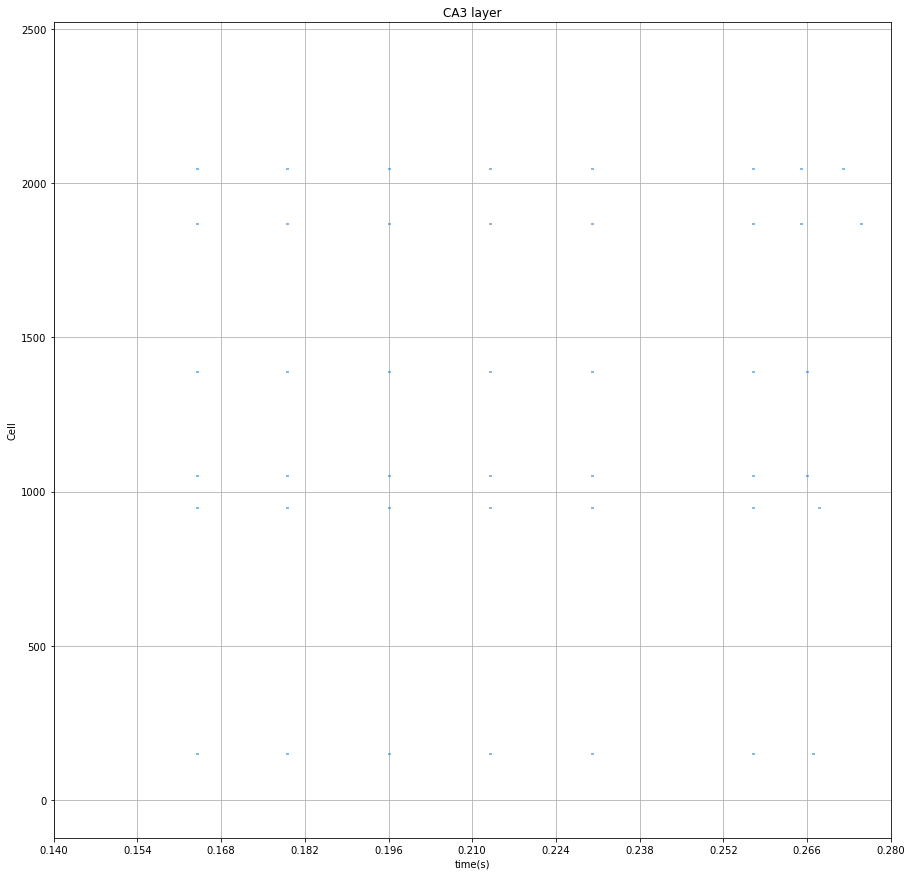

0 :  [1281, 134, 658, 425, 1969, 1991, 2380, 588, 1882, 1374, 2266, 1251, 2031, 1150]
1 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
2 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
3 :  [1857, 1605, 971, 1614, 918, 993, 1635, 292, 2221, 2108, 1727, 1270, 703]
4 :  [2308, 131, 406, 1458, 1212, 2249, 1494, 1370, 1755, 2265, 1895, 2030]
5 :  [833, 2114, 1103, 532, 1941, 1757, 798, 1630, 549, 1580, 369, 1653]


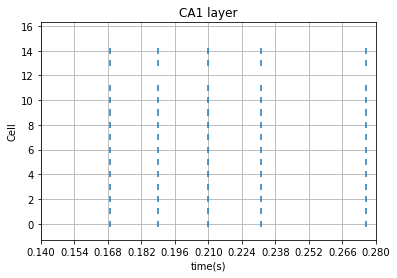

Ret1 :  {2048, 1988, 1637, 299, 2347, 1389, 1870, 2001, 2039, 948, 151, 1115, 1053}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 405 [1281]


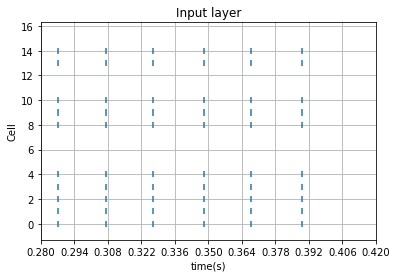

0 :  [ 0  1  2  3  4  6  7  8  9 10 12 13 14 15]
1 :  [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14]
2 :  [ 0  1  2  3  4  8  9 10 13 14]
3 :  [ 0  1  8 10 12 14]
4 :  [ 0  1  3  5 10 12 13 15]
5 :  [ 0  1  2  3  4  5  6  7 10 12 13 14 15]


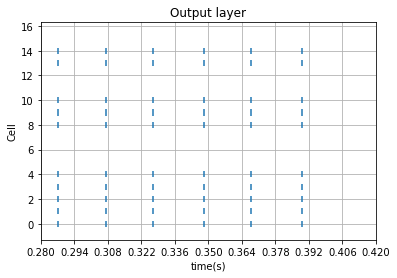

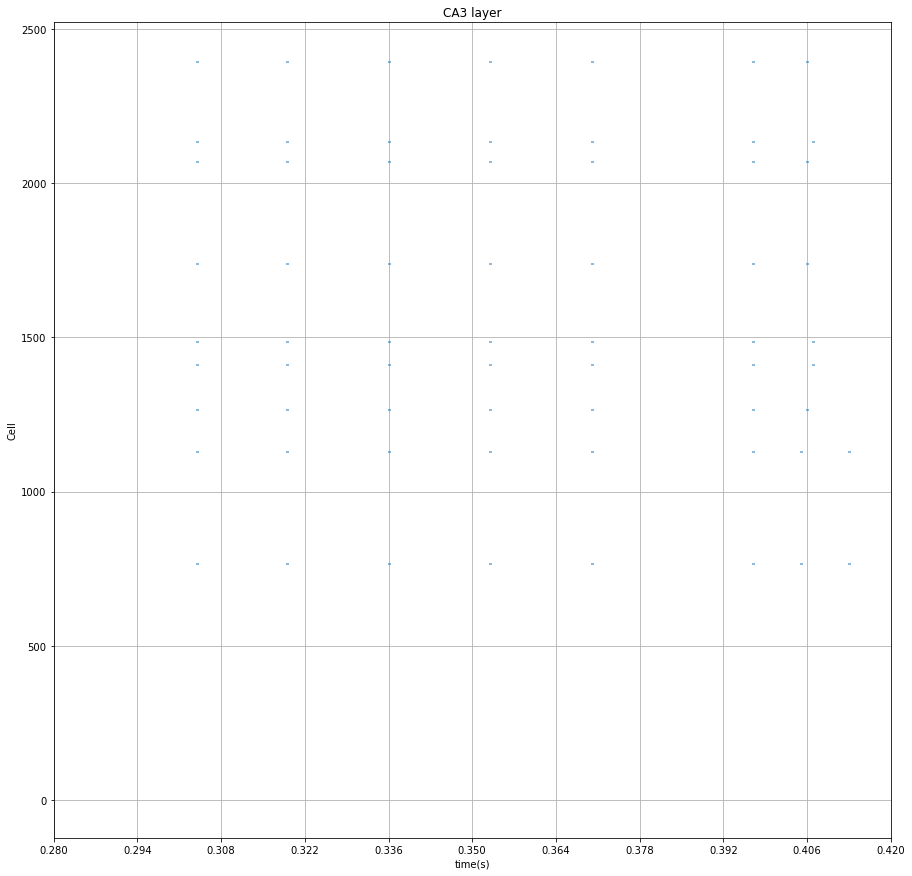

0 :  [1281, 134, 658, 425, 1969, 1991, 2380, 588, 1882, 1374, 2266, 1251, 2031, 1150]
1 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
2 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
3 :  [1857, 1605, 971, 1614, 918, 993, 1635, 292, 2221, 2108, 1727, 1270, 703]
4 :  [2308, 131, 406, 1458, 1212, 2249, 1494, 1370, 1755, 2265, 1895, 2030]
5 :  [833, 2114, 1103, 532, 1941, 1757, 798, 1630, 549, 1580, 369, 1653]


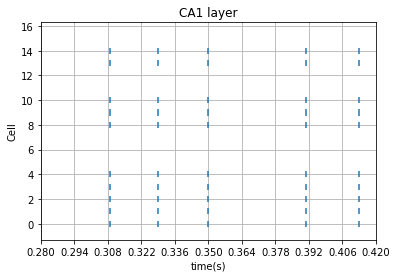

Ret1 :  {1412, 1130, 2026, 1740, 1487, 1265, 1266, 915, 2071, 2136, 2395, 2140, 1598, 767}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------


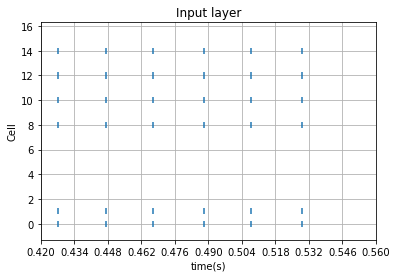

0 :  [ 0  1  2  3  4  6  7  8  9 10 12 13 14 15]
1 :  [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14]
2 :  [ 0  1  2  3  4  8  9 10 13 14]
3 :  [ 0  1  8 10 12 14]
4 :  [ 0  1  3  5 10 12 13 15]
5 :  [ 0  1  2  3  4  5  6  7 10 12 13 14 15]


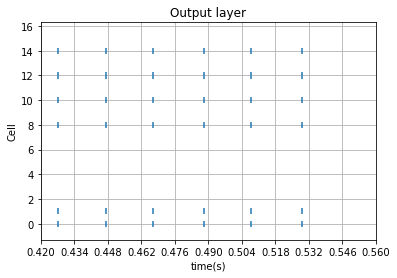

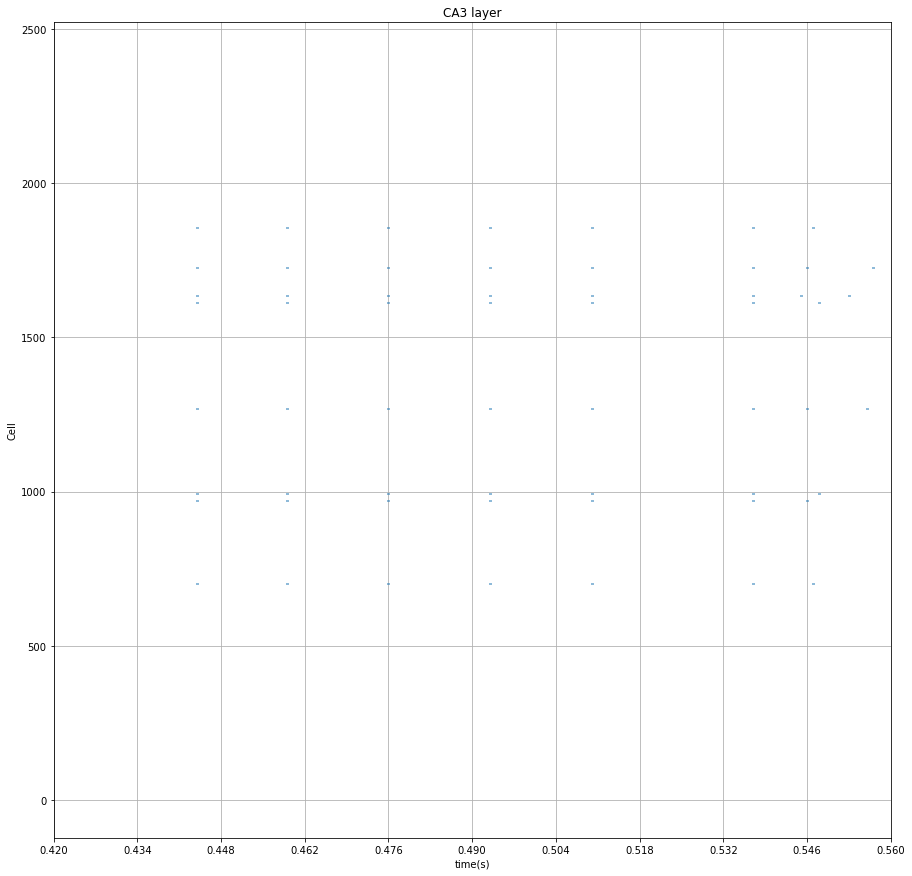

0 :  [1281, 134, 658, 425, 1969, 1991, 2380, 588, 1882, 1374, 2266, 1251, 2031, 1150]
1 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
2 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
3 :  [1857, 1605, 971, 1614, 918, 993, 1635, 292, 2221, 2108, 1727, 1270, 703]
4 :  [2308, 131, 406, 1458, 1212, 2249, 1494, 1370, 1755, 2265, 1895, 2030]
5 :  [833, 2114, 1103, 532, 1941, 1757, 798, 1630, 549, 1580, 369, 1653]


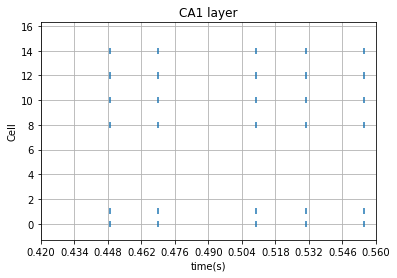

Ret1 :  {993, 1857, 1635, 292, 1605, 971, 2221, 1614, 1727, 918, 1270, 2108, 703}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------


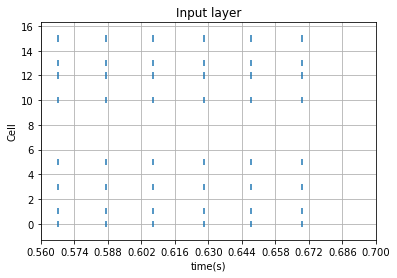

0 :  [ 0  1  2  3  4  6  7  8  9 10 12 13 14 15]
1 :  [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14]
2 :  [ 0  1  2  3  4  8  9 10 13 14]
3 :  [ 0  1  8 10 12 14]
4 :  [ 0  1  3  5 10 12 13 15]
5 :  [ 0  1  2  3  4  5  6  7 10 12 13 14 15]


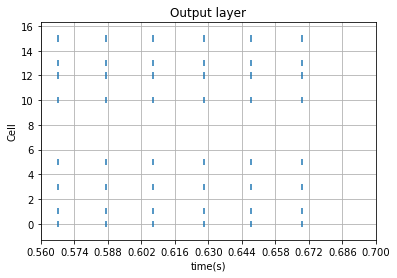

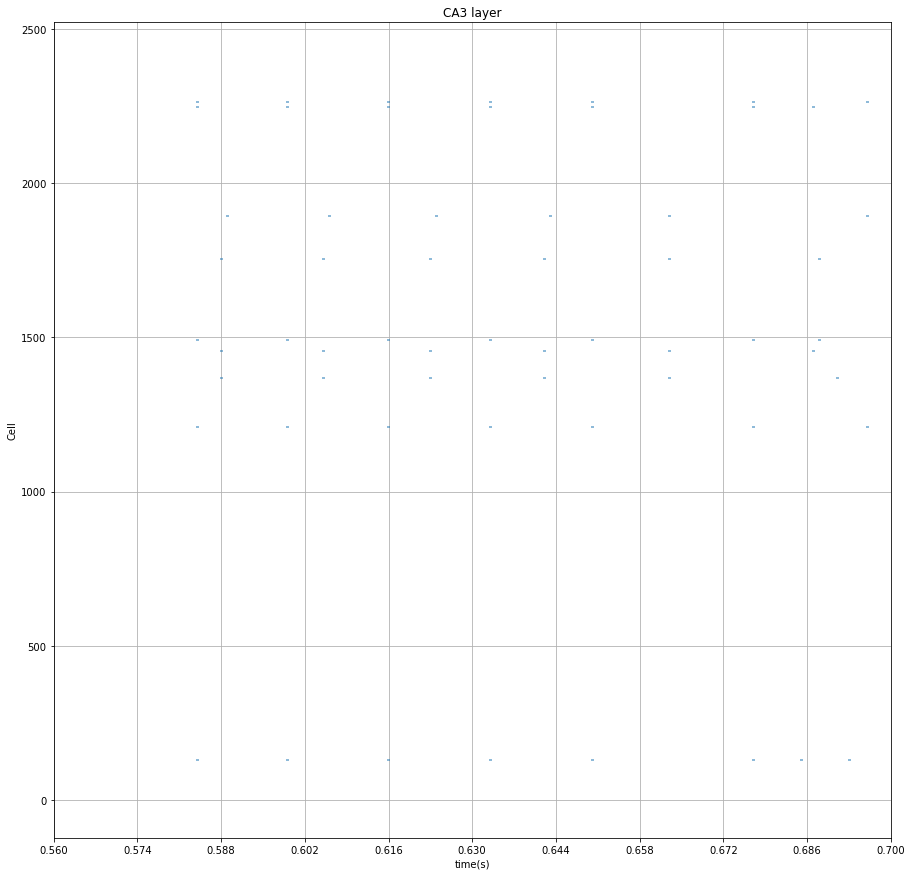

0 :  [1281, 134, 658, 425, 1969, 1991, 2380, 588, 1882, 1374, 2266, 1251, 2031, 1150]
1 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
2 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
3 :  [1857, 1605, 971, 1614, 918, 993, 1635, 292, 2221, 2108, 1727, 1270, 703]
4 :  [2308, 131, 406, 1458, 1212, 2249, 1494, 1370, 1755, 2265, 1895, 2030]
5 :  [833, 2114, 1103, 532, 1941, 1757, 798, 1630, 549, 1580, 369, 1653]


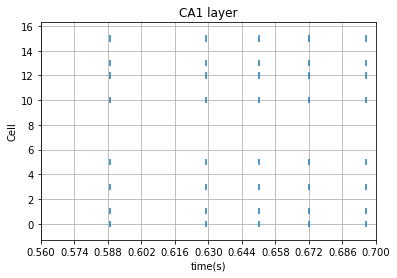

Ret1 :  {131, 2308, 1895, 2249, 2030, 1458, 406, 1494, 2265, 1370, 1755, 1212}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------


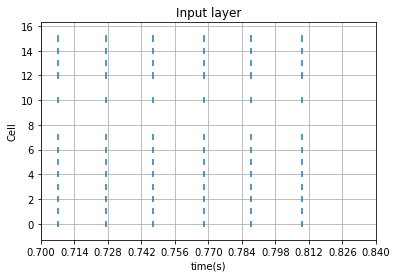

0 :  [ 0  1  2  3  4  6  7  8  9 10 12 13 14 15]
1 :  [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14]
2 :  [ 0  1  2  3  4  8  9 10 13 14]
3 :  [ 0  1  8 10 12 14]
4 :  [ 0  1  3  5 10 12 13 15]
5 :  [ 0  1  2  3  4  5  6  7 10 12 13 14 15]


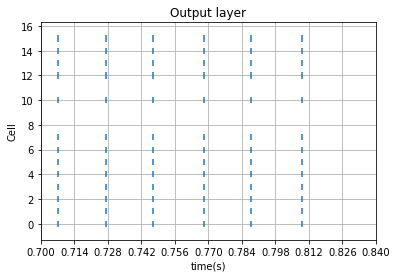

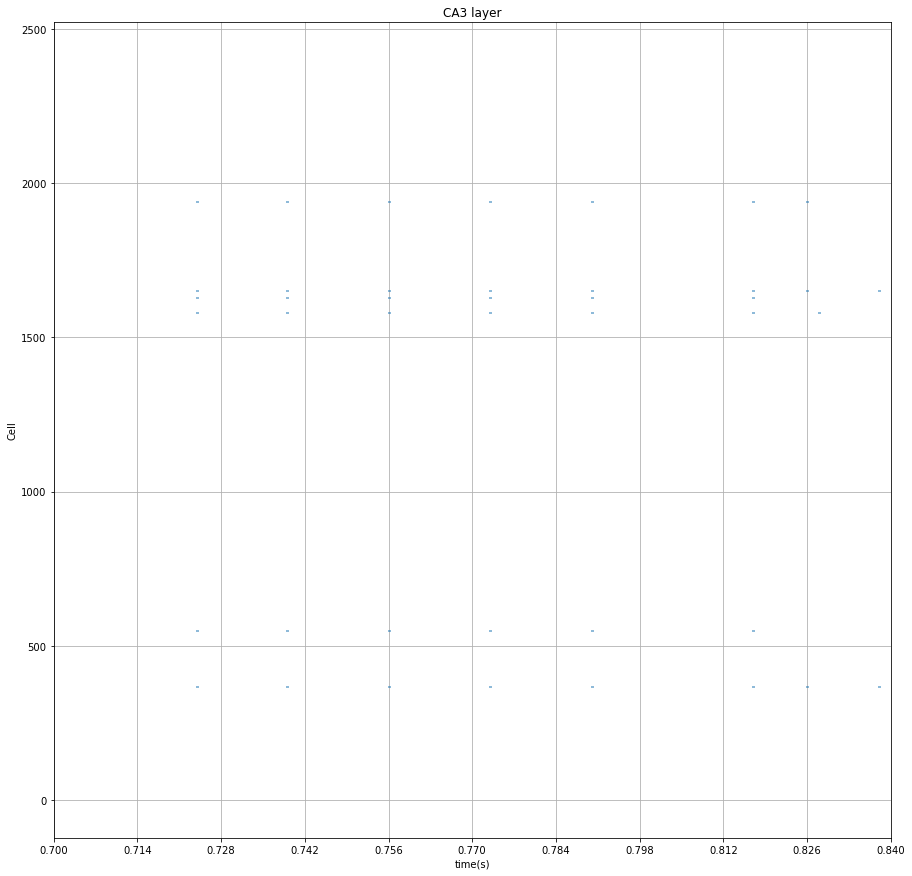

0 :  [1281, 134, 658, 425, 1969, 1991, 2380, 588, 1882, 1374, 2266, 1251, 2031, 1150]
1 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
2 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
3 :  [1857, 1605, 971, 1614, 918, 993, 1635, 292, 2221, 2108, 1727, 1270, 703]
4 :  [2308, 131, 406, 1458, 1212, 2249, 1494, 1370, 1755, 2265, 1895, 2030]
5 :  [833, 2114, 1103, 532, 1941, 1757, 798, 1630, 549, 1580, 369, 1653]


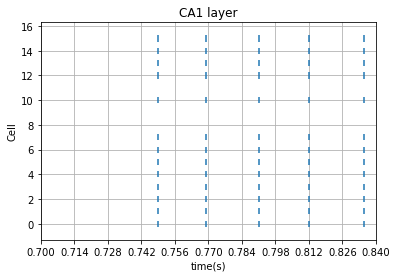

Ret1 :  {833, 2114, 549, 1630, 1580, 1103, 369, 532, 1653, 1941, 1757, 798}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
Success :  0
Fail :  6
If_fail :  0
Output bias (mean, std) :  0.0 0.0
0 121 [588]


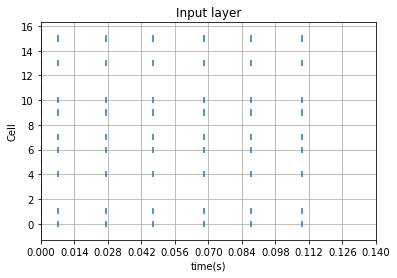

0 :  [ 0  1  4  6  7  9 10 13 15]
1 :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
2 :  [ 0  1  2  3  4  8  9 10 13 14]
3 :  [ 0  1  5 10 12 14 15]
4 :  [ 0  1  3  5 10 12 13 15]
5 :  [ 0  1  2  3  4  5  6  7 10 12 13 14 15]


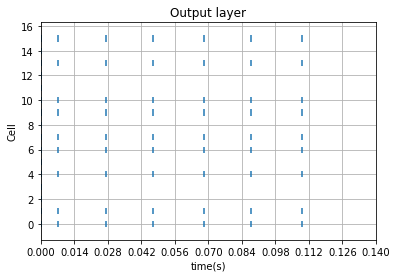

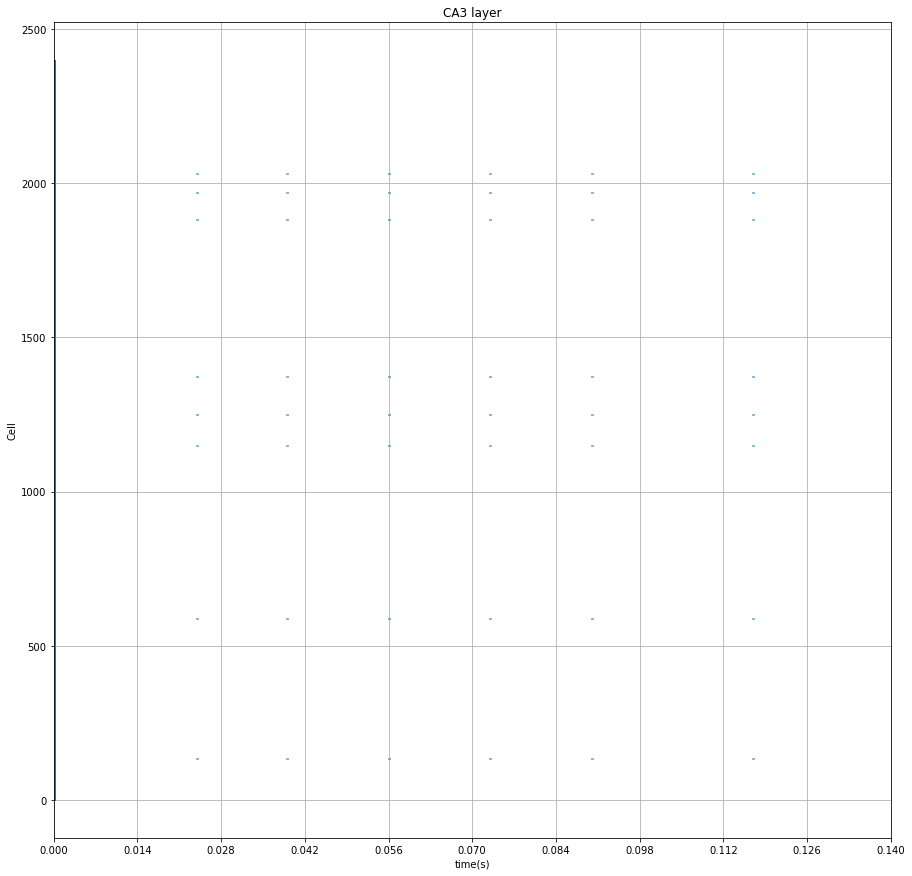

0 :  [1281, 134, 658, 425, 1969, 1991, 2380, 588, 1882, 1374, 2266, 1251, 2031, 1150]
1 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
2 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
3 :  [1857, 1605, 971, 1614, 918, 993, 1635, 292, 2221, 2108, 1727, 1270, 703]
4 :  [2308, 131, 406, 1458, 1212, 2249, 1494, 1370, 1755, 2265, 1895, 2030]
5 :  [833, 2114, 1103, 532, 1941, 1757, 798, 1630, 549, 1580, 369, 1653]


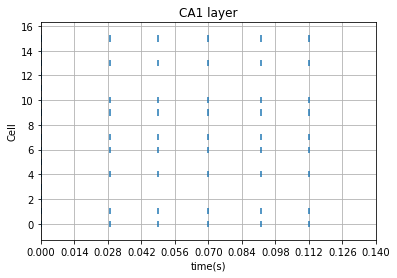

Ret1 :  {1281, 1374, 1251, 134, 1991, 425, 2266, 588, 2380, 2031, 1969, 658, 1882, 1150}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 277 [1374]


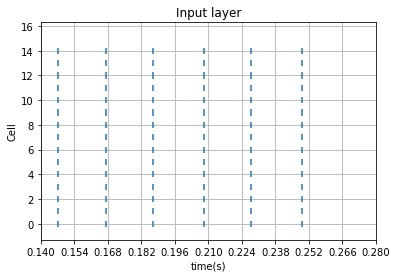

0 :  [ 0  1  4  6  7  9 10 13 15]
1 :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
2 :  [ 0  1  2  3  4  8  9 10 13 14]
3 :  [ 0  1  5 10 12 14 15]
4 :  [ 0  1  3  5 10 12 13 15]
5 :  [ 0  1  2  3  4  5  6  7 10 12 13 14 15]


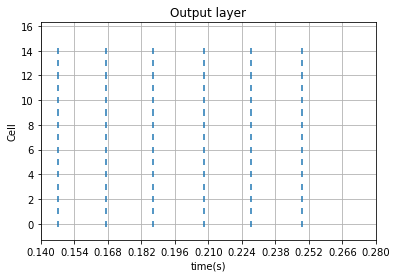

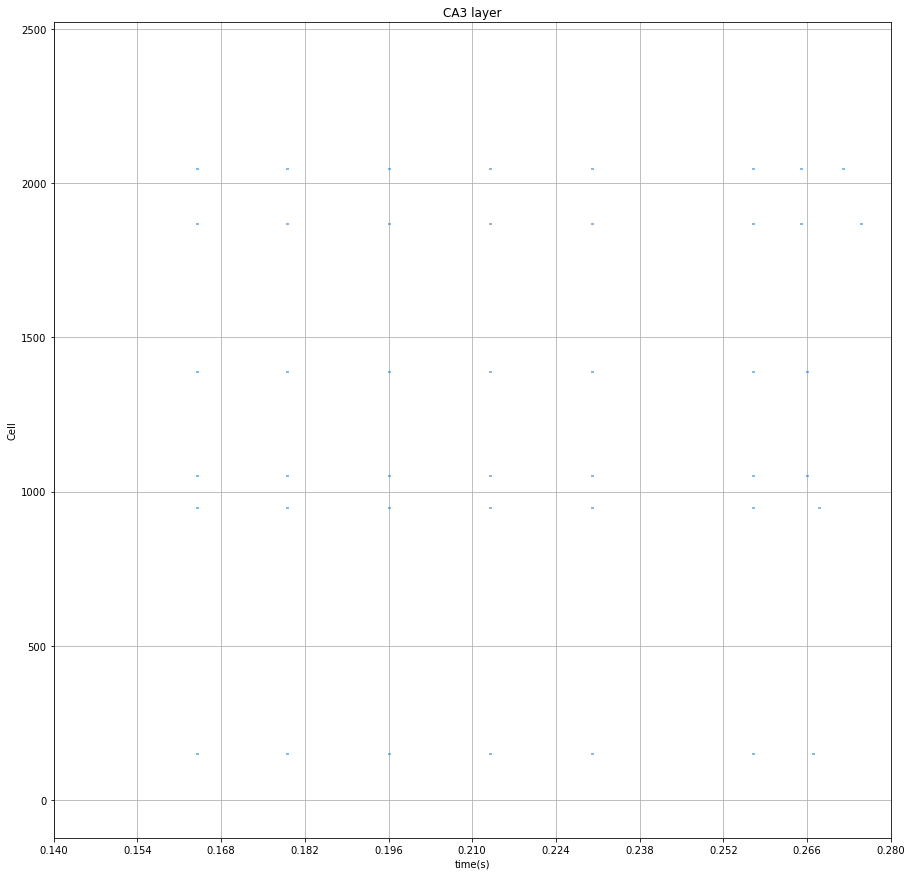

0 :  [1281, 134, 658, 425, 1969, 1991, 2380, 588, 1882, 1374, 2266, 1251, 2031, 1150]
1 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
2 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
3 :  [1857, 1605, 971, 1614, 918, 993, 1635, 292, 2221, 2108, 1727, 1270, 703]
4 :  [2308, 131, 406, 1458, 1212, 2249, 1494, 1370, 1755, 2265, 1895, 2030]
5 :  [833, 2114, 1103, 532, 1941, 1757, 798, 1630, 549, 1580, 369, 1653]


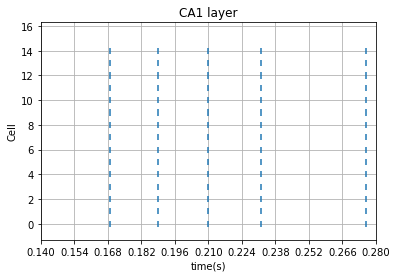

Ret1 :  {2048, 1988, 1637, 299, 2347, 1389, 1870, 2001, 2039, 948, 151, 1115, 1053}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 419 [1969]


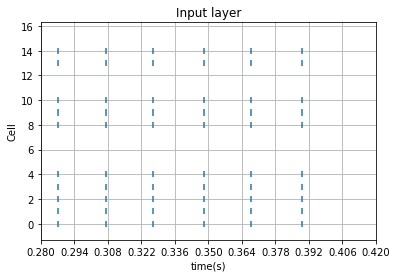

0 :  [ 0  1  4  6  7  9 10 13 15]
1 :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
2 :  [ 0  1  2  3  4  8  9 10 13 14]
3 :  [ 0  1  5 10 12 14 15]
4 :  [ 0  1  3  5 10 12 13 15]
5 :  [ 0  1  2  3  4  5  6  7 10 12 13 14 15]


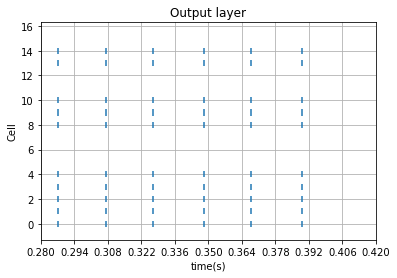

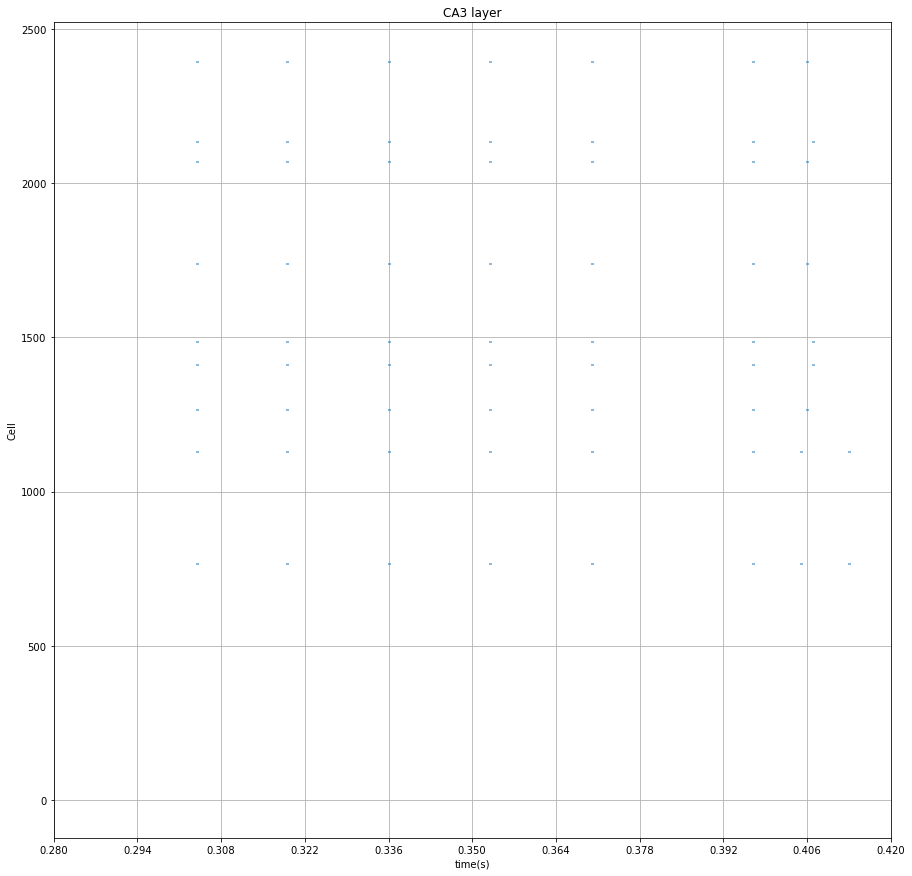

0 :  [1281, 134, 658, 425, 1969, 1991, 2380, 588, 1882, 1374, 2266, 1251, 2031, 1150]
1 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
2 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
3 :  [1857, 1605, 971, 1614, 918, 993, 1635, 292, 2221, 2108, 1727, 1270, 703]
4 :  [2308, 131, 406, 1458, 1212, 2249, 1494, 1370, 1755, 2265, 1895, 2030]
5 :  [833, 2114, 1103, 532, 1941, 1757, 798, 1630, 549, 1580, 369, 1653]


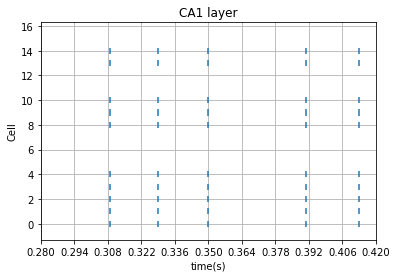

Ret1 :  {1412, 1130, 2026, 1740, 1487, 1265, 1266, 915, 2071, 2136, 2395, 2140, 1598, 767}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 546 [425]


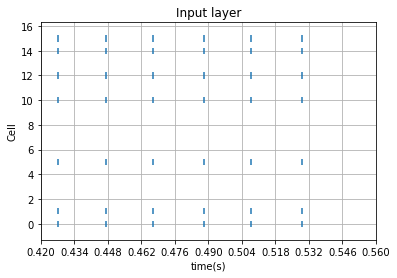

0 :  [ 0  1  4  6  7  9 10 13 15]
1 :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
2 :  [ 0  1  2  3  4  8  9 10 13 14]
3 :  [ 0  1  5 10 12 14 15]
4 :  [ 0  1  3  5 10 12 13 15]
5 :  [ 0  1  2  3  4  5  6  7 10 12 13 14 15]


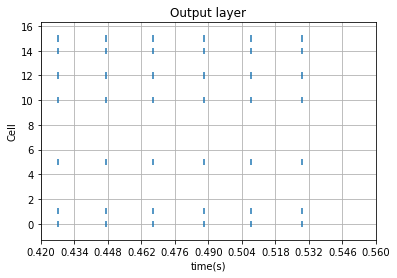

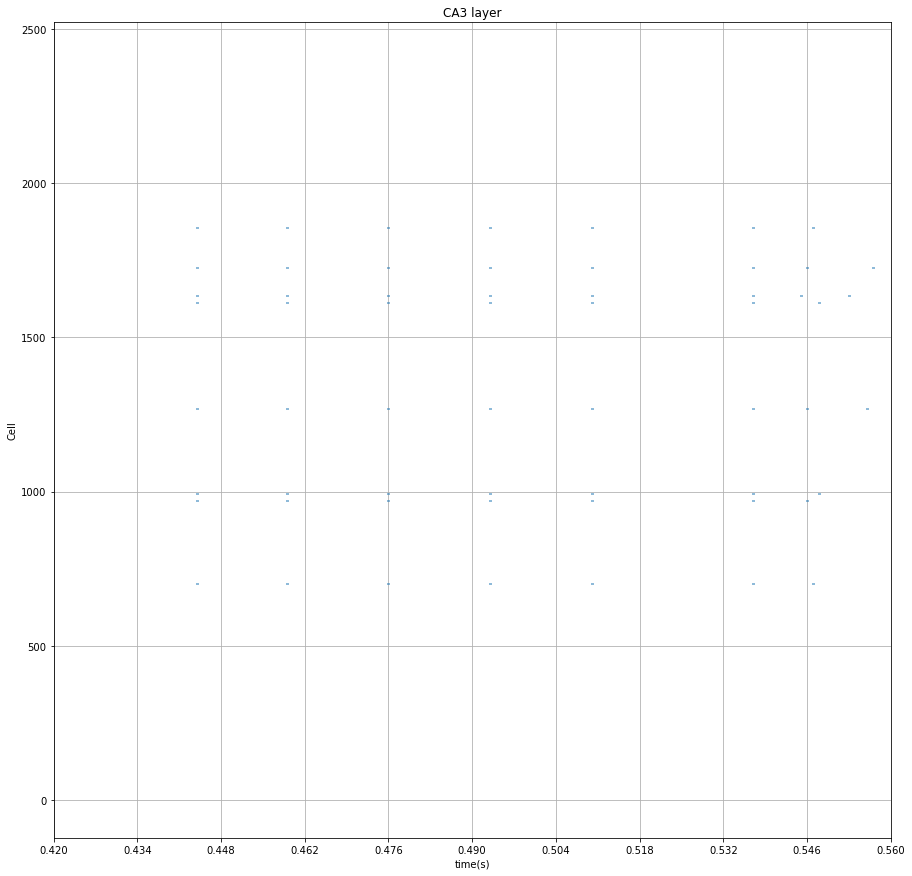

0 :  [1281, 134, 658, 425, 1969, 1991, 2380, 588, 1882, 1374, 2266, 1251, 2031, 1150]
1 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
2 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
3 :  [1857, 1605, 971, 1614, 918, 993, 1635, 292, 2221, 2108, 1727, 1270, 703]
4 :  [2308, 131, 406, 1458, 1212, 2249, 1494, 1370, 1755, 2265, 1895, 2030]
5 :  [833, 2114, 1103, 532, 1941, 1757, 798, 1630, 549, 1580, 369, 1653]


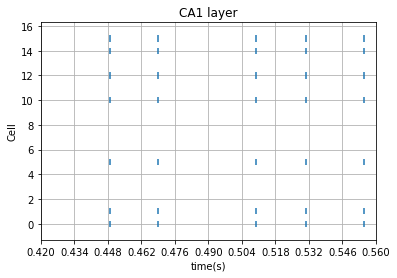

Ret1 :  {993, 1857, 1635, 292, 1605, 971, 2221, 1614, 1727, 918, 1270, 2108, 703}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 680 [2266]
0 696 [1969]


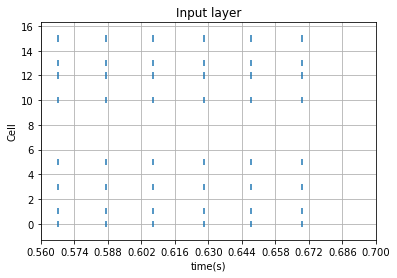

0 :  [ 0  1  4  6  7  9 10 13 15]
1 :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
2 :  [ 0  1  2  3  4  8  9 10 13 14]
3 :  [ 0  1  5 10 12 14 15]
4 :  [ 0  1  3  5 10 12 13 15]
5 :  [ 0  1  2  3  4  5  6  7 10 12 13 14 15]


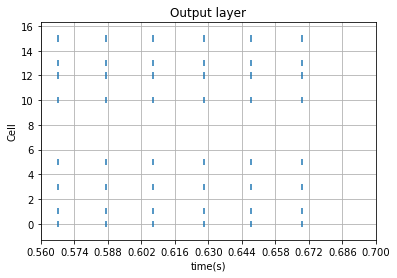

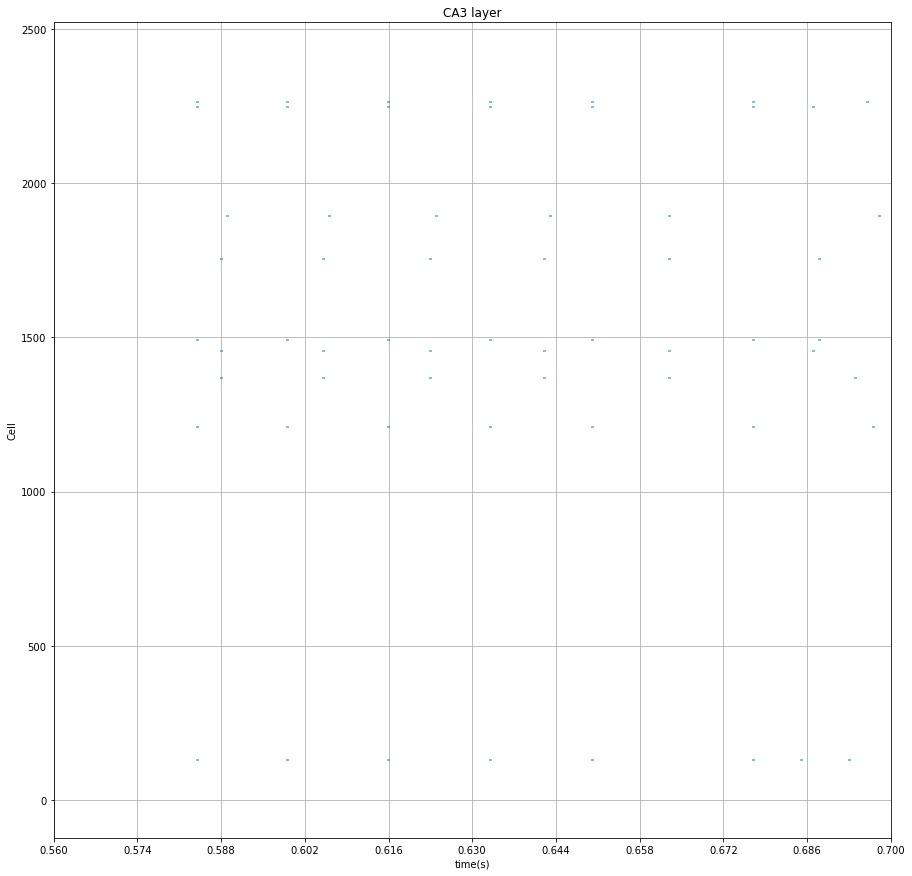

0 :  [1281, 134, 658, 425, 1969, 1991, 2380, 588, 1882, 1374, 2266, 1251, 2031, 1150]
1 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
2 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
3 :  [1857, 1605, 971, 1614, 918, 993, 1635, 292, 2221, 2108, 1727, 1270, 703]
4 :  [2308, 131, 406, 1458, 1212, 2249, 1494, 1370, 1755, 2265, 1895, 2030]
5 :  [833, 2114, 1103, 532, 1941, 1757, 798, 1630, 549, 1580, 369, 1653]


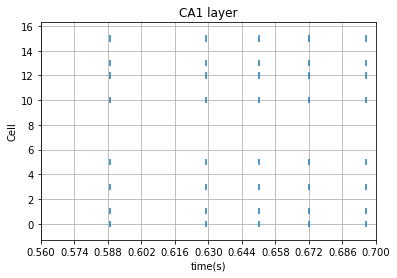

Ret1 :  {131, 2308, 1895, 2249, 2266, 2030, 1458, 406, 1494, 2265, 1370, 1755, 1212}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  {2266}
---------------------------------------------------------------------------------
0 832 [1882]
0 833 [134]


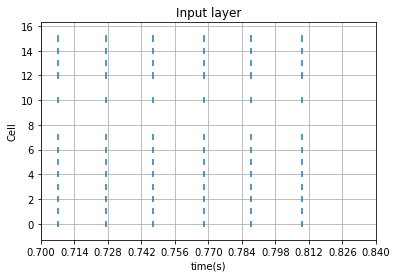

0 :  [ 0  1  4  6  7  9 10 13 15]
1 :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
2 :  [ 0  1  2  3  4  8  9 10 13 14]
3 :  [ 0  1  5 10 12 14 15]
4 :  [ 0  1  3  5 10 12 13 15]
5 :  [ 0  1  2  3  4  5  6  7 10 12 13 14 15]


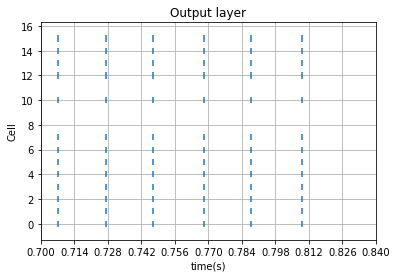

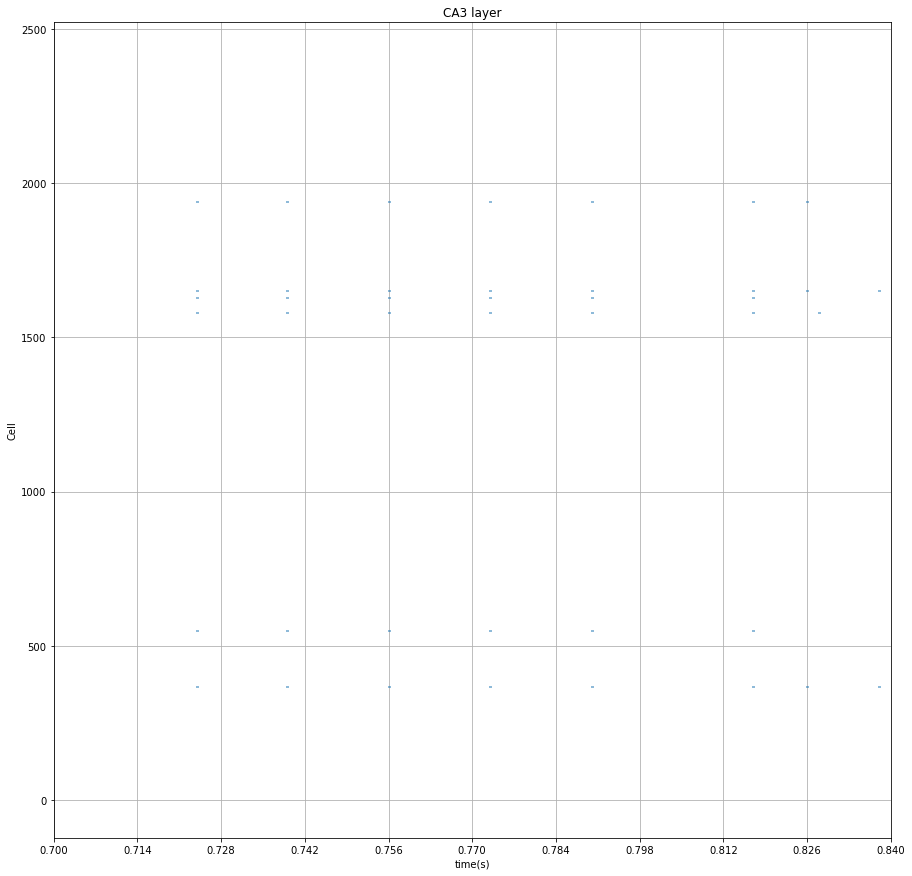

0 :  [1281, 134, 658, 425, 1969, 1991, 2380, 588, 1882, 1374, 2266, 1251, 2031, 1150]
1 :  [2048, 1988, 1870, 2001, 151, 1115, 1053, 1637, 299, 2347, 1389, 948, 2039]
2 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
3 :  [1857, 1605, 971, 1614, 918, 993, 1635, 292, 2221, 2108, 1727, 1270, 703]
4 :  [2308, 131, 406, 1458, 1212, 2249, 1494, 1370, 1755, 2265, 1895, 2030]
5 :  [833, 2114, 1103, 532, 1941, 1757, 798, 1630, 549, 1580, 369, 1653]


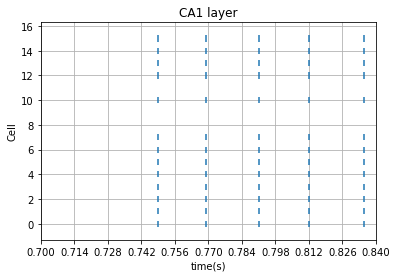

Ret1 :  {833, 2114, 549, 1630, 1580, 1103, 369, 532, 1653, 1941, 1757, 798}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
Success :  0
Fail :  6
If_fail :  0
Output bias (mean, std) :  0.0 0.0


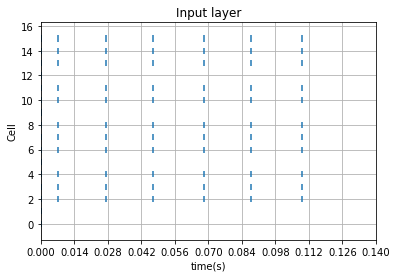

0 :  [ 2  3  4  6  7  8 10 11 13 14 15]
1 :  [ 2  3  4  7  9 10 14]
2 :  [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15]
3 :  [ 2  3  4  5  7  8 10 11 12 13]
4 :  [ 0  1  3  4  5  6  7 11 14 15]
5 :  [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14]


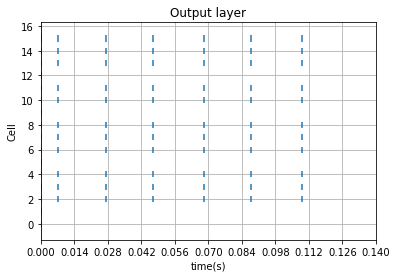

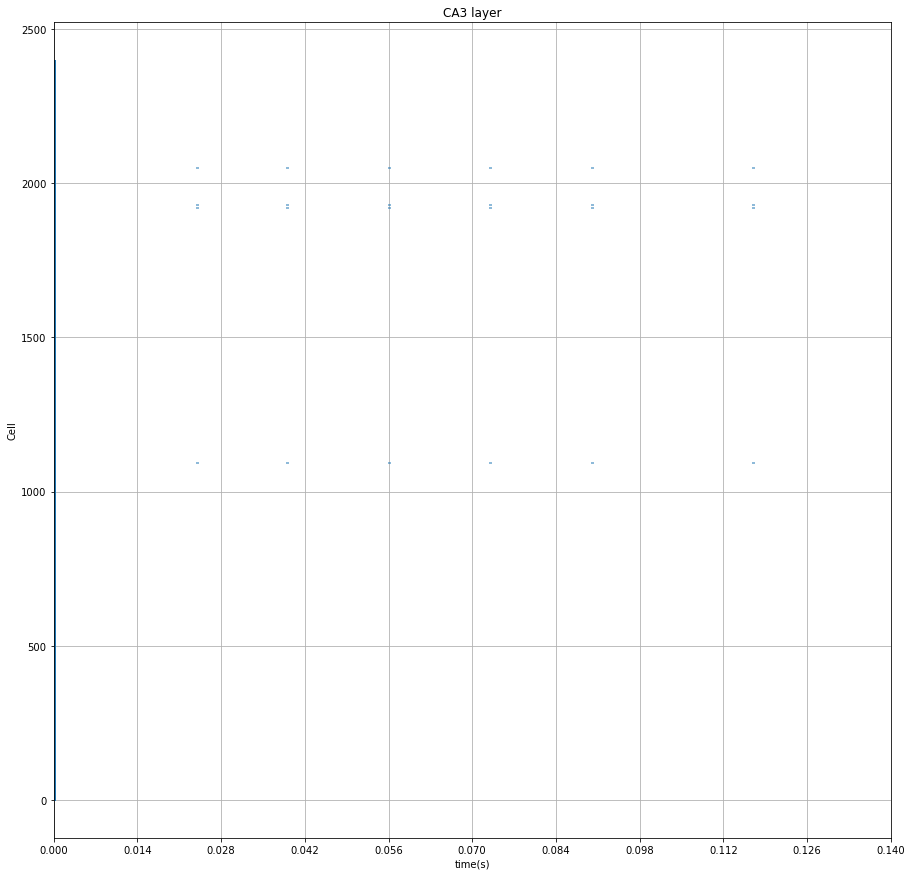

0 :  [1921, 2051, 1930, 402, 1080, 1094, 344, 237, 885]
1 :  [1857, 837, 1542, 1362, 1371, 1770, 557, 1772, 2355, 828, 1150]
2 :  [1038, 532, 1954, 2096, 61, 2114, 1634, 614, 876, 1391]
3 :  [257, 131, 645, 140, 2332, 436, 571, 827, 2249, 1494, 501]
4 :  [11, 144, 2319, 2256, 23, 1624, 1880, 1440, 620]
5 :  [658, 151, 1053, 299, 561, 948, 323, 1988, 1870, 609, 1637]


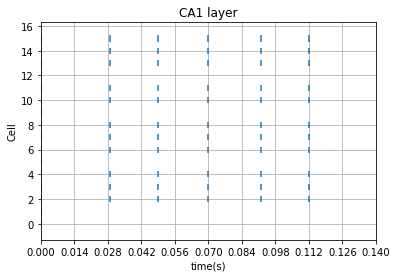

Ret1 :  {1921, 2051, 1094, 1930, 237, 402, 885, 344, 1080}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 270 [2051]


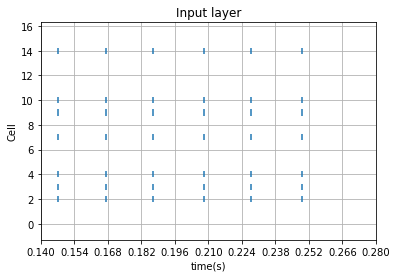

0 :  [ 2  3  4  6  7  8 10 11 13 14 15]
1 :  [ 2  3  4  7  9 10 14]
2 :  [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15]
3 :  [ 2  3  4  5  7  8 10 11 12 13]
4 :  [ 0  1  3  4  5  6  7 11 14 15]
5 :  [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14]


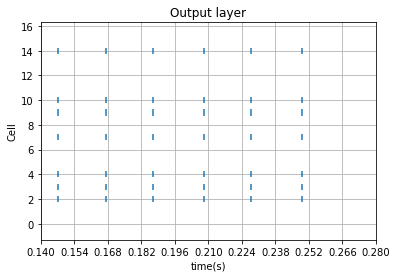

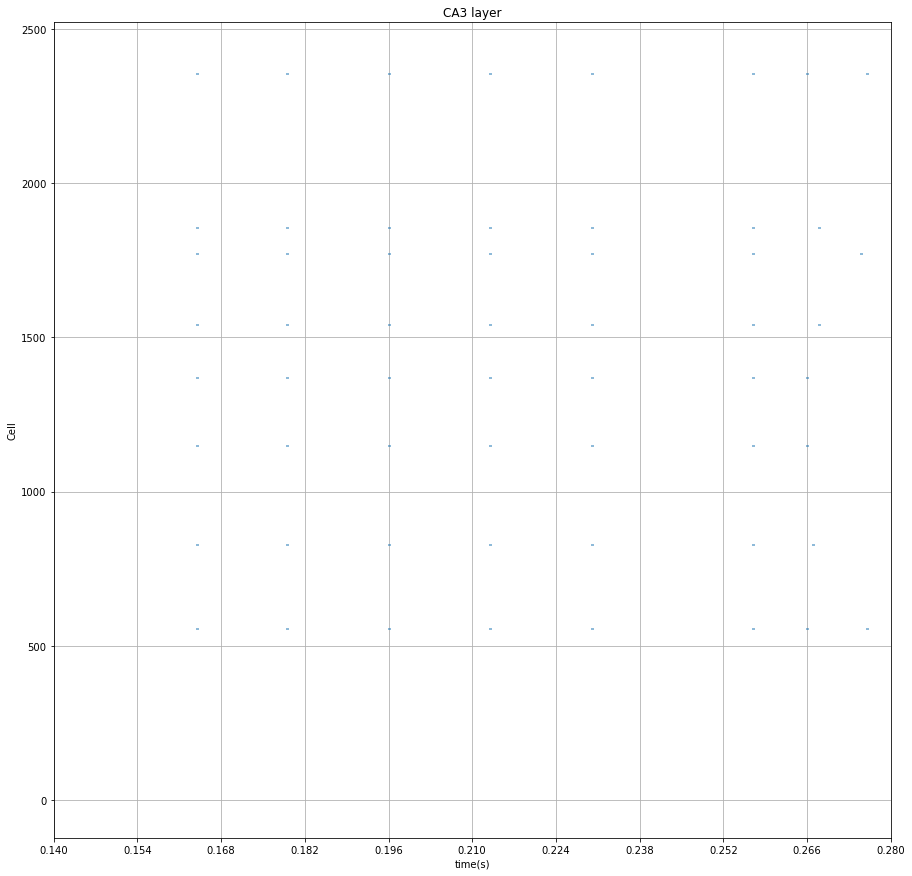

0 :  [1921, 2051, 1930, 402, 1080, 1094, 344, 237, 885]
1 :  [1857, 837, 1542, 1362, 1371, 1770, 557, 1772, 2355, 828, 1150]
2 :  [1038, 532, 1954, 2096, 61, 2114, 1634, 614, 876, 1391]
3 :  [257, 131, 645, 140, 2332, 436, 571, 827, 2249, 1494, 501]
4 :  [11, 144, 2319, 2256, 23, 1624, 1880, 1440, 620]
5 :  [658, 151, 1053, 299, 561, 948, 323, 1988, 1870, 609, 1637]


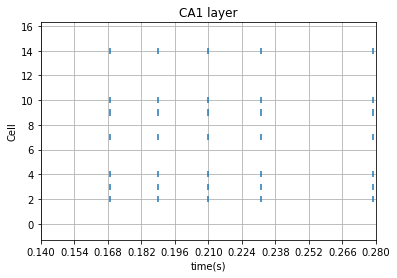

Ret1 :  {1857, 837, 1542, 1770, 1772, 557, 1362, 2355, 1371, 828, 1150}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------


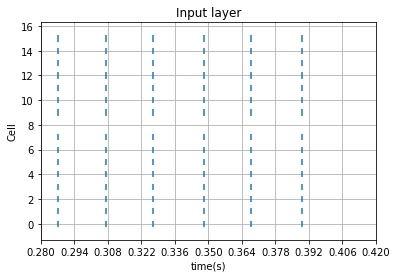

0 :  [ 2  3  4  6  7  8 10 11 13 14 15]
1 :  [ 2  3  4  7  9 10 14]
2 :  [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15]
3 :  [ 2  3  4  5  7  8 10 11 12 13]
4 :  [ 0  1  3  4  5  6  7 11 14 15]
5 :  [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14]


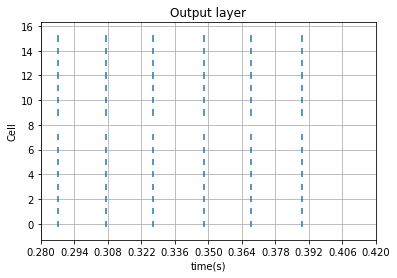

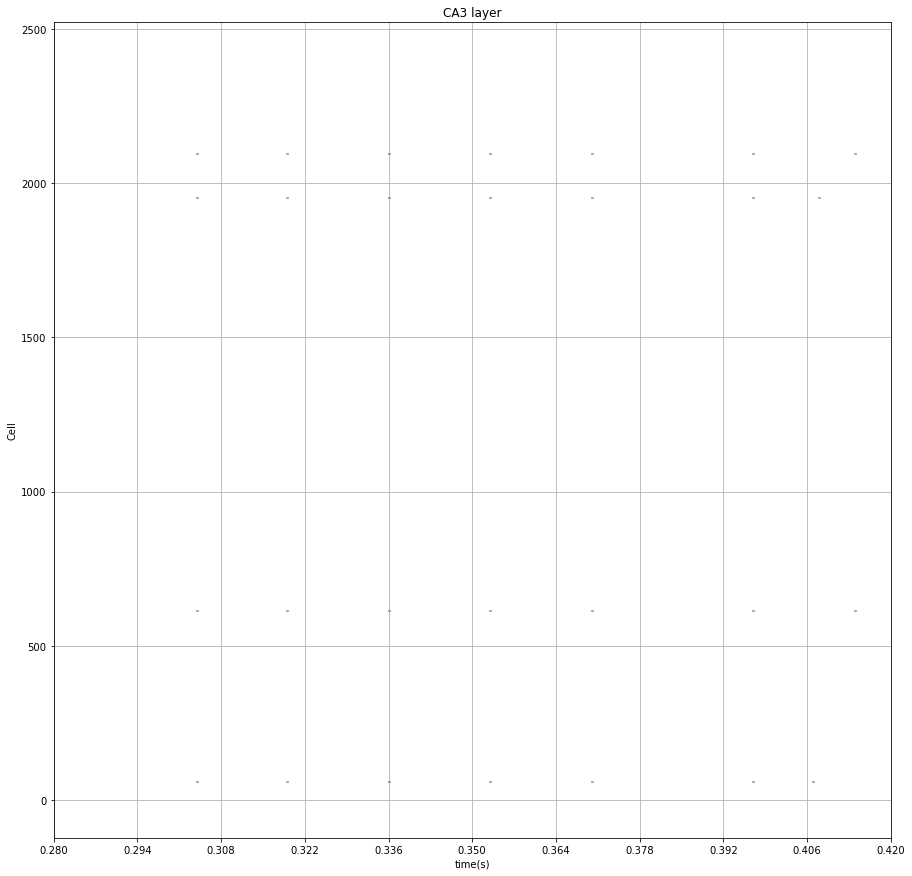

0 :  [1921, 2051, 1930, 402, 1080, 1094, 344, 237, 885]
1 :  [1857, 837, 1542, 1362, 1371, 1770, 557, 1772, 2355, 828, 1150]
2 :  [1038, 532, 1954, 2096, 61, 2114, 1634, 614, 876, 1391]
3 :  [257, 131, 645, 140, 2332, 436, 571, 827, 2249, 1494, 501]
4 :  [11, 144, 2319, 2256, 23, 1624, 1880, 1440, 620]
5 :  [658, 151, 1053, 299, 561, 948, 323, 1988, 1870, 609, 1637]


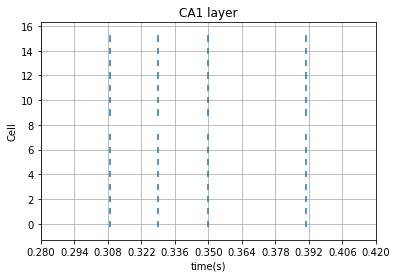

Ret1 :  {1634, 1954, 2114, 614, 876, 1038, 1391, 2096, 532, 61}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 546 [1094]
0 554 [1094]


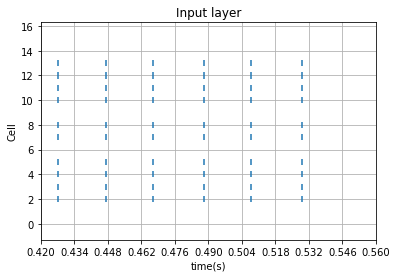

0 :  [ 2  3  4  6  7  8 10 11 13 14 15]
1 :  [ 2  3  4  7  9 10 14]
2 :  [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15]
3 :  [ 2  3  4  5  7  8 10 11 12 13]
4 :  [ 0  1  3  4  5  6  7 11 14 15]
5 :  [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14]


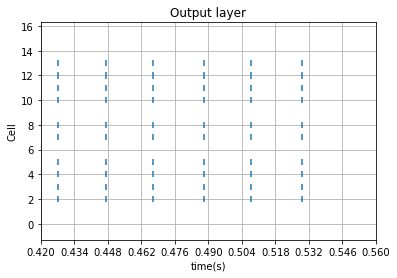

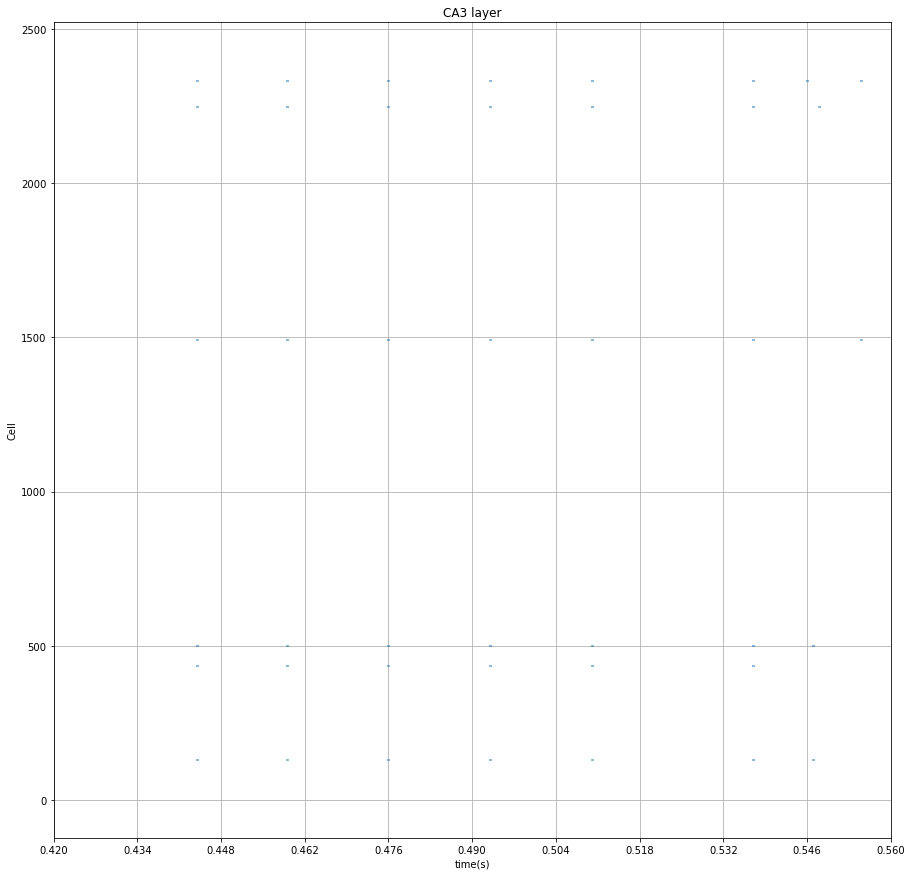

0 :  [1921, 2051, 1930, 402, 1080, 1094, 344, 237, 885]
1 :  [1857, 837, 1542, 1362, 1371, 1770, 557, 1772, 2355, 828, 1150]
2 :  [1038, 532, 1954, 2096, 61, 2114, 1634, 614, 876, 1391]
3 :  [257, 131, 645, 140, 2332, 436, 571, 827, 2249, 1494, 501]
4 :  [11, 144, 2319, 2256, 23, 1624, 1880, 1440, 620]
5 :  [658, 151, 1053, 299, 561, 948, 323, 1988, 1870, 609, 1637]


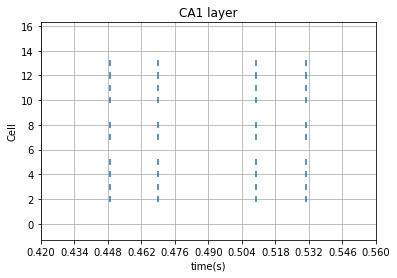

Ret1 :  {257, 827, 131, 645, 2249, 140, 436, 501, 1494, 571, 2332}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------


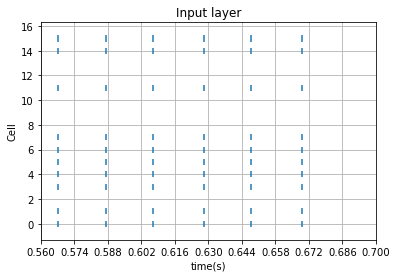

0 :  [ 2  3  4  6  7  8 10 11 13 14 15]
1 :  [ 2  3  4  7  9 10 14]
2 :  [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15]
3 :  [ 2  3  4  5  7  8 10 11 12 13]
4 :  [ 0  1  3  4  5  6  7 11 14 15]
5 :  [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14]


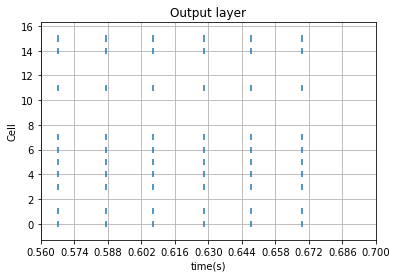

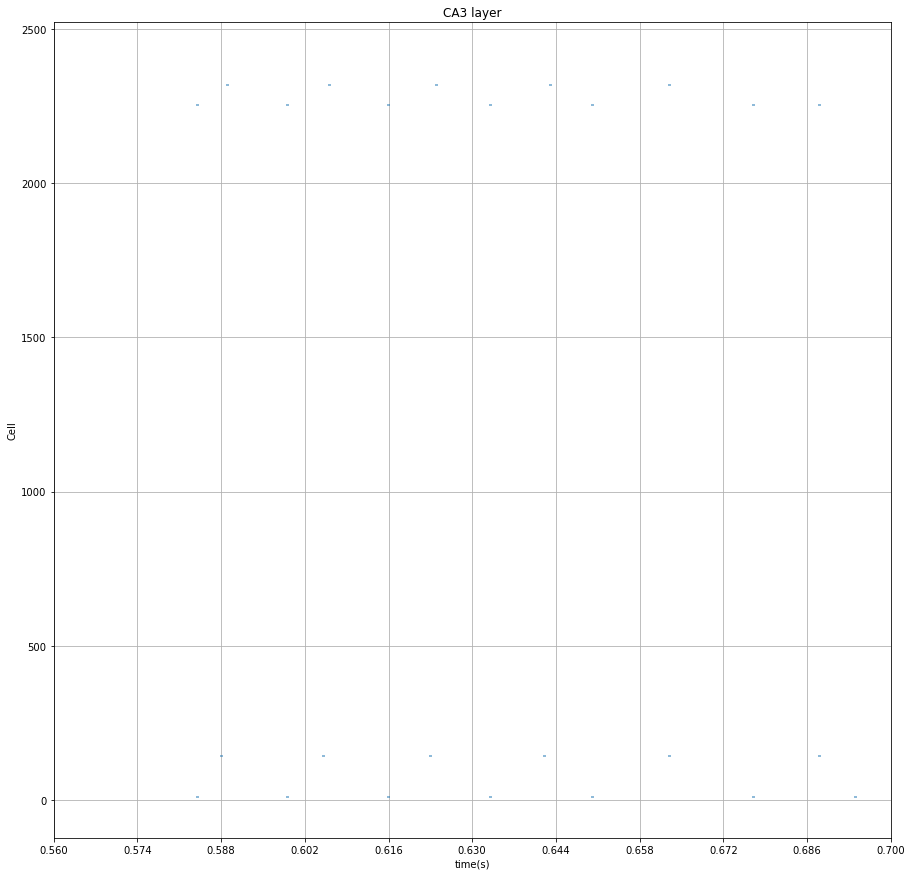

0 :  [1921, 2051, 1930, 402, 1080, 1094, 344, 237, 885]
1 :  [1857, 837, 1542, 1362, 1371, 1770, 557, 1772, 2355, 828, 1150]
2 :  [1038, 532, 1954, 2096, 61, 2114, 1634, 614, 876, 1391]
3 :  [257, 131, 645, 140, 2332, 436, 571, 827, 2249, 1494, 501]
4 :  [11, 144, 2319, 2256, 23, 1624, 1880, 1440, 620]
5 :  [658, 151, 1053, 299, 561, 948, 323, 1988, 1870, 609, 1637]


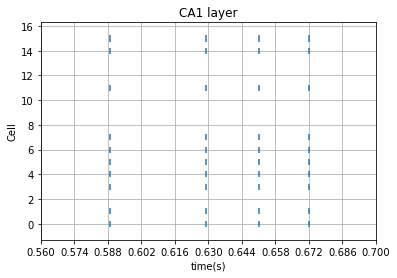

Ret1 :  {1440, 11, 620, 2319, 144, 2256, 1880, 23, 1624}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------


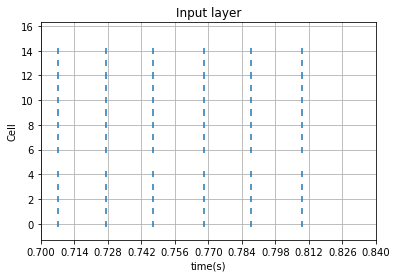

0 :  [ 2  3  4  6  7  8 10 11 13 14 15]
1 :  [ 2  3  4  7  9 10 14]
2 :  [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15]
3 :  [ 2  3  4  5  7  8 10 11 12 13]
4 :  [ 0  1  3  4  5  6  7 11 14 15]
5 :  [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14]


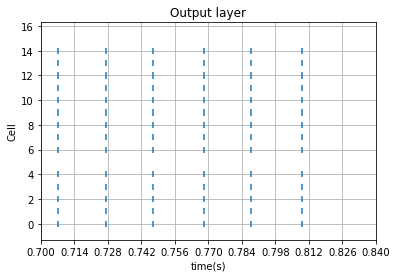

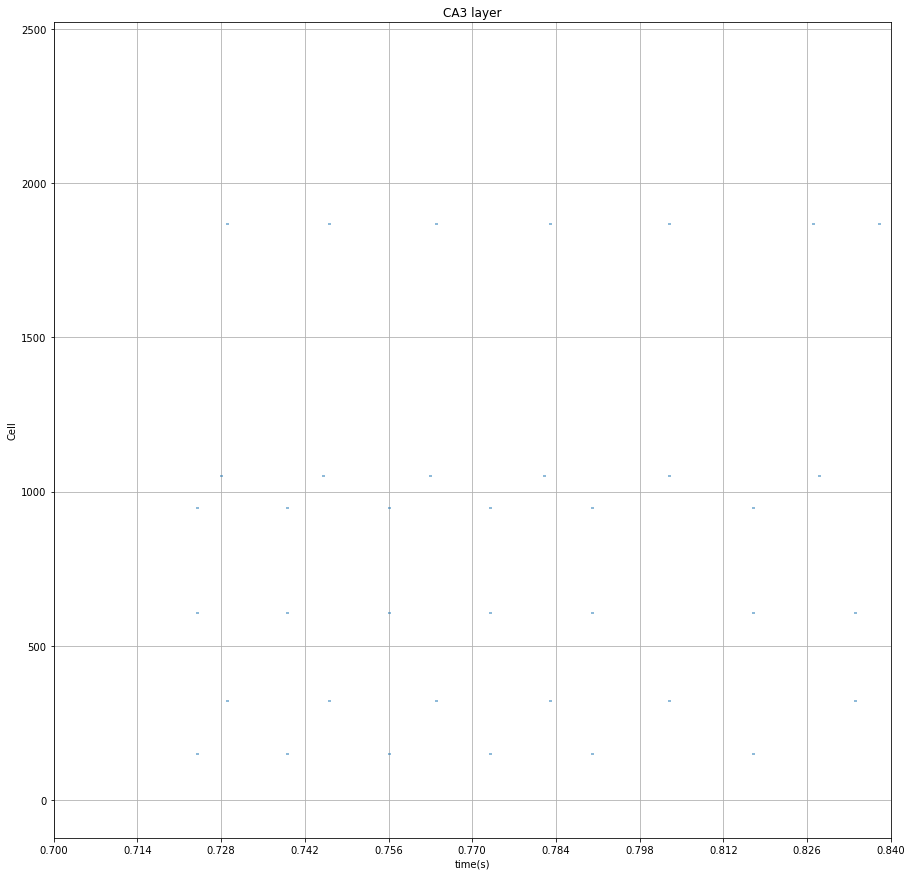

0 :  [1921, 2051, 1930, 402, 1080, 1094, 344, 237, 885]
1 :  [1857, 837, 1542, 1362, 1371, 1770, 557, 1772, 2355, 828, 1150]
2 :  [1038, 532, 1954, 2096, 61, 2114, 1634, 614, 876, 1391]
3 :  [257, 131, 645, 140, 2332, 436, 571, 827, 2249, 1494, 501]
4 :  [11, 144, 2319, 2256, 23, 1624, 1880, 1440, 620]
5 :  [658, 151, 1053, 299, 561, 948, 323, 1988, 1870, 609, 1637]


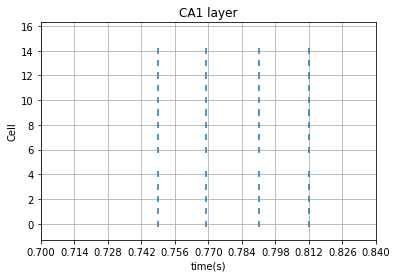

Ret1 :  {609, 323, 1988, 1637, 299, 1870, 561, 658, 785, 948, 151, 1053}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
Success :  0
Fail :  6
If_fail :  0
Output bias (mean, std) :  0.0 0.0


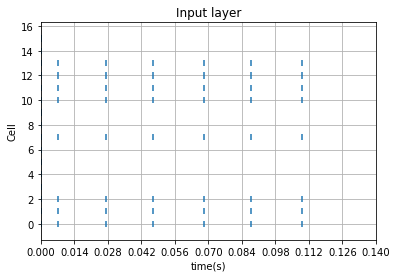

0 :  [ 0  1  2  7 10 11 12 13]
1 :  [ 0  1  3  5 10 12 13 15]
2 :  [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15]
3 :  [ 0  1  2  4  6  7  8  9 10 11 12 13 14]
4 :  [ 0  3  7  8  9 10 12 13]
5 :  [ 2  3  7  8  9 10 12 13 14]


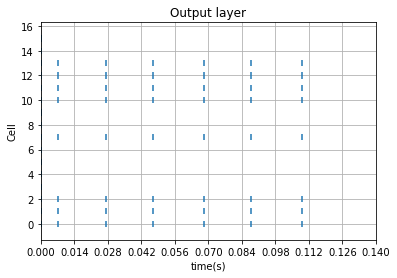

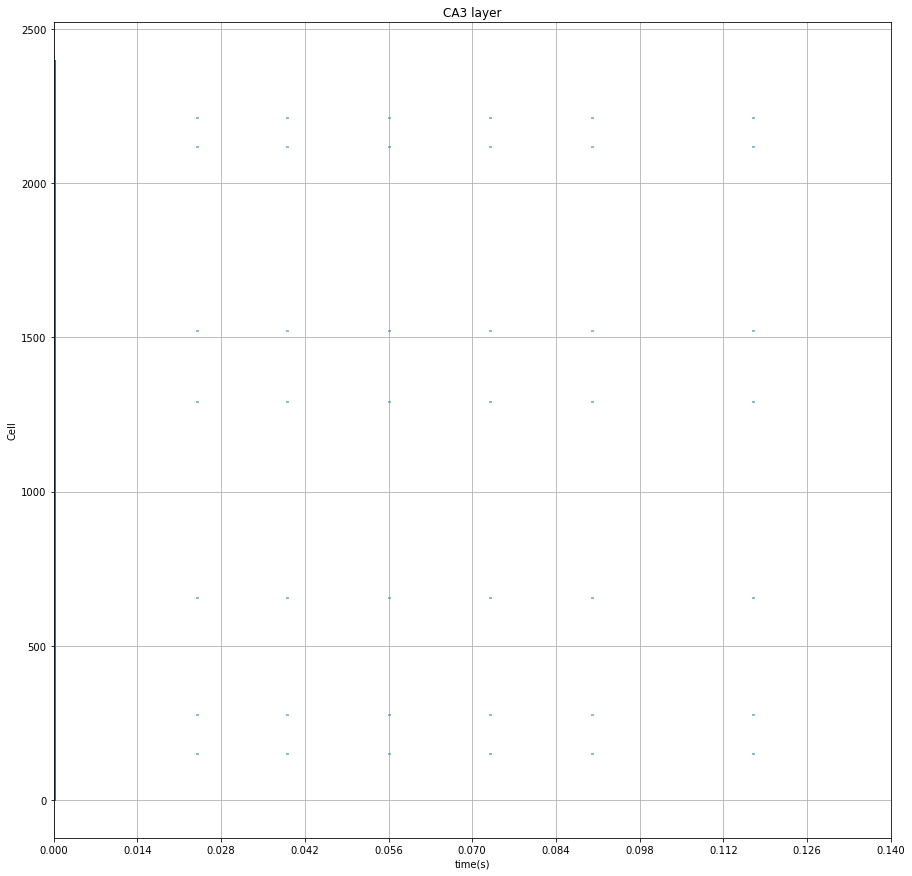

0 :  [2119, 1292, 656, 278, 151, 214, 2331, 2212, 1522, 1650]
1 :  [2308, 131, 406, 1458, 1212, 2249, 1494, 1370, 1755, 2265, 1895, 2030]
2 :  [1038, 532, 1954, 2096, 61, 2114, 1634, 614, 876, 1391]
3 :  [323, 658, 1879, 609, 483, 1195, 172, 111, 1007, 561, 1139, 569]
4 :  [2336, 806, 49, 1864, 1995, 2380, 1613, 2133, 2391, 753, 757, 1653]
5 :  [1857, 837, 1542, 1362, 1371, 1770, 557, 1772, 2355, 828, 1150]


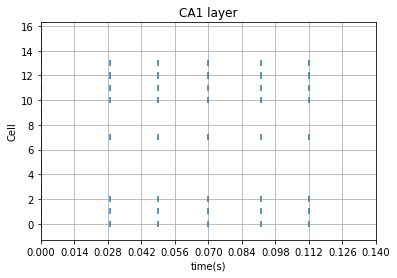

Ret1 :  {2212, 2119, 1292, 656, 1522, 1650, 278, 214, 151, 2331}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 263 [278]
0 264 [1292]


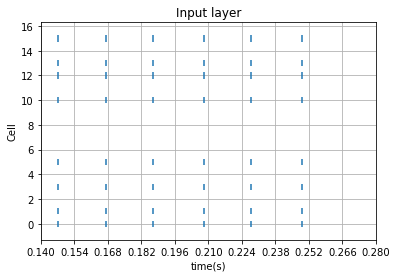

0 :  [ 0  1  2  7 10 11 12 13]
1 :  [ 0  1  3  5 10 12 13 15]
2 :  [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15]
3 :  [ 0  1  2  4  6  7  8  9 10 11 12 13 14]
4 :  [ 0  3  7  8  9 10 12 13]
5 :  [ 2  3  7  8  9 10 12 13 14]


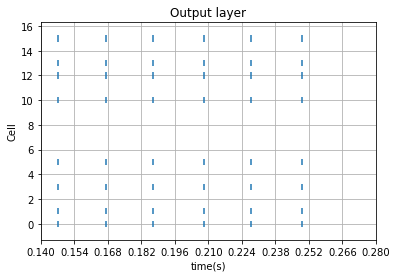

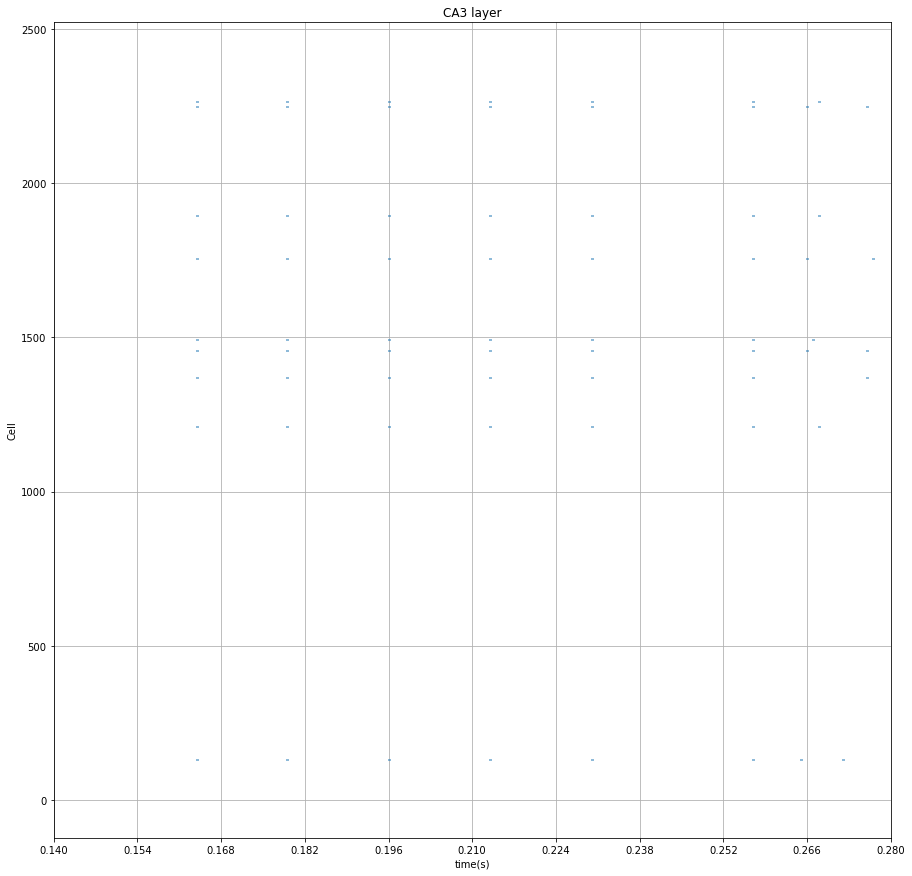

0 :  [2119, 1292, 656, 278, 151, 214, 2331, 2212, 1522, 1650]
1 :  [2308, 131, 406, 1458, 1212, 2249, 1494, 1370, 1755, 2265, 1895, 2030]
2 :  [1038, 532, 1954, 2096, 61, 2114, 1634, 614, 876, 1391]
3 :  [323, 658, 1879, 609, 483, 1195, 172, 111, 1007, 561, 1139, 569]
4 :  [2336, 806, 49, 1864, 1995, 2380, 1613, 2133, 2391, 753, 757, 1653]
5 :  [1857, 837, 1542, 1362, 1371, 1770, 557, 1772, 2355, 828, 1150]


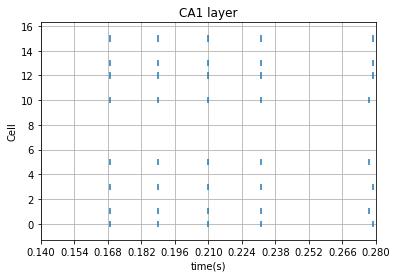

Ret1 :  {131, 2308, 1895, 2249, 2030, 1458, 406, 1494, 2265, 1370, 1755, 1212}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------


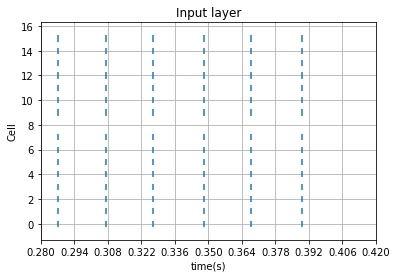

0 :  [ 0  1  2  7 10 11 12 13]
1 :  [ 0  1  3  5 10 12 13 15]
2 :  [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15]
3 :  [ 0  1  2  4  6  7  8  9 10 11 12 13 14]
4 :  [ 0  3  7  8  9 10 12 13]
5 :  [ 2  3  7  8  9 10 12 13 14]


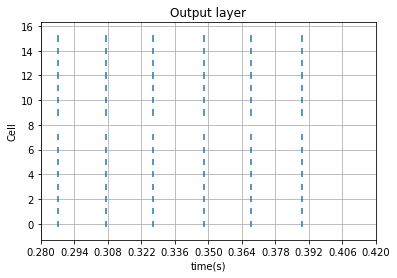

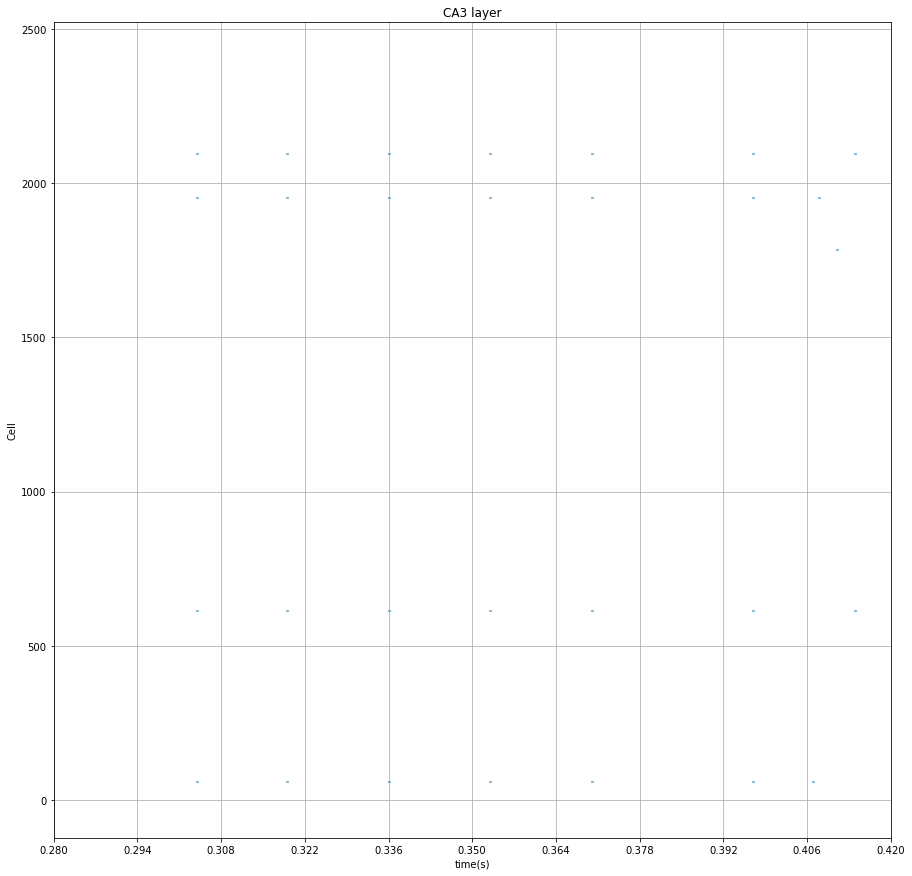

0 :  [2119, 1292, 656, 278, 151, 214, 2331, 2212, 1522, 1650]
1 :  [2308, 131, 406, 1458, 1212, 2249, 1494, 1370, 1755, 2265, 1895, 2030]
2 :  [1038, 532, 1954, 2096, 61, 2114, 1634, 614, 876, 1391]
3 :  [323, 658, 1879, 609, 483, 1195, 172, 111, 1007, 561, 1139, 569]
4 :  [2336, 806, 49, 1864, 1995, 2380, 1613, 2133, 2391, 753, 757, 1653]
5 :  [1857, 837, 1542, 1362, 1371, 1770, 557, 1772, 2355, 828, 1150]


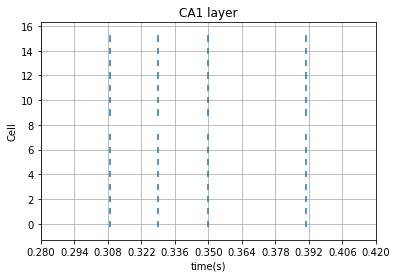

Ret1 :  {1634, 1954, 2114, 614, 876, 1038, 1391, 2096, 532, 1784, 61}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------


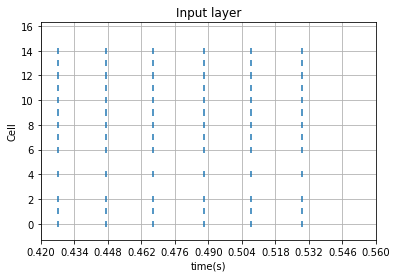

0 :  [ 0  1  2  7 10 11 12 13]
1 :  [ 0  1  3  5 10 12 13 15]
2 :  [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15]
3 :  [ 0  1  2  4  6  7  8  9 10 11 12 13 14]
4 :  [ 0  3  7  8  9 10 12 13]
5 :  [ 2  3  7  8  9 10 12 13 14]


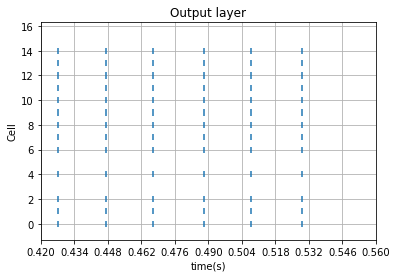

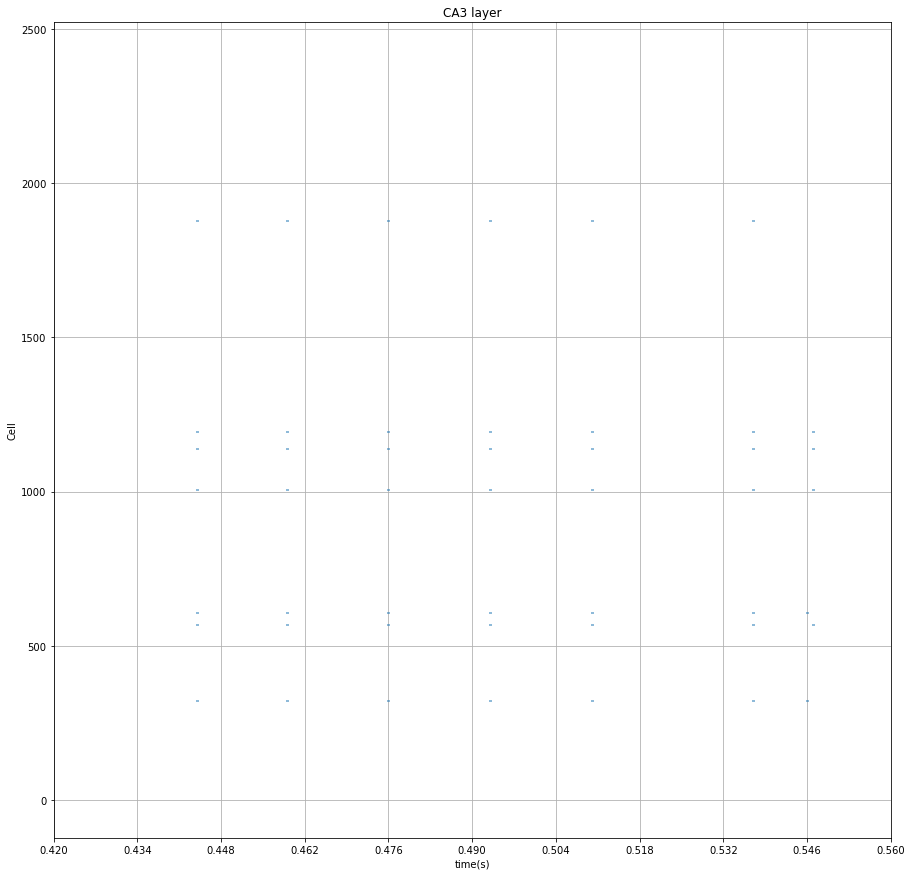

0 :  [2119, 1292, 656, 278, 151, 214, 2331, 2212, 1522, 1650]
1 :  [2308, 131, 406, 1458, 1212, 2249, 1494, 1370, 1755, 2265, 1895, 2030]
2 :  [1038, 532, 1954, 2096, 61, 2114, 1634, 614, 876, 1391]
3 :  [323, 658, 1879, 609, 483, 1195, 172, 111, 1007, 561, 1139, 569]
4 :  [2336, 806, 49, 1864, 1995, 2380, 1613, 2133, 2391, 753, 757, 1653]
5 :  [1857, 837, 1542, 1362, 1371, 1770, 557, 1772, 2355, 828, 1150]


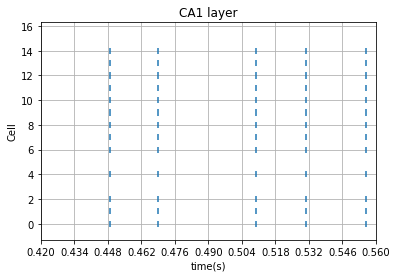

Ret1 :  {609, 323, 483, 1195, 172, 111, 1007, 561, 658, 1139, 1879, 569}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------


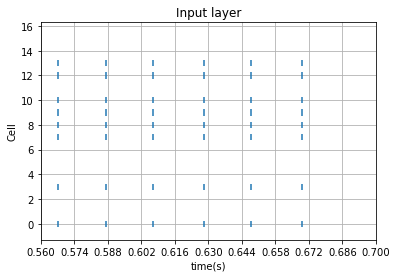

0 :  [ 0  1  2  7 10 11 12 13]
1 :  [ 0  1  3  5 10 12 13 15]
2 :  [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15]
3 :  [ 0  1  2  4  6  7  8  9 10 11 12 13 14]
4 :  [ 0  3  7  8  9 10 12 13]
5 :  [ 2  3  7  8  9 10 12 13 14]


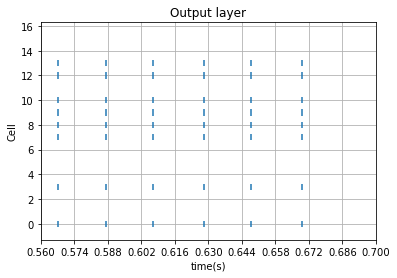

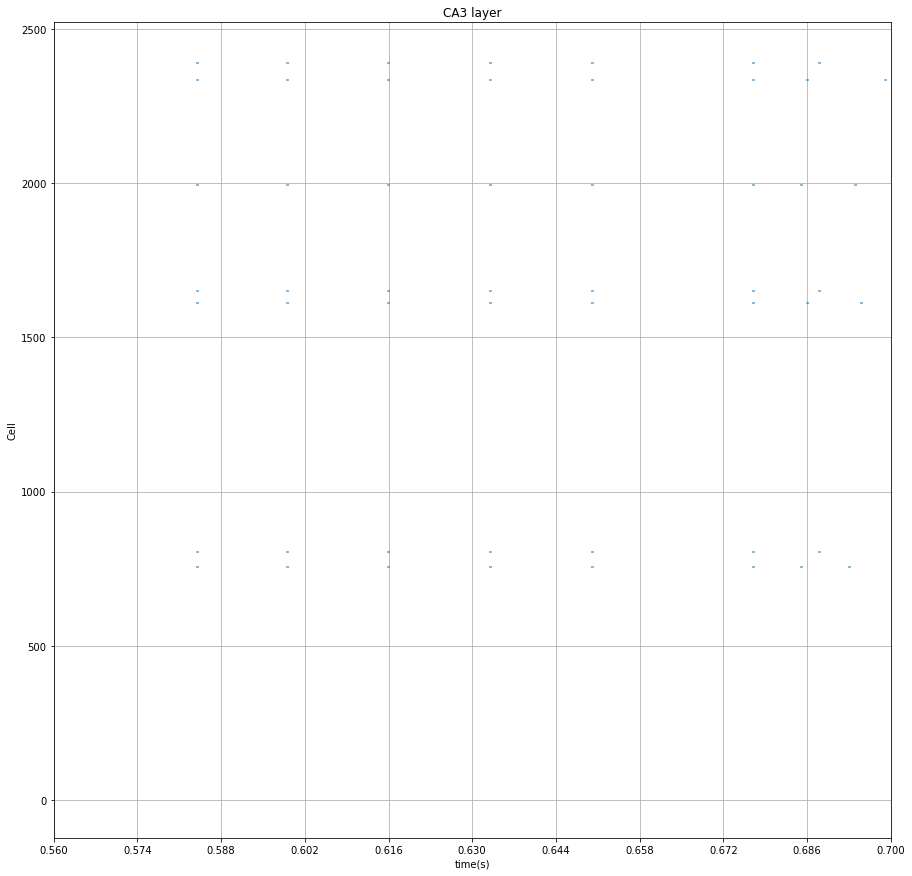

0 :  [2119, 1292, 656, 278, 151, 214, 2331, 2212, 1522, 1650]
1 :  [2308, 131, 406, 1458, 1212, 2249, 1494, 1370, 1755, 2265, 1895, 2030]
2 :  [1038, 532, 1954, 2096, 61, 2114, 1634, 614, 876, 1391]
3 :  [323, 658, 1879, 609, 483, 1195, 172, 111, 1007, 561, 1139, 569]
4 :  [2336, 806, 49, 1864, 1995, 2380, 1613, 2133, 2391, 753, 757, 1653]
5 :  [1857, 837, 1542, 1362, 1371, 1770, 557, 1772, 2355, 828, 1150]


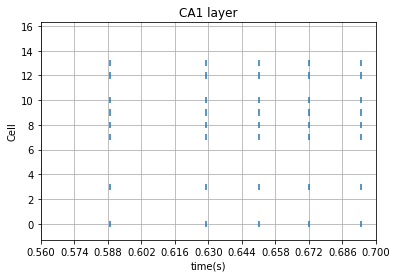

Ret1 :  {2336, 806, 1864, 1995, 2380, 1613, 49, 753, 757, 1653, 2133, 2391}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 836 [1522]


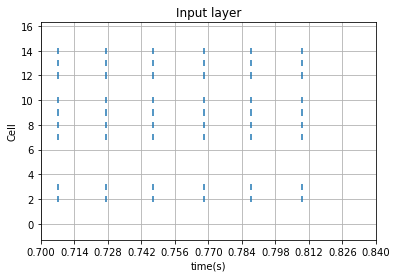

0 :  [ 0  1  2  7 10 11 12 13]
1 :  [ 0  1  3  5 10 12 13 15]
2 :  [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15]
3 :  [ 0  1  2  4  6  7  8  9 10 11 12 13 14]
4 :  [ 0  3  7  8  9 10 12 13]
5 :  [ 2  3  7  8  9 10 12 13 14]


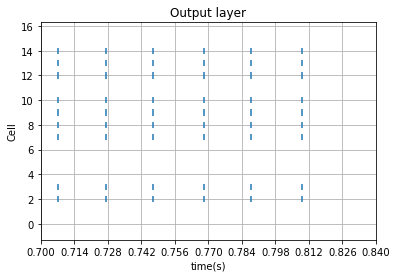

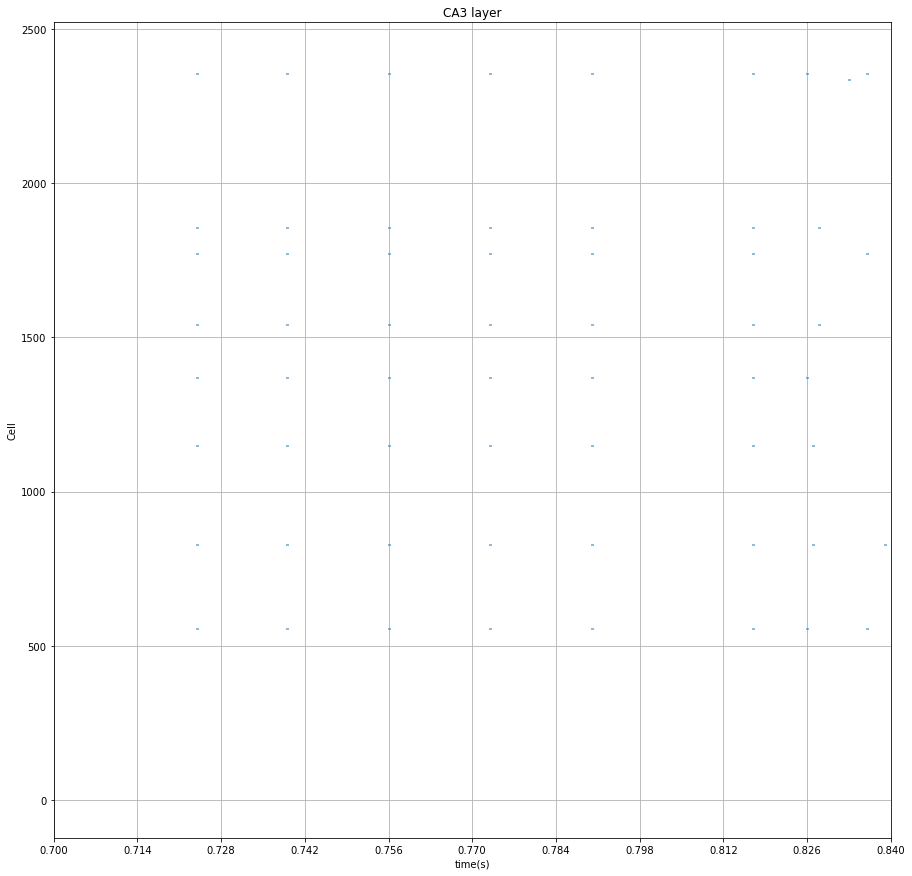

0 :  [2119, 1292, 656, 278, 151, 214, 2331, 2212, 1522, 1650]
1 :  [2308, 131, 406, 1458, 1212, 2249, 1494, 1370, 1755, 2265, 1895, 2030]
2 :  [1038, 532, 1954, 2096, 61, 2114, 1634, 614, 876, 1391]
3 :  [323, 658, 1879, 609, 483, 1195, 172, 111, 1007, 561, 1139, 569]
4 :  [2336, 806, 49, 1864, 1995, 2380, 1613, 2133, 2391, 753, 757, 1653]
5 :  [1857, 837, 1542, 1362, 1371, 1770, 557, 1772, 2355, 828, 1150]


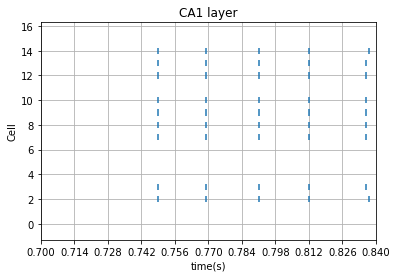

Ret1 :  {2336, 1857, 837, 1542, 1770, 1772, 557, 1362, 2355, 1371, 828, 1150}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
Success :  0
Fail :  6
If_fail :  0
Output bias (mean, std) :  0.0 0.0


In [13]:
# Learning
for Trial in range(25):
    Trial = Trial
    Tar = (Trial // 5) + 1
    Try = Trial % 5
    
    # initiation
    En_win = 120
    Re_win = 120
    
    Num_tar = len(Target_Data[Trial])
    Num_cue = 1
    Repeat = 1
    
    EtoI_learning = True
    already_learned = False
    learned_weights = [0,0,0,0]
    Direct_pp = True
    
    Target = Target_Data[Trial]
    Cue = np.zeros(params.N_I)

    network, Fail, If_fail, Success, Winfin, Voltage, FT, CA3_R_list, Out_R_list = Operate_model.run_model(
        En_win, Re_win, 
        Num_tar, Num_cue, Repeat, Target, Cue, 
        WTS, params, 
        already_learned, learned_weights, Direct_pp,
        Filt_idata, Filt_gdata, Af_py, Af_in)
    
    if not already_learned:
        with open('Learned weights-comp_v4%d-%d.pkl' % (Tar, Try), 'wb') as file:
            pickle.dump(network.q_ppCA3, file)
            pickle.dump(network.q_Rc, file)
            pickle.dump(network.q_CA33i, file)
            pickle.dump(network.q_Sc, file)

In [ ]:
# Retrieval
for Trial in range(5*5):
    Tar = (Trial // 5) + 1
    Try = Trial % 5
    
    # initiation
    En_win = 120
    Re_win = 120
    
    # 현 trial에서 cue의 개수
    Num_tar = len(Target_Data[Trial])
    Num_cue = 1
    Repeat = 100
    
    Phase_num = Num_cue*Repeat
    
    # target : 2x25 / P_Data : 16x25
    Target = Target_Data[Trial]
    Cue = Cue_Data[:,Trial]

    EtoI_learning = True
    already_learned = True
    Direct_pp = True
        
    if already_learned:
        with open(learned_path+'//Learned weights-comp_v2%d-%d.pkl' % (Tar, Try), 'rb') as file:
            q_ppCA3 = pickle.load(file)   
            q_Rc = pickle.load(file)
            q_CA33i = pickle.load(file)
            q_Sc = pickle.load(file)

        if not EtoI_learning:
            for n in range(params.N_CA3):
                for m in range(params.N_CA3i):
                    if q_CA33i[n,m] !=0:
                        q_CA33i[n,m] = 0.5
        learned_weights = [q_ppCA3, q_Rc, q_CA33i, q_Sc]
    else:
        learned_weights = [0,0,0,0]

    network, Fail, If_fail, Success, Winfin, CA3_R_list, CA1_R_list = Operate_model_v3.run_model(
        En_win, Re_win, 
        Num_tar, Num_cue, Repeat, Target, Cue, 
        WTS, params, 
        already_learned, learned_weights, Direct_pp,
        Filt_idata, Filt_gdata, Af_py, Af_in)
    
    with open('Results-compM_v2%d-%d.pkl' % (Tar, Try), 'wb') as file:
        pickle.dump(CA3_R_list, file)
        pickle.dump(CA1_R_list, file)